In [24]:
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
from numpy import linspace
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import seaborn as sb
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [25]:
# physical constants for natural units c = G = 1
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [26]:
def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    # for nice looking bins
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [14]:
'''Data for McConnell and Ma 2013 Mass BH - M Bulge'''

def MM13MassBulgeScatter(bulge):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.46+1.05*log10(bulge / 1e11)
    ans_w_scatter = np.random.normal(exponent, 0.34)
    return 10**ans_w_scatter


def MM13MassBulgeNoScatter(bulge):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.46+1.05*log10(bulge / 1e11)
    return 10**(exponent)

'creates data of predicted black hole masses given the mass of the bulge'
numsScatterMM13 = []
numsLoggedMM13 = []

for x in range(10000):
    numsScatterMM13.append(MM13MassBulgeScatter(3e11))
    numsLoggedMM13.append(log10(MM13MassBulgeScatter(3e11)))

In [15]:
'''Data for Kormendy and Ho 2013 Mass BH - M Bulge'''

#Only error in 0.49
def KH13MassBulgeScatterA(bulge):
    first_scatter = (np.random.normal(0.49, 0.06))
    ans = first_scatter * pow((bulge / 1e11), 1.16)
    return ans * 1e9

#only Error in exponent
def KH13MassBulgeScatterB(bulge):
    second_scatter = (np.random.normal(1.16, 0.08))
    ans = 0.49 * pow((bulge / 1e11), second_scatter)
    return ans * 1e9

#complete error
def KH13MassBulgeScatter(bulge):
    first_scatter = np.random.normal(0.49, 0.06)
    second_scatter = np.random.normal(1.16, 0.08)
    ans = (first_scatter * pow((bulge / 1e11), second_scatter))
    logM = log10(ans) 
    scatterM = np.random.normal(logM, 0.29) + 9
    return 10**scatterM

def KH13MassBulgeNoScatter(bulge):
    ans = 0.49 * pow((bulge / 1e11), 1.16) * 1e9
    return ans
    

'creates data of predicted black hole masses given the mass of the bulge'
numsScatterKH13 = []
numsScatterLogAKH13 = []
numsScatterLogBKH13 = []
numsLoggedKH13 = []

for x in range(10000):
    numsScatterKH13.append(KH13MassBulgeScatter(3e11))
    numsScatterLogAKH13.append(log10(KH13MassBulgeScatterA(3e11)))
    numsScatterLogBKH13.append(log10(KH13MassBulgeScatterB(3e11)))
    numsLoggedKH13.append(log10(KH13MassBulgeScatter(3e11)))

In [16]:
#test bulge mass data

for i in range(0,10):
    print("mm13 for 1e",(9+i), " = ", log10(MM13MassBulgeScatter(10**(9+i))))
    print("kh13 for 1e",(9+i), " = ", log10(KH13MassBulgeScatter(10**(9+i))))
    print("")


mm13 for 1e 9  =  5.634356312600079
kh13 for 1e 9  =  6.749752778007337

mm13 for 1e 10  =  7.201806610698446
kh13 for 1e 10  =  7.733039605304965

mm13 for 1e 11  =  8.547410306452038
kh13 for 1e 11  =  9.21050900051106

mm13 for 1e 12  =  9.759355489139919
kh13 for 1e 12  =  9.451606210926226

mm13 for 1e 13  =  10.204568091754393
kh13 for 1e 13  =  11.4235219873712

mm13 for 1e 14  =  11.789303286020562
kh13 for 1e 14  =  12.103529757730623

mm13 for 1e 15  =  12.113872694458435
kh13 for 1e 15  =  12.93424219679282

mm13 for 1e 16  =  13.514677324403545
kh13 for 1e 16  =  14.741638582986905

mm13 for 1e 17  =  14.385840684997843
kh13 for 1e 17  =  15.71248766251329

mm13 for 1e 18  =  15.67052269531726
kh13 for 1e 18  =  15.751345732737256



In [17]:
'''Data for Haring and Rix 2004 Mass BH - M Bulge'''
def HR04MassBulgeNoScatter(bulge):
    ans = 8.20+(1.12*log10(bulge/1e11))
    return 10**(ans)

#Error in 8.2
def HR04MassBulgeScatterA(bulge):
    first_scatter = (np.random.normal(8.20, 0.1))
    ans = first_scatter+(1.12*log10(bulge/1e11))
    return 10**(ans)

#Error 1.12
def HR04MassBulgeScatterB(bulge):
    second_scatter = (np.random.normal(1.12, 0.06))
    ans = 8.20+(second_scatter*log10(bulge/1e11))
    return 10**(ans)

#All Error
def HR04MassBulgeScatter(bulge):
    first_scatter = (np.random.normal(8.20, 0.1))
    second_scatter = (np.random.normal(1.12, 0.06))
    ans = np.random.normal((first_scatter+(second_scatter*log10(bulge/1e11))), 0.3)
    return 10**(ans)

'creates data of predicted black hole masses given the mass of the bulge'

numsScatterHR04 = []
numsScatterLogAHR04 = []
numsScatterLogBHR04 = []
numsLoggedHR04 = []

for x in range(10000):
    numsScatterHR04.append(HR04MassBulgeScatter(3e11))
    numsScatterLogAHR04.append(log10(HR04MassBulgeScatterA(3e11)))
    numsScatterLogBHR04.append(log10(HR04MassBulgeScatterB(3e11)))
    numsLoggedHR04.append(log10(HR04MassBulgeScatter(3e11)))

In [18]:
'''Data for McConnell and Ma 2013 Mass BH - Sigma'''

def MM13SigmaScatter(sigma):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.32+5.64*log10(sigma/200)
    ans_w_scatter = np.random.normal(exponent,0.38)
    return 10**ans_w_scatter

def MM13SigmaNoScatter(sigma):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    ans = 8.32+5.64*log10(sigma/200)
    return 10**ans


#arrays for data
numsSigScatterMM13 = []
numsSigLoggedMM13 = []

for x in range(10000):
    numsSigScatterMM13.append(MM13SigmaScatter(300))
    numsSigLoggedMM13.append(log10(MM13SigmaScatter(300)))



In [19]:
'''Data for Kormendy and Ho 2013 Mass BH - Sigma'''

#Only error in 0.49
def KH13SigmaScatterA(sigma):
    first_scatter = (np.random.normal(0.309, 0.037)) #non symmetric
    ans = first_scatter * pow((sigma / 200), 4.38)
    return ans * 1e9

#only Error in exponent
def KH13SigmaScatterB(sigma):
    second_scatter = (np.random.normal(4.38, 0.29))
    ans = 0.542 * pow((sigma / 200), second_scatter)
    return ans * 1e9

#complete error
def KH13SigmaScatter(sigma):
    first_scatter = (np.random.normal(0.309, 0.037))
    second_scatter = (np.random.normal(4.38, 0.29))
    
    ans = (first_scatter * pow((sigma / 200), second_scatter))
    logM = log10(ans)
    scatterM = np.random.normal(logM, 0.29) + 9
    return 10**scatterM
           

def KH13SigmaNoScatter(sigma):
    ans = 0.309 * pow((sigma / 200), 4.38) * 1e9
    return ans


numsSigScatterKH13 = []
numsSigLoggedKH13 = []

for x in range(10000):
    numsSigScatterKH13.append(KH13SigmaScatter(300))
    numsSigLoggedKH13.append(log10(KH13SigmaScatter(300)))


In [8]:
#find deviations 

Stellar = 6.6 * 10**9
Gas = 3.5 * 10**9

StellarDev = 0.4
GasDev = 0.9


#####M- Mbul
mBul = 10**11.72

mm13Stellar = (abs(Stellar - MM13MassBulgeNoScatter(mBul))) / (StellarDev * 10**9)
kh13Stellar = (abs(Stellar - KH13MassBulgeNoScatter(mBul))) / (StellarDev * 10**9)
hr04Stellar = (abs(Stellar - HR04MassBulgeNoScatter(mBul))) / (StellarDev * 10**9)

mm13Gas = (abs(Gas - MM13MassBulgeNoScatter(mBul))) / (GasDev * 10**9)
kh13Gas = (abs(Gas - KH13MassBulgeNoScatter(mBul))) / (GasDev * 10**9)
hr04Gas = (abs(Gas - HR04MassBulgeNoScatter(mBul))) / (GasDev * 10**9)


print("m- mbul")
print("mm13Stellar - ", mm13Stellar)
print("kh13Stellar - ", kh13Stellar)
print("hr13Stellar - ", hr04Stellar)
print("")
print("mm13Gas - ", mm13Gas)
print("kh13Gas - ", kh13Gas)
print("hr04Gas - ", hr04Gas)


###m - sigma
sig = 324

mm13SigStellar = (abs(Stellar - MM13SigmaNoScatter(324))) / (StellarDev * 10**9)
kh13SigStellar = (abs(Stellar - KH13SigmaNoScatter(324))) / (StellarDev * 10**9)

mm13SigGas = (abs(Gas - MM13SigmaNoScatter(324))) / (GasDev * 10**9)
kh13SigGas = (abs(Gas - KH13SigmaNoScatter(324))) / (GasDev * 10**9)

print("")
print("m- sig")
print("mm13SigStellar - ", mm13SigStellar)
print("kh13SigStellar - ", kh13SigStellar)
print("")
print("mm13SigGas - ", mm13SigGas)
print("kh13SigGas - ", kh13SigGas)





m- mbul
mm13Stellar -  12.389070691962662
kh13Stellar -  8.118223258617084
hr13Stellar -  13.962885842954767

mm13Gas -  2.0618091964278493
kh13Gas -  0.16365478160759236
hr04Gas -  2.7612825968687846

m- sig
mm13SigStellar -  8.563944603404295
kh13SigStellar -  10.108920030120608

mm13SigGas -  0.36175315706857575
kh13SigGas -  1.0484089022758256


In [21]:
'params'

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True}

# functions which will normalize the bins

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list


bin_list = auto_bin(0.1 ,7.5,10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


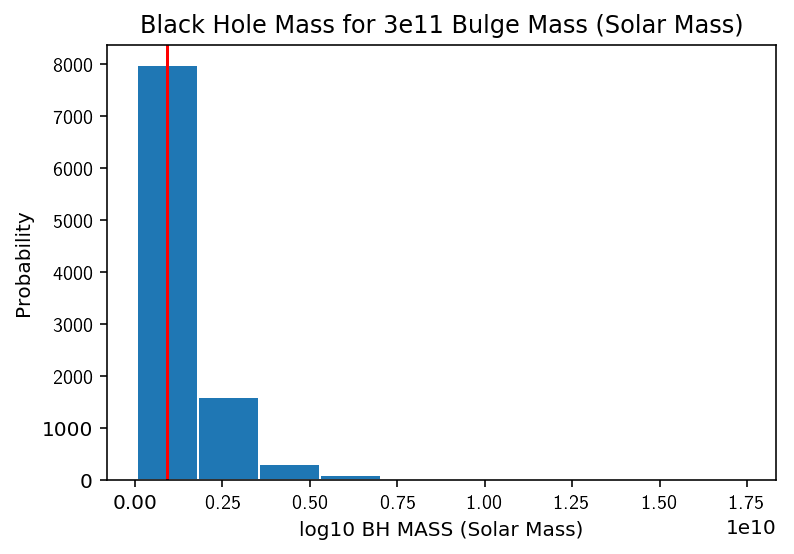

In [10]:
#MM13 full mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(numsScatterMM13, edgecolor = "w")
plt.axvline(x = MM13MassBulgeNoScatter(3e11), color = "red")

plt.rcParams.update(params)

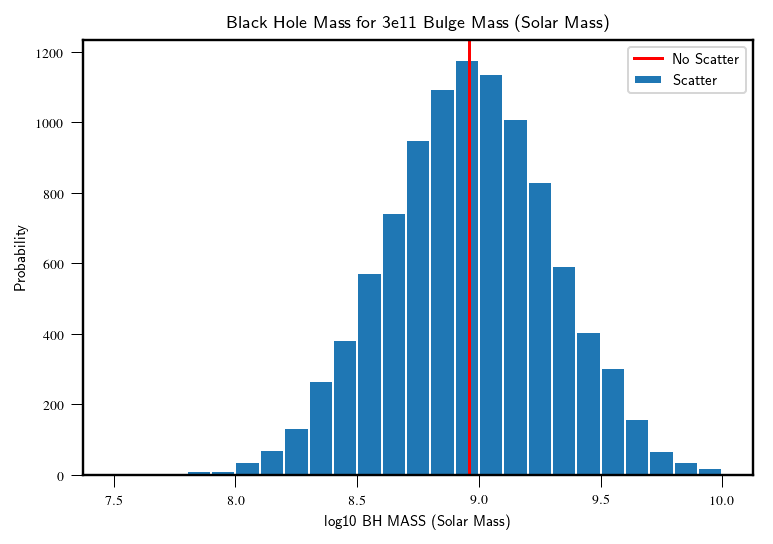

In [11]:
#MM13 logged mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)

plt.hist(numsLoggedMM13, edgecolor = "w", bins = bin_list)
plt.axvline(x = log10(MM13MassBulgeNoScatter(3e11)), color = "red")


plt.rcParams.update(params)

plt.legend(('No Scatter', 'Scatter'),loc='upper right')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


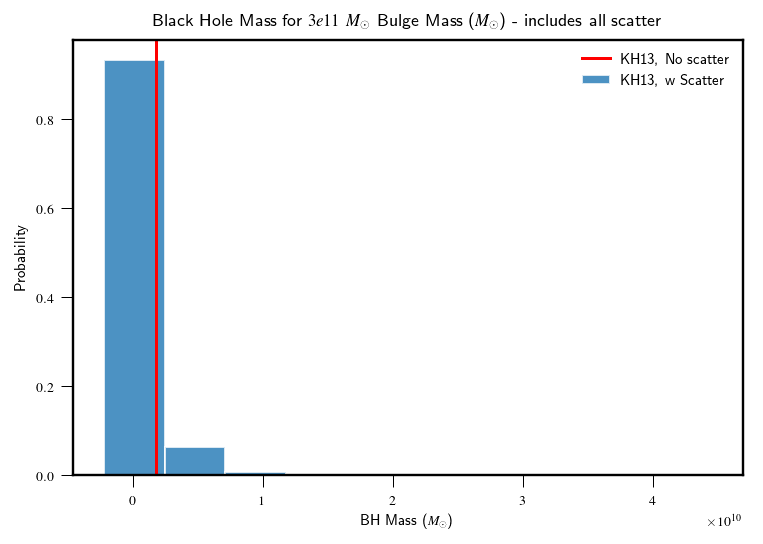

In [12]:
#KH13 full mass with scatter

fig = plt.figure()
ax = fig.add_subplot(111)

bin_list = auto_bin(0.1 ,7,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
weights = hist_weight(numsScatterKH13)

plt.hist(numsScatterKH13, weights=weights, alpha = 0.8, align='left', color = 'C0', label = "KH13, w Scatter", edgecolor = "w")
plt.axvline(KH13MassBulgeNoScatter(3e11), color='red', label = "KH13, No scatter")
plt.xlabel("BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
#plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


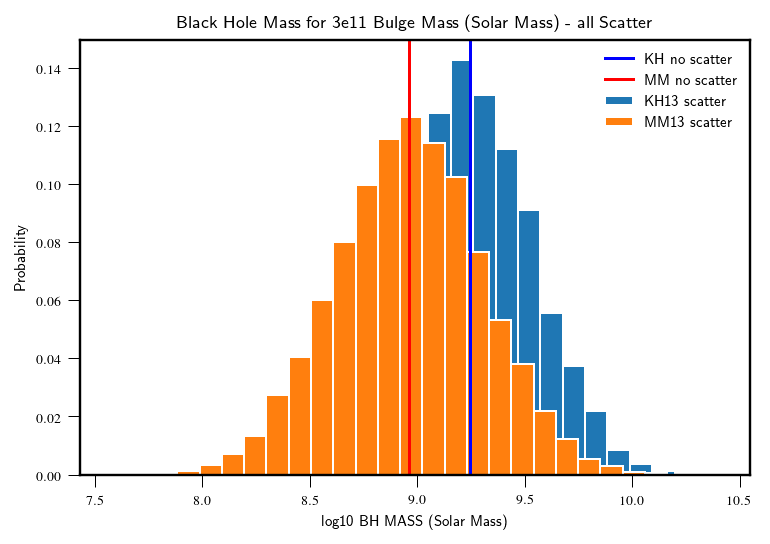

In [13]:
#KH13 and MM13 logged mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass) - all Scatter")

plt.grid(False)
weightsKH = hist_weight(numsLoggedKH13)
weightsMM = hist_weight(numsLoggedMM13)

plt.hist(numsLoggedKH13, bins = auto_bin(0.1, min(numsLoggedKH13), max(numsLoggedKH13)), edgecolor = "w", weights = weightsKH, label = "KH13 scatter")
plt.axvline(x = log10(KH13MassBulgeNoScatter(3e11)), color = "blue", label = "KH no scatter")

plt.hist(numsLoggedMM13, bins = auto_bin(0.1, min(numsLoggedMM13), max(numsLoggedMM13)), edgecolor = "w", weights = weightsMM, label = "MM13 scatter")
plt.axvline(x = log10(MM13MassBulgeNoScatter(3e11)), color = "red", label = "MM no scatter")

plt.legend(frameon=False)

#plt.rcParams.update(params)

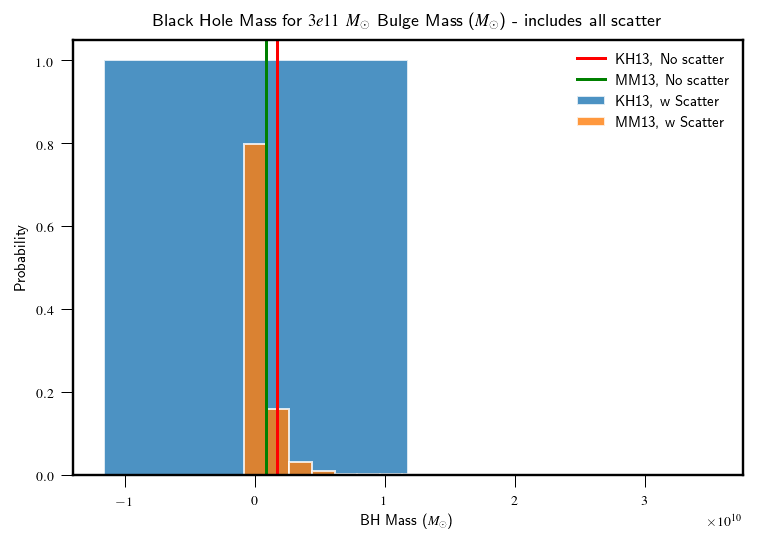

In [14]:
#MM13 and KH13 full mass with scatter

fig = plt.figure()
ax = fig.add_subplot(111)

#bin_list = auto_bin(0.1 ,7,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
weightsKH = hist_weight(numsScatterKH13)
weightsMM = hist_weight(numsScatterMM13)

plt.hist(numsScatterKH13, weights=weightsKH, bins = 2, alpha = 0.8, align='left', color = 'C0', label = "KH13, w Scatter", edgecolor = "w")
plt.hist(numsScatterMM13, weights=weightsMM, alpha = 0.8, align='left', color = 'C1', label = "MM13, w Scatter", edgecolor = "w")

plt.axvline(KH13MassBulgeNoScatter(3e11), color='red', label = "KH13, No scatter")
plt.axvline(MM13MassBulgeNoScatter(3e11), color='green', label = "MM13, No scatter")


plt.xlabel("BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
#plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


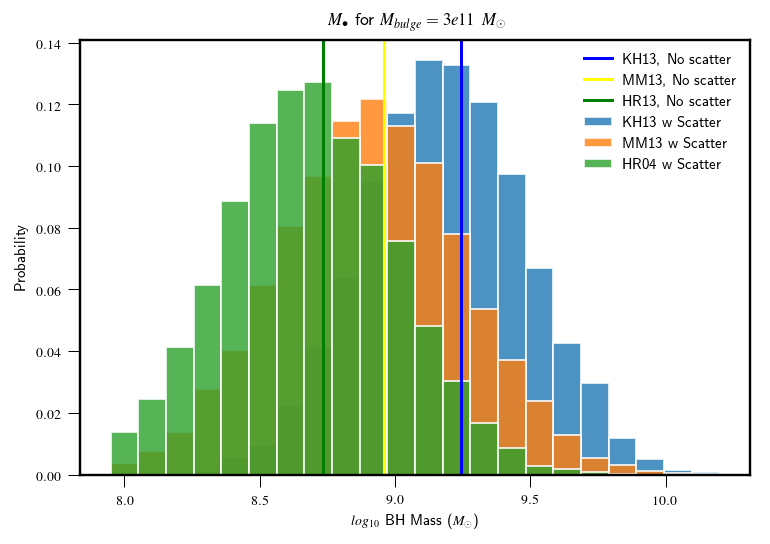

In [15]:
#KH13, MM13, HR04 logged mass with scatter
plt.grid(False)

#bin_list
bin_list = auto_bin(0.1 ,8.0,10.25) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

#weights
weightsKHL = hist_weight(numsLoggedKH13)
weightsMML = hist_weight(numsLoggedMM13)
weightsHRL = hist_weight(numsLoggedHR04)

#logged masses with scatter
plt.hist(numsLoggedKH13, bins = bin_list,  weights=weightsKHL, alpha = 0.8, align='left', color = 'C0', label = "KH13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedMM13,bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'C1', label = "MM13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedHR04,bins = bin_list, weights=weightsHRL, alpha = 0.8, align='left', color = 'C2', label = "HR04 w Scatter", edgecolor = "w")


#logged mass without scatter
plt.axvline(log10(KH13MassBulgeNoScatter(3e11)), color='blue', label = "KH13, No scatter")
plt.axvline(log10(MM13MassBulgeNoScatter(3e11)), color='yellow', label = "MM13, No scatter")
plt.axvline(log10(HR04MassBulgeNoScatter(3e11)), color='green', label = "HR13, No scatter")


#style
plt.xlabel("$log_{10}$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"$M_\bullet$ for $M_{bulge} = 3e11~M_\odot$")
plt.legend(frameon=False)

#saved file
#plt.savefig("loggedBulgeMass.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


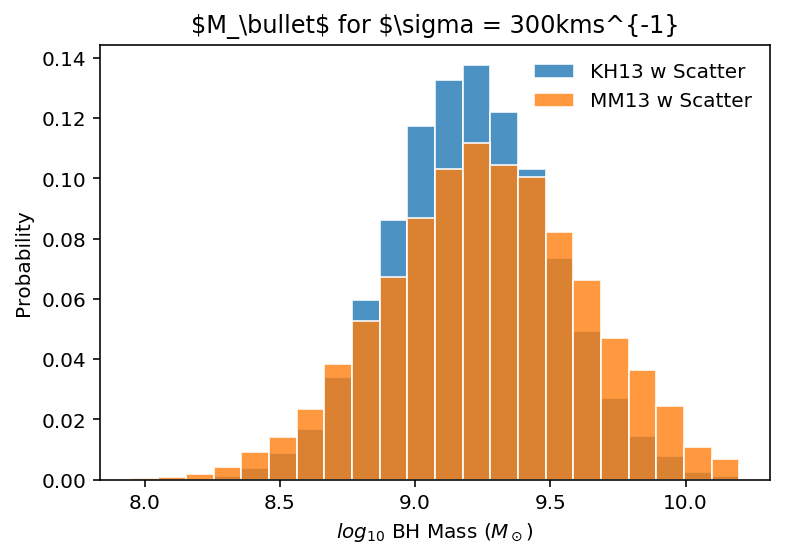

In [23]:
#KH13, MM13, HR04 logged mass with scatter
plt.grid(False)

#bin_list
bin_list = auto_bin(0.1 ,8.0,10.25) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

#weights
weightsKHL = hist_weight(numsSigLoggedKH13)
weightsMML = hist_weight(numsSigLoggedMM13)


#logged masses with scatter
plt.hist(numsSigLoggedKH13, bins = bin_list,  weights=weightsKHL, alpha = 0.8, align='left', color = 'C0', label = "KH13 w Scatter", edgecolor = "w")
plt.hist(numsSigLoggedMM13,bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'C1', label = "MM13 w Scatter", edgecolor = "w")



#style
plt.xlabel("$log_{10}$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"$M_\bullet$ for $\sigma = 300kms^{-1}")
plt.legend(frameon=False)

#saved file
#plt.savefig("loggedBulgeMass.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


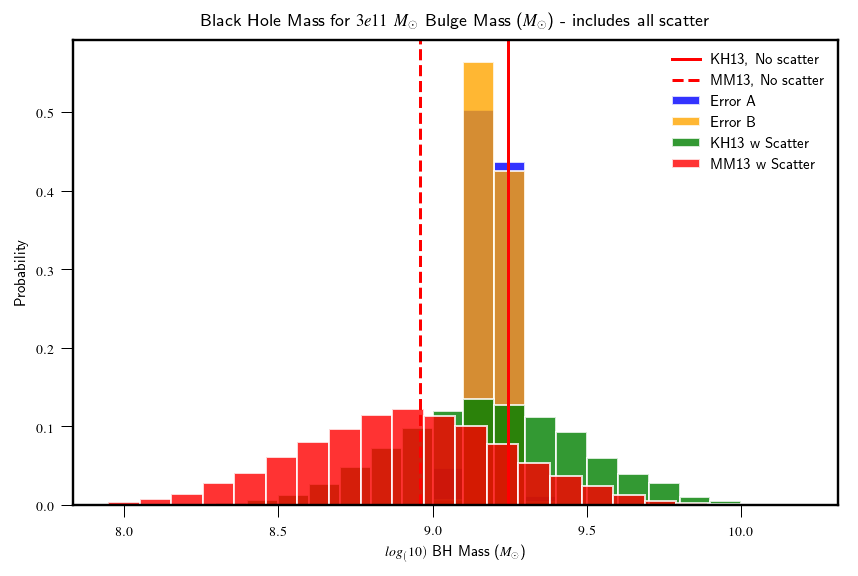

In [16]:
# all graphs together 

#constant
plt.grid(False)

bin_listKH = auto_bin(0.1 ,8.25, 10.25) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
bin_list = auto_bin(0.1 ,8.0, 10.25)

weightsKHL = hist_weight(numsLoggedKH13)
weightsMML = hist_weight(numsLoggedMM13)
weightsKHA = hist_weight(numsScatterLogAKH13)
weightsKHB = hist_weight(numsScatterLogBKH13)

#no scatter plot -- good
plt.axvline(log10(KH13MassBulgeNoScatter(3e11)), color='red', label = "KH13, No scatter")
plt.axvline(log10(MM13MassBulgeNoScatter(3e11)), color='red', label = "MM13, No scatter", ls = "--")

#Errors A and B
plt.hist(numsScatterLogAKH13,bins = bin_listKH, weights=weightsKHA, alpha = 0.8, align='left', color = 'blue', label = "Error A", edgecolor = "w")
plt.hist(numsScatterLogBKH13,bins = bin_listKH, weights=weightsKHB, alpha = 0.8, align='left', color = 'orange', label = "Error B", edgecolor = "w")


#Scatter with Errors
plt.hist(numsLoggedKH13, bins = bin_listKH,  weights=weightsKHL, alpha = 0.8, align='left', color = 'green', label = "KH13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedMM13, bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'red', label = "MM13 w Scatter", edgecolor = "w")

#style
plt.xlabel("$log_(10)$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
plt.tight_layout()

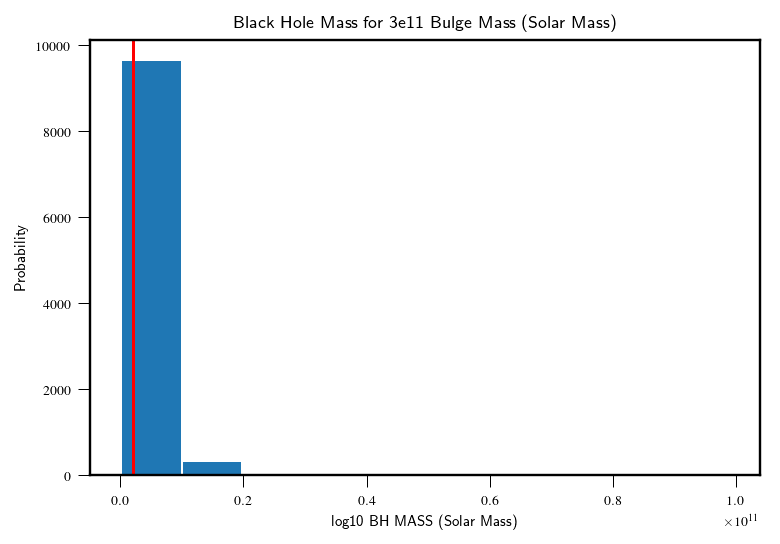

In [17]:
#MM13 full mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(numsSigScatterMM13, edgecolor = "w")
plt.axvline(x = MM13SigmaNoScatter(300), color = "red")

plt.rcParams.update(params)

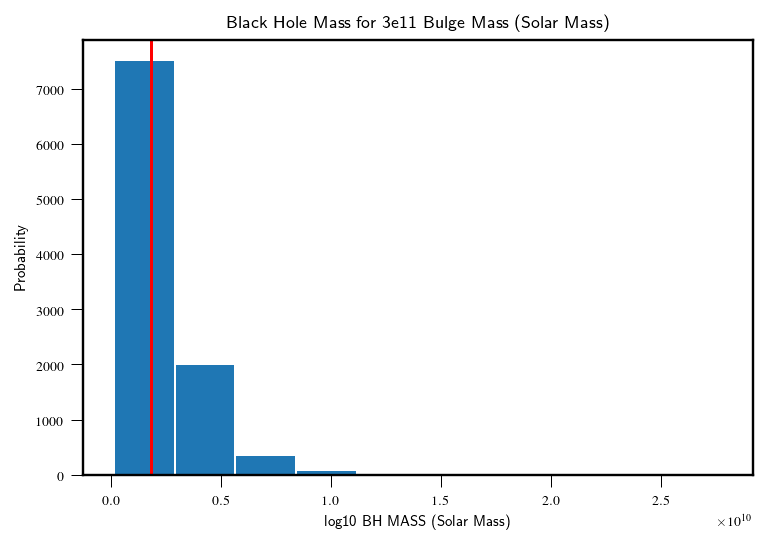

In [18]:
#HK13 full mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(numsSigScatterKH13, edgecolor = "w")
plt.axvline(x = KH13SigmaNoScatter(300), color = "red")

plt.rcParams.update(params)

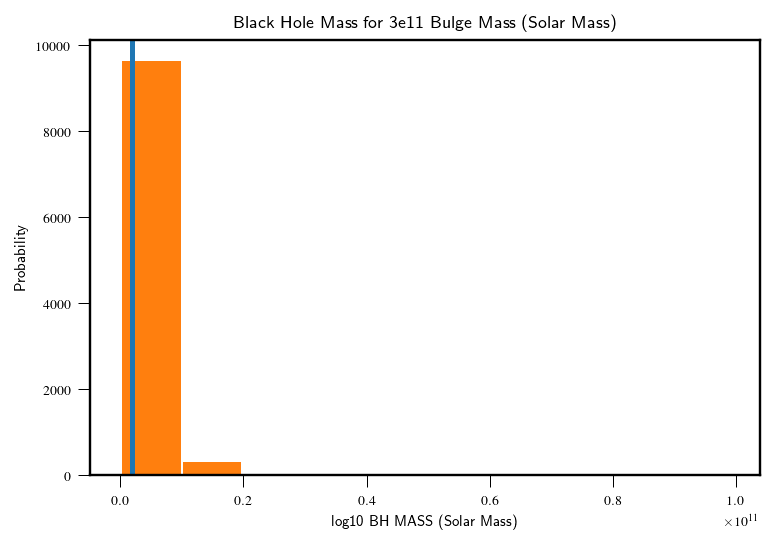

In [19]:
#HK13 and MM13 full mass with scatter
plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'

plt.hist(numsSigScatterKH13, edgecolor = "w", label = "KH w scatter")
plt.hist(numsSigScatterMM13, edgecolor = "w", label = "MM w scatter")

plt.axvline(x = KH13SigmaNoScatter(300), label = "KH no scatter")
plt.axvline(x = MM13SigmaNoScatter(300), label = "MM no scatter")

plt.rcParams.update(params)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


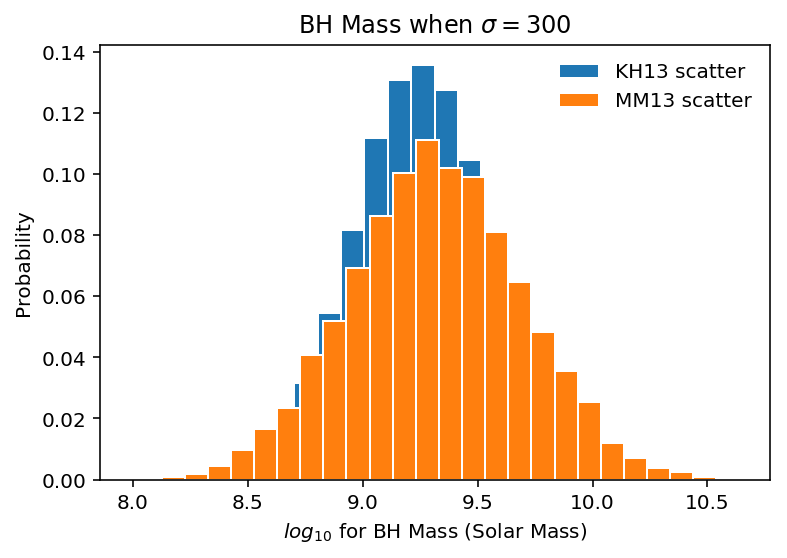

In [29]:
#KH13 and MM13 logged mass with scatter sigma 

plt.xlabel("$log_{10}$ for BH Mass (Solar Mass)")
plt.ylabel("Probability")
plt.title("BH Mass when $\sigma = 300$")

plt.grid(False)
weightsKH = hist_weight(numsSigLoggedKH13)
weightsMM = hist_weight(numsSigLoggedMM13)

plt.hist(numsSigLoggedKH13, bins = auto_bin(0.1, min(numsSigLoggedKH13), max(numsSigLoggedKH13)), edgecolor = "w", weights = weightsKH, label = "KH13 scatter")
#plt.axvline(x = log10(KH13SigmaNoScatter(300)), color = "blue", label = "KH no scatter")

plt.hist(numsSigLoggedMM13, bins = auto_bin(0.1, min(numsSigLoggedMM13), max(numsSigLoggedMM13)), edgecolor = "w", weights = weightsMM, label = "MM13 scatter")
#plt.axvline(x = log10(MM13SigmaNoScatter(300)), color = "red", label = "MM no scatter")

plt.legend(frameon=False)

#plt.rcParams.update(params)
plt.savefig("loggedSigma_compare.pdf")

In [27]:
# """
"""calculationg for M87
- bulge mass
"""

MM13M87Mass = []
KH13M87Mass = []
HR04M87Mass = []

for i in range(10000):
    expScatter = (np.random.normal(11.72, 0.09))
    MM13M87Mass.append(log10(MM13MassBulgeScatter(10**(expScatter))))
    KH13M87Mass.append(log10(KH13MassBulgeScatter(10**(expScatter))))
    HR04M87Mass.append(log10(HR04MassBulgeScatter(10**(expScatter))))


In [28]:

StellarM87Mass = []
GasM87Mass = []

for i in range(10000):
    StellarM87Mass.append(log10((np.random.normal(6.6, 0.4)) * 10**9))
    GasM87Mass.append(log10((np.random.normal(3.5, 0.9)) * 10**9))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


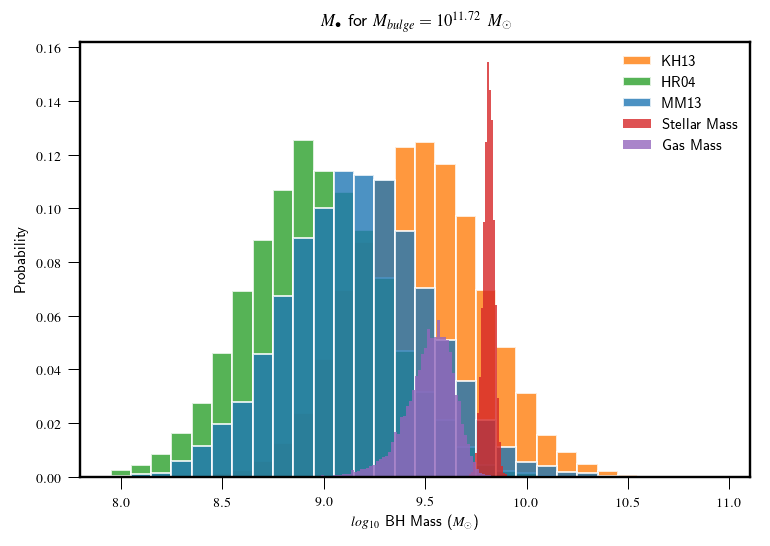

In [40]:
#KH13, MM13, HR04 logged mass with scatter for M87
plt.grid(False)

#bin_list
bin_list = auto_bin(0.1 ,8.0,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

#weights
weightsKHL = hist_weight(MM13M87Mass)
weightsMML = hist_weight(KH13M87Mass)
weightsHRL = hist_weight(HR04M87Mass)

weightStellar = hist_weight(StellarM87Mass)
weightGas = hist_weight(GasM87Mass)

#logged masses with scatter

plt.hist(KH13M87Mass,bins = bin_list, weights=weightsKHL, alpha = 0.8, align='left', color = 'C1', label = "KH13", edgecolor = "w")
plt.hist(HR04M87Mass,bins = bin_list, weights=weightsHRL, alpha = 0.8, align='left', color = 'C2', label = "HR04", edgecolor = "w")
plt.hist(MM13M87Mass,bins = bin_list,  weights=weightsMML, alpha = 0.8, align='left', color = 'C0', label = "MM13", edgecolor = "w")

bin_listStellar = auto_bin(.01, 8, 10)
bin_listGas = auto_bin(.015, 8, 10)

plt.hist(StellarM87Mass,bins = bin_listStellar, weights=weightStellar, alpha = 0.8, align='left', color = 'C3', label = "Stellar Mass")
plt.hist(GasM87Mass,bins = bin_listGas, weights=weightGas, alpha = 0.8, align='left', color = 'C4', label = "Gas Mass")

#style
plt.xlabel("$log_{10}$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"$M_\bullet$ for $M_{bulge} = 10^{11.72}~M_\odot$")
plt.legend(frameon=False)

#saved file
plt.savefig("M87MassTest.pdf")

In [32]:
"""
calculationg for M87
- Sigma
"""

MM13M87Sigma = []
KH13M87Sigma = []


for i in range(10000):
    sig_scatter = np.random.normal(324, 28)
    MM13M87Sigma.append(log10(MM13SigmaScatter(sig_scatter)))
    KH13M87Sigma.append(log10(KH13SigmaScatter(sig_scatter)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


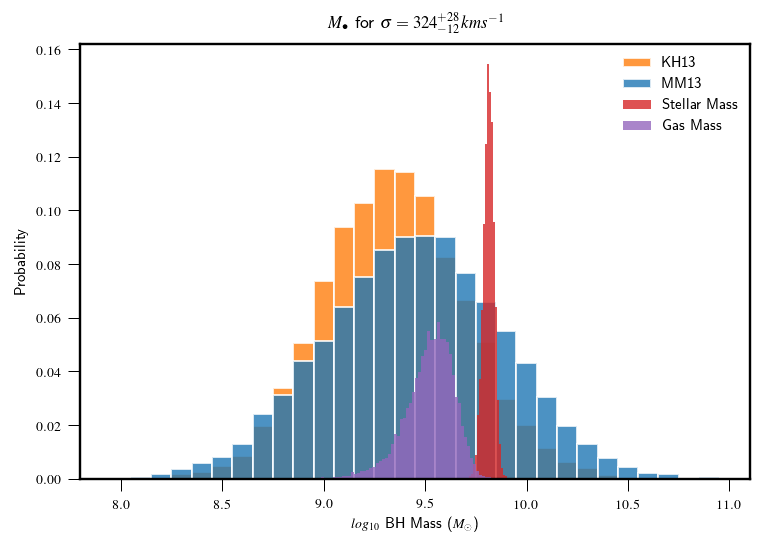

In [41]:
## KH13, MM13,logged mass with scatter for M87
plt.grid(False)

#bin_list
bin_list = auto_bin(0.1 ,8.0,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

#weights
weightsKHL = hist_weight(MM13M87Sigma)
weightsMML = hist_weight(KH13M87Sigma)

weightStellar = hist_weight(StellarM87Mass)
weightGas = hist_weight(GasM87Mass)

#logged masses with scatter
fitKH, binsKH, patches = plt.hist(KH13M87Sigma,bins = bin_list, weights=weightsKHL, alpha = 0.8, align='left', color = 'C1', label = "KH13", edgecolor = "w")
fitMM, binsMM, patches = plt.hist(MM13M87Sigma,bins = bin_list,  weights=weightsMML, alpha = 0.8, align='left', color = 'C0', label = "MM13", edgecolor = "w")

#out line bets fits
#xmin, xmax = plt.xlim()
#xKH = np.linspace(xmin, xmax, len(binsKH) - 1)
#xMM = np.linspace(xmin, xmax, len(binsMM) - 1)

#plt.plot(xKH, fitKH,  color = 'C1')
#plt.plot(xMM, fitMM,  color = 'C0')





#logged mass of dynamical methods
bin_listStellar = auto_bin(.01, 8, 10)
bin_listGas = auto_bin(.015, 8, 10)

plt.hist(StellarM87Mass,bins = bin_listStellar, weights=weightStellar, alpha = 0.8, align='left', color = 'C3', label = "Stellar Mass")
plt.hist(GasM87Mass,bins = bin_listGas, weights=weightGas, alpha = 0.8, align='left', color = 'C4', label = "Gas Mass")





#style
plt.xlabel("$log_{10}$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"$M_\bullet$ for $\sigma = 324^{+28}_{-12}kms^{-1}$")
plt.legend(frameon=False)

#saved file
plt.savefig("M87SigmaTest.pdf")

In [39]:
### comparing strain
pi = np.pi
sqrt = np.sqrt

def strain(mc, d, f):
    z = 2
    return sqrt(32/5) * (pow(mc, 5/3)/ d) * pow((pi*f*(1+z)),2/3)
    
smbh = strain(10**9, 500, 1e-9)
ligo = strain(10, 200, 100)

print("smbh = ", smbh)
print("ligo = ", ligo)

    

smbh =  22575327.929496773
ligo =  56.438319823741814


In [75]:
###chirp mass test
def mchirp_q(q,Mtot):
    """
    chirp mass in terms of q and M_tot. Answer in seconds.
    """
    ans = (q/(1+q)**2)**(3/5)*Mtot*s_mass
    return ans

mbul = 1e12

kh = KH13MassBulgeScatter(mbul)
mm = MM13MassBulgeScatter(mbul)
hr = HR04MassBulgeScatter(mbul)

qt = 0.5

print("kh chirp = ", mchirp_q(qt,kh))
print("mm chirp = ", mchirp_q(qt,mm))
print("hr chirp = ", mchirp_q(qt,hr))

'''kh has bigest chirp mass then mm then hr'''

kh chirp =  13259.268262531737
mm chirp =  4067.3842199161263
hr chirp =  3805.5019533125514


'kh has bigest chirp mass then mm then hr'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


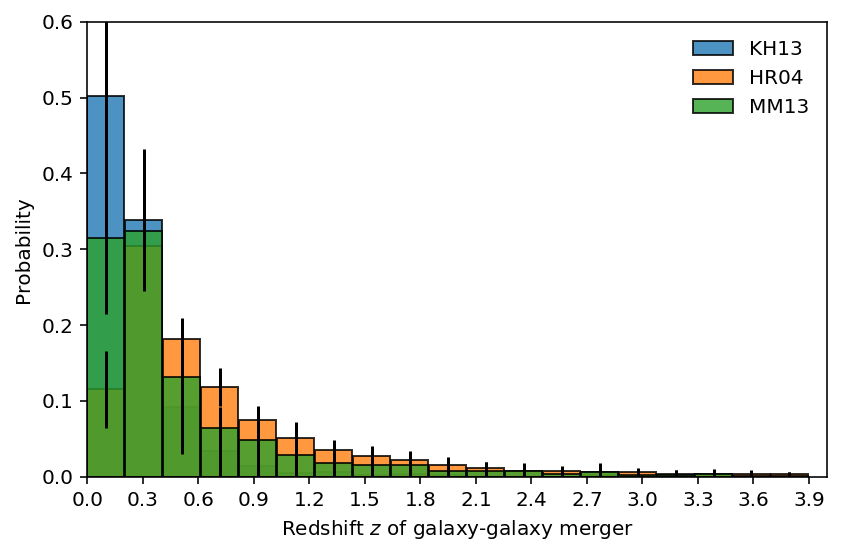

In [13]:
"""Plotting mbul-m redshift onto one graph"""

hist_bin = auto_bin(.2, .1, 4)
hist_bin = hist_bin[:-1]

hrmean = [0.11501099379591573, 0.3043787704032416, 0.18204965140100737, 0.11777886800878927, 0.07441253681656322, 0.05117702978766014, 0.03571330811897039, 0.026734053229996325, 0.021915270629441895, 0.015660719629521067, 0.011982282690481103, 0.007963353299809859, 0.007796282073707825, 0.006664881781709489, 0.006232134131969631, 0.003938158140590318, 0.0038564671964331555, 0.0039085853988778466, 0.002826653465313895]
khmean = [0.5020244798103032, 0.3382883170703563, 0.09189919020769664, 0.03351593385322585, 0.013501577784985492, 0.004249054249054243, 0.005701209901209896, 0.002397447380205999, 0.003027156921680243, 0.0017784724236337103, 0.0, 0.0, 0.0, 0.001516150296638099, 0.0011919191919191907, 0.0006060606060606055, 0.00030303030303030276, 0.0, 0.0]
mmmean = [0.3149550529066207, 0.324653871546865, 0.13079121174141534, 0.06368224837248429, 0.04801326535469485, 0.028130629889698337, 0.017579418311906913, 0.014756384061112581, 0.015726119240345705, 0.007393676259358697, 0.007496102102524289, 0.007418141825245317, 0.0035021143724881564, 0.005831504010828841, 0.002207256112814522, 0.0025967113070896586, 0.0028217614544858802, 0.0011193568336425464, 0.0013251742963783686]

hrtStd = [0.050505353922758865, 0.043104721370992145, 0.02682494296106962, 0.024958478832524635, 0.018746334290505002, 0.02071646655949728, 0.01308212056941212, 0.013620802551830378, 0.009753402574754955, 0.009705909878236519, 0.006945889431246038, 0.006083297774946031, 0.005997821172183457, 0.00573392137246623, 0.005447578730703995, 0.004708349447278754, 0.004358771437554181, 0.004382902245715766, 0.003684919230621235]
khtStd = [0.12142728012446943, 0.09405125559909716, 0.0618645084538409, 0.03803322338304922, 0.019552497752007406, 0.01178791033536143, 0.015027210545376403, 0.008583331518891554, 0.010395254241563215, 0.006358329589539689, 0.0, 0.0, 0.0, 0.007739587320137563, 0.00495341095993576, 0.0042424242424242385, 0.002121212121212119, 0.0, 0.0]
mmtStd = [0.10003263011044515, 0.07277750288626265, 0.06283883449144546, 0.028239934855672003, 0.03555922104434354, 0.022876028058675443, 0.016479774597673906, 0.01922542733479521, 0.01820679851833122, 0.011624576175628922, 0.011867053051112833, 0.010550364351127476, 0.008237096984283156, 0.01259098082159533, 0.006320405506144109, 0.006077648301223525, 0.007097788101049877, 0.0060545733735566125, 0.004321523487607549]


fig, ax = plt.subplots()

ax.bar(hist_bin, khmean, yerr=khtStd,edgecolor = 'black', width = 0.2, alpha = 0.8, label = "KH13")
ax.bar(hist_bin, hrmean, yerr=hrtStd,edgecolor = 'black', width = 0.2, alpha = 0.8, label = "HR04")
ax.bar(hist_bin, mmmean, yerr=mmtStd,edgecolor = 'black', width = 0.2, alpha = 0.8, label = "MM13")




plt.xlim(0,4)
plt.ylim(0,.6)

majorLocator = MultipleLocator(.3)
#minorLocator = MultipleLocator(5)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#ax.set_xticks(np.around(ind[0:19],1))
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_horizontalalignment('center')
#    tick.label.set_fontsize(6) 
plt.ylabel("Probability")
plt.xlabel("Redshift $z$ of galaxy-galaxy merger")
plt.tight_layout()
plt.legend(frameon=False)
plt.savefig("../plots/redshift_avg.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


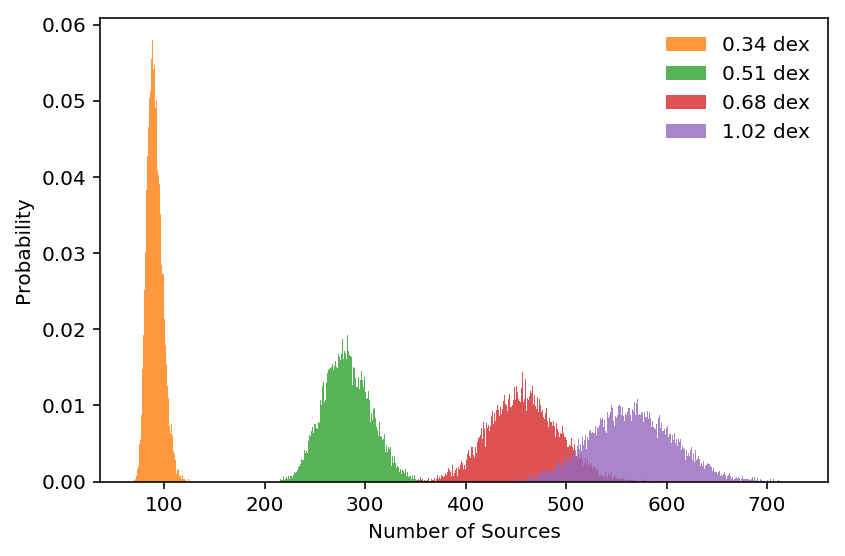

In [16]:
"""comparing all mm13 mbul scatters sources"""

bin_size = 1; min_edge =min(m34); max_edge =max(m102)
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

m34 = [111, 78, 99, 94, 82, 88, 88, 96, 92, 88, 89, 93, 87, 81, 95, 93, 96, 93, 90, 88, 94, 83, 92, 92, 81, 82, 99, 84, 106, 83, 87, 98, 94, 87, 94, 90, 83, 91, 92, 88, 90, 86, 97, 88, 95, 109, 104, 89, 90, 86, 88, 93, 81, 77, 101, 89, 102, 94, 83, 85, 91, 92, 82, 94, 89, 89, 90, 88, 91, 83, 107, 87, 76, 83, 84, 92, 101, 93, 87, 95, 86, 90, 91, 110, 105, 91, 91, 96, 86, 87, 96, 96, 101, 94, 104, 103, 95, 83, 89, 101, 94, 96, 93, 87, 92, 90, 85, 107, 88, 101, 85, 92, 93, 94, 95, 91, 89, 90, 99, 102, 83, 91, 101, 101, 77, 90, 104, 89, 102, 85, 101, 83, 89, 81, 98, 89, 107, 91, 84, 86, 88, 94, 104, 88, 94, 97, 90, 110, 90, 88, 81, 83, 121, 85, 97, 95, 97, 79, 94, 85, 89, 89, 86, 88, 81, 81, 91, 111, 84, 87, 86, 91, 92, 85, 87, 96, 82, 95, 90, 88, 96, 88, 83, 88, 130, 86, 86, 87, 83, 90, 78, 95, 93, 99, 89, 97, 79, 91, 95, 95, 86, 86, 92, 93, 83, 93, 86, 99, 87, 82, 84, 91, 98, 91, 89, 88, 91, 100, 81, 102, 89, 97, 81, 95, 82, 90, 92, 95, 82, 85, 92, 89, 107, 87, 87, 91, 81, 84, 91, 98, 90, 100, 87, 90, 106, 81, 104, 87, 96, 93, 89, 92, 90, 91, 98, 102, 89, 85, 90, 96, 87, 91, 87, 91, 85, 87, 86, 82, 82, 83, 89, 86, 88, 85, 90, 90, 86, 94, 84, 94, 89, 91, 92, 90, 90, 85, 90, 99, 102, 85, 91, 122, 102, 91, 84, 80, 97, 102, 95, 100, 95, 87, 85, 96, 90, 83, 93, 85, 99, 91, 89, 99, 94, 81, 99, 82, 94, 86, 87, 98, 102, 87, 90, 95, 84, 90, 87, 93, 83, 77, 93, 80, 93, 100, 83, 88, 103, 88, 85, 88, 93, 102, 91, 93, 97, 96, 95, 93, 89, 91, 91, 92, 94, 94, 85, 99, 92, 89, 86, 101, 89, 91, 95, 107, 93, 95, 76, 88, 89, 77, 96, 95, 86, 85, 104, 101, 90, 86, 95, 95, 90, 83, 92, 94, 89, 90, 88, 81, 90, 86, 98, 97, 96, 100, 84, 84, 75, 84, 85, 82, 77, 97, 87, 80, 95, 84, 83, 94, 92, 97, 92, 98, 92, 93, 88, 104, 95, 96, 83, 90, 90, 92, 87, 94, 86, 92, 91, 99, 84, 83, 82, 92, 89, 82, 93, 88, 83, 97, 85, 92, 87, 86, 88, 91, 82, 86, 110, 82, 87, 95, 86, 88, 101, 86, 96, 82, 96, 99, 84, 78, 101, 87, 93, 83, 100, 87, 91, 79, 96, 96, 88, 89, 83, 95, 83, 83, 87, 90, 84, 97, 84, 90, 89, 91, 78, 79, 97, 90, 81, 79, 93, 103, 79, 101, 83, 91, 114, 101, 99, 95, 91, 97, 92, 83, 101, 87, 86, 84, 100, 108, 77, 92, 85, 94, 92, 104, 79, 89, 90, 80, 98, 95, 84, 86, 98, 100, 83, 98, 92, 81, 85, 93, 89, 91, 92, 84, 107, 95, 89, 100, 88, 95, 92, 81, 93, 102, 92, 107, 88, 99, 88, 92, 99, 97, 100, 91, 95, 106, 91, 93, 112, 95, 94, 94, 88, 86, 93, 92, 97, 91, 95, 85, 82, 90, 91, 77, 86, 88, 81, 89, 89, 106, 101, 111, 113, 95, 79, 84, 95, 93, 90, 98, 98, 102, 95, 85, 98, 87, 90, 98, 99, 80, 93, 88, 86, 92, 80, 84, 79, 92, 107, 96, 96, 83, 85, 96, 102, 82, 93, 85, 87, 93, 86, 99, 89, 86, 93, 77, 90, 96, 102, 87, 86, 84, 89, 87, 85, 92, 93, 85, 91, 95, 85, 95, 108, 98, 88, 80, 86, 94, 92, 98, 90, 88, 83, 88, 89, 91, 85, 95, 87, 87, 97, 79, 98, 91, 98, 96, 89, 92, 97, 79, 90, 81, 81, 78, 88, 94, 83, 89, 95, 82, 93, 89, 87, 101, 91, 98, 87, 87, 95, 93, 85, 85, 91, 84, 111, 86, 102, 94, 83, 87, 96, 93, 93, 87, 86, 95, 89, 88, 103, 83, 96, 87, 86, 89, 84, 110, 87, 101, 88, 96, 93, 91, 94, 99, 111, 89, 106, 87, 89, 90, 89, 81, 87, 83, 93, 94, 84, 96, 80, 99, 85, 90, 100, 91, 92, 93, 95, 87, 92, 83, 81, 99, 88, 87, 108, 90, 83, 93, 92, 86, 115, 79, 89, 96, 104, 93, 98, 101, 80, 90, 84, 99, 86, 95, 97, 96, 94, 90, 87, 84, 94, 96, 79, 102, 87, 98, 86, 90, 82, 87, 86, 105, 113, 96, 90, 88, 93, 84, 97, 96, 100, 114, 99, 87, 87, 86, 98, 88, 99, 86, 109, 82, 84, 77, 89, 91, 89, 95, 86, 86, 101, 101, 89, 95, 99, 89, 89, 87, 84, 96, 88, 86, 99, 87, 107, 89, 88, 82, 92, 93, 91, 94, 91, 99, 98, 92, 85, 83, 96, 84, 86, 99, 82, 92, 87, 85, 84, 88, 96, 87, 88, 96, 87, 81, 93, 92, 84, 76, 88, 77, 85, 80, 102, 91, 78, 83, 83, 81, 95, 97, 94, 79, 84, 98, 91, 92, 89, 87, 84, 100, 90, 104, 88, 103, 86, 94, 90, 81, 81, 94, 99, 99, 81, 84, 79, 94, 89, 98, 88, 81, 101, 81, 93, 80, 81, 96, 88, 87, 85, 96, 86, 106, 99, 119, 94, 93, 98, 111, 96, 101, 91, 85, 85, 98, 86, 94, 106, 88, 87, 83, 101, 90, 92, 92, 91, 99, 86, 88, 99, 81, 97, 85, 92, 87, 83, 93, 81, 108, 76, 96, 89, 77, 84, 96, 96, 86, 105, 102, 105, 89, 90, 80, 87, 96, 105, 102, 92, 90, 91, 87, 98, 90, 95, 86, 93, 87, 100, 88, 88, 99, 89, 90, 88, 91, 93, 95, 87, 96, 86, 92, 91, 84, 83, 78, 82, 91, 88, 93, 85, 84, 93, 91, 101, 85, 84, 86, 99, 90, 87, 91, 79, 105, 100, 94, 96, 79, 92, 79, 103, 106, 87, 93, 86, 82, 101, 81, 95, 85, 89, 100, 84, 89, 88, 96, 83, 96, 94, 93, 82, 84, 96, 92, 92, 92, 92, 94, 88, 89, 89, 93, 91, 105, 96, 89, 93, 94, 86, 87, 87, 95, 85, 104, 83, 83, 83, 86, 84, 85, 91, 88, 93, 91, 83, 96, 92, 95, 93, 93, 99, 82, 87, 85, 90, 84, 93, 81, 89, 82, 91, 84, 80, 91, 103, 107, 90, 83, 90, 82, 86, 79, 98, 99, 92, 89, 80, 97, 98, 90, 92, 96, 88, 99, 93, 89, 82, 96, 96, 94, 97, 86, 93, 78, 105, 107, 85, 90, 109, 94, 94, 80, 108, 94, 89, 84, 99, 88, 98, 89, 100, 95, 83, 107, 88, 78, 91, 95, 105, 97, 91, 89, 81, 94, 96, 84, 116, 83, 105, 87, 91, 89, 89, 83, 79, 85, 88, 95, 107, 91, 83, 82, 88, 78, 92, 77, 85, 99, 79, 85, 100, 110, 87, 92, 99, 91, 85, 85, 97, 92, 82, 94, 92, 103, 83, 118, 87, 99, 82, 93, 86, 95, 85, 81, 105, 97, 81, 109, 94, 76, 86, 89, 82, 85, 103, 95, 84, 90, 97, 96, 86, 80, 105, 94, 92, 94, 79, 113, 92, 88, 103, 109, 82, 83, 86, 82, 83, 94, 85, 89, 99, 86, 92, 101, 94, 96, 93, 90, 87, 87, 83, 90, 80, 89, 98, 82, 99, 87, 87, 81, 82, 97, 91, 104, 95, 81, 87, 89, 81, 87, 99, 89, 84, 96, 84, 83, 84, 84, 95, 94, 81, 89, 94, 102, 94, 101, 82, 92, 104, 102, 87, 110, 93, 87, 81, 84, 98, 104, 85, 88, 83, 89, 83, 89, 97, 86, 92, 82, 95, 85, 94, 93, 84, 88, 92, 94, 93, 90, 89, 91, 94, 97, 90, 91, 92, 100, 89, 96, 88, 88, 86, 92, 89, 82, 101, 89, 81, 107, 95, 83, 100, 94, 92, 89, 88, 97, 79, 95, 96, 90, 101, 88, 98, 80, 85, 89, 93, 83, 78, 90, 93, 95, 90, 81, 92, 86, 82, 88, 95, 100, 94, 93, 90, 90, 102, 94, 92, 83, 109, 85, 83, 89, 94, 83, 89, 88, 85, 87, 108, 89, 106, 96, 101, 106, 75, 81, 87, 85, 96, 89, 90, 86, 79, 97, 89, 81, 86, 86, 92, 84, 93, 92, 92, 102, 84, 81, 97, 78, 97, 85, 86, 92, 87, 92, 85, 85, 84, 94, 90, 87, 96, 91, 105, 104, 97, 86, 75, 99, 96, 88, 80, 97, 87, 88, 84, 79, 79, 99, 82, 92, 83, 89, 106, 86, 95, 100, 92, 99, 91, 99, 87, 90, 102, 87, 79, 87, 88, 82, 89, 85, 84, 95, 97, 85, 88, 88, 110, 118, 97, 87, 99, 82, 88, 91, 98, 98, 85, 92, 88, 104, 90, 83, 84, 88, 89, 82, 87, 93, 99, 79, 95, 93, 112, 87, 84, 75, 87, 104, 86, 94, 84, 87, 85, 92, 82, 76, 100, 94, 94, 106, 88, 93, 94, 98, 91, 93, 100, 96, 82, 92, 95, 95, 97, 99, 76, 87, 89, 90, 83, 85, 97, 94, 97, 106, 88, 88, 97, 86, 90, 76, 86, 92, 93, 82, 91, 90, 80, 80, 113, 87, 97, 82, 101, 76, 88, 91, 92, 94, 89, 100, 81, 110, 82, 87, 90, 97, 95, 82, 83, 96, 87, 101, 99, 83, 95, 93, 90, 95, 93, 88, 83, 82, 101, 90, 94, 79, 80, 92, 92, 98, 87, 81, 88, 86, 86, 84, 75, 114, 91, 90, 94, 88, 90, 99, 107, 82, 94, 81, 85, 81, 91, 98, 88, 101, 94, 96, 85, 85, 86, 93, 85, 103, 95, 85, 101, 90, 91, 93, 89, 103, 86, 90, 103, 88, 83, 103, 107, 91, 89, 118, 91, 92, 83, 90, 90, 90, 89, 89, 92, 96, 99, 89, 86, 94, 101, 83, 102, 88, 86, 94, 92, 78, 85, 84, 95, 101, 93, 96, 100, 85, 96, 86, 97, 91, 94, 94, 110, 90, 102, 82, 81, 93, 90, 98, 94, 92, 100, 83, 82, 79, 86, 88, 101, 80, 98, 93, 79, 88, 91, 86, 83, 91, 85, 90, 92, 105, 78, 92, 82, 83, 91, 106, 89, 109, 100, 86, 100, 100, 90, 85, 88, 82, 92, 92, 83, 97, 90, 83, 88, 79, 99, 87, 97, 84, 99, 78, 84, 92, 86, 90, 89, 84, 86, 83, 89, 91, 99, 90, 92, 88, 97, 91, 89, 89, 90, 99, 100, 85, 88, 84, 87, 98, 93, 81, 97, 108, 76, 86, 104, 84, 89, 92, 85, 94, 95, 94, 81, 90, 88, 93, 86, 92, 85, 98, 102, 86, 96, 90, 77, 87, 89, 93, 91, 93, 89, 96, 88, 95, 85, 91, 99, 93, 86, 104, 89, 90, 114, 82, 79, 94, 95, 96, 94, 108, 81, 94, 97, 102, 99, 88, 92, 84, 90, 88, 88, 88, 87, 92, 97, 79, 92, 92, 84, 96, 97, 86, 93, 88, 75, 89, 89, 95, 89, 84, 97, 92, 94, 90, 89, 87, 91, 84, 82, 79, 82, 85, 87, 98, 78, 91, 89, 89, 96, 116, 97, 72, 100, 101, 104, 86, 98, 80, 96, 84, 99, 84, 97, 87, 86, 107, 94, 86, 103, 94, 80, 85, 124, 96, 85, 87, 98, 97, 73, 81, 85, 81, 97, 84, 74, 82, 104, 82, 103, 99, 82, 84, 94, 94, 83, 97, 97, 85, 90, 88, 86, 83, 98, 80, 91, 102, 84, 86, 92, 85, 90, 89, 95, 97, 96, 95, 88, 86, 98, 85, 107, 90, 83, 82, 103, 88, 101, 100, 84, 92, 93, 97, 90, 96, 98, 78, 95, 93, 91, 89, 95, 90, 94, 101, 94, 92, 84, 85, 96, 88, 96, 89, 88, 93, 87, 89, 90, 85, 93, 85, 84, 81, 93, 85, 106, 83, 95, 89, 83, 85, 88, 89, 80, 94, 90, 99, 98, 87, 96, 90, 94, 98, 94, 92, 90, 91, 95, 92, 89, 100, 93, 108, 89, 88, 91, 83, 91, 114, 96, 83, 93, 82, 82, 92, 109, 97, 81, 89, 91, 96, 89, 94, 90, 94, 83, 87, 86, 100, 89, 80, 91, 86, 95, 106, 92, 93, 96, 94, 80, 93, 92, 93, 105, 104, 97, 94, 87, 81, 101, 96, 89, 114, 84, 101, 102, 84, 88, 90, 95, 83, 89, 95, 84, 86, 90, 86, 79, 100, 75, 89, 82, 93, 93, 84, 88, 89, 90, 81, 91, 81, 99, 91, 97, 84, 105, 99, 93, 101, 101, 83, 95, 96, 92, 86, 98, 80, 97, 106, 93, 90, 104, 100, 86, 89, 99, 80, 77, 84, 93, 88, 102, 87, 94, 97, 89, 88, 91, 89, 82, 95, 84, 97, 92, 103, 106, 86, 83, 90, 92, 84, 83, 106, 101, 85, 78, 101, 92, 97, 103, 96, 86, 83, 106, 100, 94, 82, 97, 89, 99, 83, 81, 94, 82, 90, 84, 86, 87, 87, 100, 82, 91, 90, 88, 87, 85, 82, 95, 93, 82, 83, 79, 91, 92, 83, 82, 88, 81, 72, 83, 91, 89, 102, 80, 86, 89, 91, 90, 100, 106, 87, 81, 86, 91, 89, 92, 90, 97, 101, 93, 98, 88, 86, 86, 87, 115, 124, 113, 85, 100, 88, 94, 111, 96, 86, 92, 90, 89, 103, 98, 97, 89, 106, 86, 89, 79, 85, 83, 95, 85, 88, 91, 84, 84, 90, 94, 93, 89, 86, 97, 110, 98, 95, 96, 88, 84, 83, 84, 95, 87, 80, 89, 88, 94, 85, 90, 92, 91, 91, 96, 94, 104, 90, 94, 96, 86, 96, 90, 89, 94, 86, 79, 90, 95, 94, 96, 90, 103, 84, 92, 99, 90, 84, 97, 87, 92, 84, 96, 97, 94, 83, 83, 96, 84, 96, 87, 79, 86, 95, 99, 99, 93, 93, 91, 74, 87, 93, 97, 80, 119, 95, 93, 93, 88, 98, 88, 84, 86, 96, 84, 88, 88, 86, 88, 100, 84, 84, 79, 90, 89, 82, 99, 89, 88, 89, 80, 87, 96, 94, 88, 89, 80, 88, 94, 78, 89, 98, 86, 83, 84, 89, 85, 82, 91, 85, 82, 99, 102, 94, 87, 91, 92, 93, 90, 81, 95, 91, 92, 93, 86, 93, 88, 87, 81, 90, 95, 92, 96, 84, 88, 91, 86, 96, 92, 87, 98, 90, 95, 97, 91, 80, 100, 101, 96, 85, 92, 79, 82, 96, 80, 80, 84, 89, 90, 83, 92, 96, 90, 84, 91, 104, 82, 98, 80, 99, 75, 94, 90, 98, 95, 88, 100, 76, 96, 87, 90, 87, 103, 91, 85, 89, 91, 95, 89, 77, 94, 99, 102, 73, 83, 84, 95, 87, 87, 102, 80, 100, 94, 93, 93, 90, 108, 94, 104, 95, 83, 105, 81, 104, 83, 89, 85, 101, 84, 107, 90, 94, 88, 100, 91, 93, 84, 95, 91, 110, 86, 87, 102, 99, 85, 105, 83, 86, 86, 98, 94, 94, 94, 88, 98, 90, 95, 85, 89, 100, 96, 98, 90, 91, 96, 94, 89, 103, 84, 104, 87, 91, 85, 86, 89, 84, 93, 74, 93, 88, 91, 98, 90, 97, 90, 97, 90, 92, 86, 99, 97, 98, 84, 88, 97, 93, 98, 87, 94, 94, 85, 94, 80, 90, 87, 99, 83, 84, 97, 88, 99, 83, 83, 87, 99, 95, 99, 86, 82, 85, 99, 87, 78, 83, 86, 89, 83, 108, 102, 80, 96, 88, 95, 91, 89, 91, 99, 89, 93, 93, 90, 86, 86, 91, 92, 92, 86, 92, 98, 97, 86, 88, 105, 90, 90, 89, 81, 87, 81, 101, 84, 107, 106, 82, 99, 90, 93, 90, 92, 88, 86, 87, 84, 90, 87, 95, 84, 95, 86, 88, 94, 92, 102, 109, 101, 89, 96, 80, 87, 109, 95, 89, 85, 79, 82, 87, 83, 83, 89, 83, 97, 98, 99, 94, 96, 92, 96, 79, 89, 79, 76, 81, 91, 89, 89, 81, 78, 89, 107, 89, 86, 88, 84, 90, 81, 97, 91, 84, 86, 84, 88, 86, 88, 103, 83, 94, 79, 88, 99, 83, 103, 85, 90, 100, 77, 87, 105, 116, 81, 93, 80, 88, 85, 88, 85, 97, 90, 84, 90, 96, 88, 92, 93, 98, 86, 84, 83, 80, 84, 91, 96, 91, 90, 90, 93, 86, 81, 88, 87, 81, 97, 99, 109, 102, 97, 92, 82, 98, 82, 85, 87, 92, 101, 94, 87, 87, 104, 81, 96, 82, 80, 97, 92, 90, 104, 91, 85, 99, 97, 86, 91, 87, 90, 91, 85, 82, 104, 87, 93, 96, 85, 93, 99, 97, 85, 100, 76, 87, 91, 91, 77, 98, 102, 104, 97, 95, 96, 85, 87, 78, 76, 89, 108, 77, 84, 92, 80, 99, 90, 83, 87, 93, 83, 101, 91, 90, 89, 96, 91, 84, 87, 100, 99, 90, 93, 94, 81, 93, 87, 90, 81, 87, 100, 100, 101, 95, 93, 85, 96, 97, 88, 84, 93, 93, 91, 97, 86, 78, 84, 94, 93, 91, 93, 81, 91, 113, 91, 90, 84, 99, 90, 78, 82, 110, 79, 94, 84, 89, 80, 104, 90, 100, 101, 98, 91, 91, 98, 94, 79, 88, 87, 79, 98, 90, 77, 108, 89, 95, 108, 100, 89, 90, 90, 101, 86, 110, 87, 92, 84, 80, 91, 88, 85, 88, 104, 91, 94, 93, 76, 85, 89, 78, 100, 84, 93, 96, 108, 89, 98, 85, 86, 84, 105, 91, 86, 84, 95, 79, 86, 89, 106, 86, 92, 95, 87, 83, 88, 79, 91, 88, 100, 96, 87, 110, 89, 94, 93, 90, 102, 93, 95, 93, 85, 98, 80, 82, 94, 89, 86, 82, 91, 100, 100, 91, 88, 104, 88, 96, 84, 97, 100, 89, 102, 86, 77, 93, 113, 96, 98, 77, 92, 101, 92, 78, 92, 87, 97, 104, 98, 81, 84, 84, 97, 90, 86, 94, 81, 108, 100, 91, 96, 96, 96, 94, 94, 103, 86, 90, 100, 76, 93, 86, 101, 97, 95, 86, 92, 84, 81, 94, 93, 89, 103, 98, 98, 94, 96, 86, 102, 112, 101, 84, 82, 86, 95, 84, 91, 94, 93, 108, 79, 96, 76, 81, 91, 94, 83, 100, 84, 83, 82, 95, 95, 101, 90, 86, 96, 80, 80, 96, 82, 84, 97, 84, 94, 92, 101, 88, 88, 94, 101, 104, 80, 88, 89, 87, 85, 107, 95, 98, 85, 93, 96, 83, 87, 91, 96, 96, 92, 83, 88, 89, 92, 98, 110, 90, 85, 86, 94, 82, 96, 96, 93, 97, 102, 84, 82, 90, 97, 86, 86, 90, 102, 91, 89, 86, 90, 92, 97, 87, 94, 92, 83, 90, 102, 98, 82, 81, 84, 98, 97, 79, 94, 88, 85, 87, 91, 103, 96, 102, 82, 87, 84, 88, 88, 94, 98, 98, 84, 85, 82, 90, 89, 96, 86, 91, 87, 88, 78, 94, 88, 94, 86, 82, 89, 93, 89, 90, 92, 86, 89, 82, 94, 86, 91, 80, 88, 97, 95, 92, 96, 89, 82, 93, 98, 93, 110, 116, 86, 96, 92, 83, 97, 93, 92, 87, 96, 92, 82, 79, 91, 90, 95, 93, 87, 91, 81, 92, 90, 96, 87, 87, 88, 95, 94, 93, 85, 92, 96, 84, 87, 97, 85, 93, 91, 88, 80, 86, 89, 106, 96, 88, 92, 87, 81, 111, 84, 100, 85, 110, 90, 90, 85, 79, 95, 86, 99, 88, 98, 96, 95, 88, 96, 94, 96, 80, 96, 93, 80, 82, 86, 100, 85, 96, 85, 87, 96, 93, 92, 92, 95, 97, 99, 89, 83, 93, 97, 89, 96, 101, 101, 103, 81, 86, 79, 96, 89, 107, 93, 103, 93, 108, 86, 102, 98, 83, 93, 98, 88, 107, 93, 90, 81, 89, 97, 92, 90, 83, 92, 85, 88, 90, 100, 98, 83, 101, 89, 91, 104, 90, 82, 86, 82, 84, 88, 83, 81, 95, 92, 77, 85, 96, 90, 102, 87, 83, 97, 89, 87, 91, 84, 94, 95, 108, 95, 99, 97, 94, 98, 101, 89, 94, 82, 94, 94, 108, 103, 113, 96, 100, 94, 95, 89, 89, 88, 76, 78, 79, 84, 97, 101, 99, 86, 84, 87, 99, 92, 86, 88, 78, 97, 90, 106, 95, 93, 85, 93, 96, 88, 101, 90, 98, 95, 108, 92, 108, 94, 95, 97, 85, 89, 97, 80, 85, 83, 81, 82, 99, 88, 79, 94, 105, 93, 98, 94, 104, 104, 85, 98, 88, 117, 90, 84, 88, 77, 77, 84, 83, 88, 83, 79, 87, 86, 89, 94, 86, 96, 92, 88, 103, 97, 85, 84, 96, 87, 96, 88, 92, 88, 109, 91, 92, 88, 85, 95, 83, 92, 96, 89, 89, 101, 93, 82, 99, 99, 91, 104, 96, 90, 101, 109, 83, 99, 99, 100, 106, 86, 81, 83, 75, 83, 93, 82, 95, 90, 91, 84, 83, 82, 83, 78, 98, 90, 107, 98, 88, 80, 100, 103, 79, 84, 83, 89, 87, 90, 85, 86, 80, 88, 92, 87, 93, 74, 96, 99, 82, 92, 88, 91, 82, 91, 110, 91, 91, 90, 85, 91, 87, 85, 92, 82, 97, 109, 88, 91, 84, 83, 101, 107, 84, 95, 89, 96, 92, 88, 86, 85, 83, 85, 92, 86, 95, 90, 88, 78, 83, 90, 87, 83, 89, 91, 98, 96, 96, 103, 106, 86, 80, 84, 95, 107, 85, 98, 107, 81, 97, 86, 107, 81, 88, 103, 87, 89, 83, 83, 82, 94, 99, 93, 102, 95, 97, 100, 87, 94, 95, 92, 91, 88, 96, 99, 85, 88, 98, 83, 89, 93, 79, 89, 80, 100, 101, 93, 92, 90, 94, 91, 83, 85, 89, 87, 93, 92, 83, 95, 93, 91, 86, 84, 83, 80, 89, 93, 88, 85, 81, 100, 85, 93, 82, 103, 95, 87, 85, 111, 96, 86, 104, 92, 91, 79, 100, 92, 97, 89, 101, 89, 95, 100, 86, 95, 88, 99, 97, 86, 103, 81, 87, 80, 106, 111, 91, 92, 108, 94, 85, 81, 89, 84, 89, 81, 90, 97, 87, 83, 100, 76, 97, 90, 87, 102, 85, 84, 101, 90, 89, 92, 80, 81, 98, 97, 84, 80, 84, 91, 97, 89, 79, 89, 88, 99, 87, 93, 91, 106, 84, 100, 90, 96, 97, 84, 87, 81, 89, 89, 102, 88, 97, 90, 91, 81, 94, 89, 97, 96, 91, 82, 96, 89, 86, 88, 90, 93, 96, 109, 87, 88, 92, 97, 97, 79, 101, 91, 85, 84, 91, 99, 100, 102, 94, 99, 94, 88, 82, 83, 89, 81, 87, 88, 88, 85, 84, 106, 79, 86, 92, 95, 106, 99, 77, 98, 82, 81, 97, 82, 99, 90, 100, 104, 96, 87, 78, 92, 92, 87, 98, 82, 98, 88, 89, 81, 94, 86, 89, 89, 88, 96, 91, 118, 88, 94, 84, 90, 82, 89, 91, 97, 91, 88, 91, 89, 102, 99, 89, 82, 86, 86, 80, 107, 84, 93, 91, 101, 88, 96, 98, 83, 84, 87, 86, 87, 91, 99, 76, 86, 88, 84, 90, 89, 98, 89, 86, 89, 92, 98, 89, 95, 90, 86, 80, 83, 86, 83, 79, 87, 85, 88, 87, 91, 93, 103, 96, 85, 100, 98, 92, 83, 95, 95, 87, 87, 94, 90, 111, 97, 88, 91, 93, 81, 94, 94, 84, 109, 85, 94, 103, 95, 84, 85, 85, 97, 88, 100, 91, 94, 101, 89, 89, 116, 84, 88, 92, 83, 87, 90, 83, 98, 104, 76, 82, 95, 76, 100, 80, 99, 78, 85, 73, 87, 86, 94, 77, 99, 113, 82, 104, 92, 104, 89, 86, 108, 91, 91, 89, 100, 89, 80, 93, 96, 88, 106, 91, 90, 91, 87, 86, 98, 92, 90, 86, 84, 95, 92, 91, 91, 87, 98, 99, 97, 87, 96, 99, 95, 88, 85, 86, 99, 95, 81, 97, 89, 87, 82, 84, 91, 81, 96, 97, 94, 86, 99, 88, 85, 79, 104, 94, 99, 79, 85, 96, 91, 98, 91, 79, 85, 85, 99, 94, 110, 101, 91, 92, 89, 82, 80, 85, 97, 93, 79, 91, 93, 98, 91, 105, 96, 96, 94, 86, 87, 117, 93, 96, 88, 101, 97, 85, 83, 92, 91, 93, 92, 78, 88, 90, 88, 83, 97, 97, 80, 102, 95, 88, 94, 83, 88, 90, 89, 92, 96, 100, 88, 84, 96, 95, 90, 91, 92, 84, 91, 95, 101, 85, 94, 88, 94, 87, 93, 86, 92, 90, 93, 92, 90, 90, 82, 89, 91, 94, 94, 106, 99, 98, 89, 93, 77, 91, 87, 88, 87, 95, 96, 99, 91, 91, 90, 101, 91, 95, 88, 92, 76, 83, 98, 83, 84, 97, 80, 86, 97, 97, 94, 107, 94, 109, 74, 79, 93, 84, 94, 83, 82, 96, 78, 101, 77, 93, 104, 90, 97, 93, 87, 110, 102, 79, 94, 84, 84, 93, 87, 92, 108, 92, 112, 96, 89, 88, 97, 80, 93, 95, 87, 92, 92, 104, 93, 88, 98, 88, 92, 79, 80, 89, 95, 87, 85, 84, 91, 110, 89, 100, 98, 101, 102, 96, 102, 104, 101, 88, 86, 88, 94, 96, 86, 95, 84, 89, 87, 108, 90, 100, 81, 84, 91, 102, 99, 93, 92, 93, 111, 92, 86, 85, 105, 91, 92, 79, 81, 83, 86, 90, 86, 88, 96, 85, 87, 79, 93, 100, 95, 84, 100, 99, 91, 103, 91, 102, 89, 82, 87, 88, 85, 94, 87, 79, 98, 89, 89, 99, 87, 77, 93, 89, 92, 95, 93, 84, 104, 84, 84, 82, 97, 91, 94, 87, 95, 100, 93, 87, 85, 85, 79, 78, 85, 87, 90, 85, 79, 97, 94, 95, 85, 105, 108, 82, 83, 89, 96, 95, 87, 90, 85, 96, 90, 75, 97, 90, 80, 91, 96, 80, 78, 100, 90, 99, 92, 87, 87, 95, 95, 87, 93, 99, 97, 86, 82, 95, 92, 95, 82, 97, 93, 89, 85, 83, 95, 100, 97, 107, 80, 87, 104, 88, 83, 98, 91, 78, 105, 94, 89, 93, 95, 93, 79, 91, 95, 103, 89, 85, 89, 81, 95, 90, 98, 101, 84, 93, 81, 86, 86, 97, 75, 94, 86, 83, 99, 85, 93, 80, 94, 102, 98, 107, 99, 85, 85, 85, 109, 99, 82, 90, 94, 97, 99, 99, 92, 84, 83, 96, 84, 87, 85, 91, 81, 86, 80, 89, 83, 99, 89, 86, 88, 84, 97, 79, 96, 92, 91, 86, 89, 94, 92, 93, 110, 82, 96, 88, 102, 90, 87, 97, 83, 85, 83, 90, 103, 106, 107, 90, 91, 87, 89, 85, 79, 91, 86, 84, 90, 86, 101, 84, 102, 93, 90, 87, 92, 97, 99, 102, 88, 96, 90, 91, 109, 91, 85, 82, 85, 92, 88, 90, 89, 91, 81, 81, 91, 87, 90, 92, 99, 87, 95, 90, 98, 91, 93, 85, 87, 86, 91, 102, 101, 92, 87, 85, 95, 93, 83, 83, 86, 82, 97, 84, 85, 94, 97, 93, 90, 93, 101, 108, 92, 92, 96, 90, 103, 91, 106, 83, 100, 101, 90, 89, 81, 86, 103, 78, 107, 95, 82, 89, 81, 84, 93, 81, 102, 81, 97, 83, 94, 84, 86, 91, 83, 88, 98, 90, 90, 101, 82, 93, 93, 87, 92, 96, 79, 80, 93, 86, 85, 110, 79, 85, 81, 82, 102, 101, 108, 81, 92, 75, 77, 86, 98, 95, 95, 93, 81, 85, 81, 95, 91, 91, 82, 84, 97, 85, 79, 85, 92, 90, 99, 95, 89, 75, 93, 84, 95, 83, 81, 79, 89, 89, 84, 80, 95, 95, 85, 90, 91, 93, 82, 81, 96, 102, 78, 89, 95, 97, 89, 93, 88, 80, 87, 118, 94, 83, 100, 83, 89, 87, 87, 83, 86, 88, 93, 85, 86, 98, 89, 88, 82, 93, 104, 79, 93, 94, 107, 98, 88, 90, 83, 86, 93, 89, 87, 100, 87, 96, 99, 98, 93, 82, 83, 91, 84, 94, 98, 95, 87, 86, 81, 101, 87, 93, 100, 86, 77, 89, 90, 81, 85, 93, 84, 87, 87, 88, 93, 84, 86, 94, 90, 105, 99, 97, 80, 84, 82, 92, 93, 95, 84, 81, 86, 86, 92, 86, 85, 90, 85, 75, 86, 83, 97, 89, 102, 80, 89, 91, 96, 103, 84, 101, 85, 103, 85, 100, 84, 88, 84, 91, 102, 108, 101, 82, 96, 101, 92, 85, 86, 96, 95, 100, 74, 111, 83, 93, 81, 94, 81, 83, 84, 100, 79, 93, 102, 80, 78, 85, 94, 94, 88, 86, 100, 91, 84, 99, 93, 90, 80, 85, 94, 114, 83, 85, 97, 81, 93, 79, 91, 95, 79, 99, 81, 87, 83, 89, 90, 82, 103, 99, 98, 99, 105, 101, 91, 91, 86, 87, 84, 87, 85, 93, 91, 100, 88, 96, 107, 79, 88, 87, 89, 111, 85, 96, 99, 95, 81, 108, 85, 89, 88, 96, 97, 86, 92, 85, 92, 100, 100, 104, 89, 90, 99, 87, 85, 114, 84, 89, 88, 99, 95, 118, 83, 104, 82, 84, 88, 87, 90, 89, 83, 87, 83, 101, 87, 85, 86, 91, 90, 88, 90, 88, 99, 91, 93, 102, 93, 102, 92, 91, 87, 85, 86, 109, 90, 94, 101, 100, 85, 82, 87, 85, 92, 85, 83, 95, 87, 89, 80, 85, 98, 83, 85, 91, 92, 89, 85, 89, 83, 91, 84, 79, 89, 99, 97, 91, 85, 87, 89, 87, 100, 91, 84, 87, 92, 93, 101, 86, 81, 76, 102, 105, 84, 85, 94, 98, 89, 84, 85, 100, 92, 101, 97, 86, 97, 89, 95, 87, 84, 81, 99, 86, 86, 94, 98, 81, 98, 90, 90, 89, 82, 103, 93, 93, 91, 103, 83, 88, 94, 98, 94, 113, 93, 92, 84, 87, 94, 94, 83, 92, 91, 99, 89, 104, 90, 103, 105, 88, 99, 91, 84, 88, 86, 96, 86, 84, 94, 83, 92, 90, 101, 93, 91, 92, 93, 82, 100, 85, 102, 85, 86, 98, 86, 100, 93, 89, 84, 85, 80, 85, 94, 98, 93, 87, 93, 87, 112, 85, 86, 89, 87, 84, 91, 95, 87, 90, 85, 83, 94, 97, 100, 84, 81, 103, 92, 86, 85, 95, 83, 84, 91, 93, 86, 87, 84, 92, 95, 85, 87, 87, 85, 87, 87, 94, 91, 85, 88, 98, 84, 85, 93, 90, 80, 99, 93, 90, 86, 88, 91, 89, 86, 88, 92, 84, 98, 87, 103, 90, 88, 89, 91, 81, 93, 99, 92, 118, 82, 106, 81, 95, 88, 86, 88, 88, 93, 89, 91, 92, 83, 91, 96, 98, 101, 104, 83, 96, 91, 94, 107, 84, 80, 96, 105, 97, 95, 97, 97, 95, 82, 101, 88, 84, 85, 95, 78, 94, 104, 90, 85, 80, 107, 81, 99, 89, 88, 84, 96, 99, 115, 89, 82, 85, 96, 97, 86, 97, 89, 102, 95, 76, 99, 95, 87, 88, 92, 87, 98, 82, 86, 82, 81, 92, 90, 91, 84, 89, 110, 93, 91, 85, 80, 89, 87, 87, 86, 90, 92, 89, 88, 95, 83, 94, 104, 96, 83, 90, 82, 82, 87, 84, 89, 110, 91, 112, 86, 93, 86, 103, 88, 80, 82, 88, 91, 87, 100, 92, 84, 81, 94, 91, 91, 113, 92, 92, 82, 88, 104, 93, 92, 86, 100, 78, 90, 95, 109, 100, 91, 92, 92, 94, 85, 83, 85, 99, 93, 101, 82, 86, 102, 106, 82, 76, 89, 103, 86, 81, 83, 83, 84, 97, 92, 95, 90, 82, 94, 88, 90, 101, 94, 81, 92, 103, 84, 87, 81, 90, 83, 96, 94, 89, 98, 83, 83, 91, 100, 83, 99, 104, 84, 100, 101, 91, 81, 109, 94, 90, 101, 96, 79, 88, 88, 96, 103, 96, 85, 87, 85, 90, 79, 83, 89, 86, 97, 79, 81, 84, 96, 92, 88, 103, 93, 97, 91, 100, 83, 92, 94, 85, 88, 101, 83, 85, 94, 100, 90, 101, 78, 81, 98, 85, 86, 91, 93, 107, 84, 85, 96, 97, 85, 87, 94, 86, 83, 89, 85, 89, 82, 87, 103, 111, 89, 87, 97, 95, 87, 93, 98, 100, 100, 92, 93, 89, 95, 84, 93, 98, 102, 85, 89, 90, 84, 82, 81, 90, 88, 91, 92, 96, 91, 99, 94, 88, 84, 104, 87, 84, 85, 86, 88, 85, 87, 74, 98, 92, 100, 81, 85, 89, 96, 97, 87, 84, 96, 85, 100, 90, 87, 88, 91, 93, 91, 94, 104, 89, 83, 101, 85, 92, 104, 79, 88, 95, 79, 105, 98, 86, 90, 93, 93, 88, 90, 98, 86, 88, 104, 98, 87, 109, 100, 80, 88, 95, 76, 97, 83, 84, 103, 91, 88, 81, 90, 90, 88, 87, 103, 85, 78, 89, 79, 94, 91, 94, 97, 97, 89, 89, 79, 91, 95, 102, 96, 92, 80, 94, 91, 81, 98, 77, 85, 93, 85, 87, 83, 93, 96, 95, 102, 98, 87, 95, 107, 93, 84, 85, 100, 90, 85, 93, 80, 99, 92, 90, 85, 99, 90, 90, 98, 99, 80, 84, 83, 95, 95, 92, 75, 95, 96, 86, 80, 86, 85, 103, 107, 78, 84, 85, 100, 83, 97, 97, 92, 103, 96, 82, 102, 94, 82, 93, 93, 90, 97, 86, 93, 97, 84, 104, 109, 98, 97, 89, 83, 88, 83, 89, 80, 84, 89, 83, 90, 100, 91, 93, 93, 89, 87, 98, 103, 100, 93, 82, 101, 81, 90, 102, 91, 85, 82, 89, 83, 111, 99, 96, 78, 98, 85, 85, 96, 91, 90, 82, 92, 87, 82, 98, 82, 87, 97, 91, 97, 86, 108, 74, 88, 87, 83, 92, 111, 93, 93, 85, 98, 92, 91, 98, 105, 86, 89, 97, 85, 85, 88, 84, 86, 83, 97, 86, 83, 95, 85, 85, 100, 96, 99, 87, 91, 86, 91, 86, 83, 95, 85, 83, 88, 97, 73, 101, 92, 110, 89, 89, 97, 91, 93, 88, 83, 82, 94, 91, 88, 93, 86, 90, 90, 103, 97, 92, 77, 100, 86, 82, 98, 84, 88, 89, 92, 87, 89, 89, 84, 99, 101, 99, 85, 95, 92, 85, 112, 86, 88, 92, 88, 98, 91, 94, 85, 103, 103, 93, 95, 91, 103, 95, 89, 95, 113, 97, 74, 83, 89, 89, 96, 95, 94, 86, 109, 96, 89, 80, 99, 91, 93, 86, 98, 92, 77, 91, 82, 84, 95, 84, 82, 82, 82, 79, 95, 89, 92, 84, 89, 87, 86, 80, 98, 88, 90, 93, 107, 89, 91, 96, 84, 89, 108, 83, 86, 99, 82, 90, 91, 77, 85, 86, 106, 98, 99, 89, 87, 91, 99, 95, 82, 88, 83, 86, 87, 98, 92, 103, 85, 89, 85, 89, 99, 98, 87, 92, 89, 97, 102, 109, 91, 90, 92, 99, 90, 92, 93, 91, 86, 77, 86, 83, 96, 85, 101, 84, 89, 86, 90, 91, 95, 83, 88, 106, 95, 83, 90, 90, 80, 85, 100, 91, 82, 104, 99, 74, 89, 95, 82, 83, 85, 90, 91, 101, 84, 87, 84, 81, 102, 98, 83, 94, 88, 82, 83, 87, 100, 84, 88, 96, 89, 84, 88, 89, 96, 82, 78, 90, 99, 93, 85, 87, 78, 82, 105, 98, 92, 103, 92, 82, 89, 101, 84, 91, 100, 97, 92, 103, 87, 94, 97, 83, 84, 94, 91, 83, 87, 94, 84, 90, 94, 90, 85, 100, 95, 83, 93, 102, 92, 94, 98, 90, 91, 91, 94, 97, 90, 93, 104, 99, 83, 99, 85, 87, 86, 85, 97, 98, 93, 89, 104, 88, 97, 91, 92, 91, 85, 91, 88, 96, 94, 99, 103, 97, 95, 97, 80, 91, 80, 82, 95, 109, 110, 91, 105, 94, 86, 96, 96, 104, 84, 86, 98, 93, 83, 93, 89, 79, 116, 90, 82, 114, 85, 93, 88, 92, 92, 86, 85, 87, 86, 87, 88, 91, 97, 76, 93, 115, 88, 97, 78, 92, 102, 83, 97, 105, 97, 108, 98, 85, 82, 89, 93, 90, 79, 97, 88, 89, 107, 98, 92, 90, 102, 111, 86, 92, 81, 98, 101, 103, 94, 92, 88, 93, 95, 87, 88, 90, 85, 85, 90, 80, 93, 104, 87, 91, 95, 81, 90, 74, 111, 110, 108, 89, 90, 85, 104, 97, 88, 100, 92, 96, 86, 99, 89, 88, 79, 91, 93, 73, 98, 90, 94, 90, 82, 90, 80, 86, 79, 83, 97, 96, 89, 84, 92, 86, 83, 80, 95, 85, 81, 92, 88, 94, 99, 96, 106, 91, 95, 93, 84, 91, 89, 97, 89, 83, 88, 88, 89, 102, 87, 92, 87, 102, 85, 88, 84, 105, 104, 110, 100, 102, 96, 91, 93, 90, 90, 82, 85, 93, 87, 92, 100, 84, 93, 92, 115, 93, 98, 84, 94, 93, 89, 119, 90, 90, 97, 88, 97, 92, 90, 88, 86, 97, 89, 88, 95, 102, 92, 86, 86, 82, 94, 80, 84, 88, 100, 82, 87, 87, 91, 89, 99, 87, 94, 90, 88, 99, 90, 93, 90, 76, 96, 96, 86, 92, 93, 93, 88, 86, 106, 97, 100, 94, 91, 87, 108, 102, 92, 91, 85, 84, 92, 92, 91, 111, 95, 114, 87, 85, 99, 83, 108, 93, 87, 92, 84, 100, 94, 85, 85, 97, 94, 90, 104, 103, 87, 84, 82, 96, 81, 95, 91, 97, 83, 92, 95, 93, 100, 89, 97, 89, 90, 95, 80, 85, 104, 97, 91, 95, 85, 88, 95, 98, 101, 90, 84, 93, 101, 83, 93, 88, 91, 102, 88, 107, 85, 91, 84, 98, 86, 83, 96, 86, 83, 91, 80, 86, 103, 80, 82, 103, 114, 80, 93, 79, 92, 96, 99, 105, 96, 81, 96, 87, 115, 81, 90, 90, 81, 87, 95, 97, 87, 98, 80, 86, 89, 80, 83, 81, 95, 97, 86, 93, 88, 95, 79, 77, 89, 84, 90, 85, 108, 108, 96, 98, 100, 89, 86, 94, 90, 96, 89, 107, 92, 98, 80, 96, 88, 104, 91, 93, 86, 83, 92, 90, 99, 92, 89, 105, 89, 91, 87, 96, 98, 95, 80, 83, 83, 94, 80, 89, 84, 98, 81, 91, 76, 91, 98, 93, 86, 89, 93, 102, 91, 107, 84, 88, 83, 87, 92, 88, 98, 87, 96, 91, 89, 101, 87, 93, 88, 86, 101, 83, 94, 82, 83, 91, 102, 95, 99, 96, 95, 84, 85, 88, 83, 81, 94, 84, 82, 99, 90, 93, 91, 86, 95, 89, 98, 85, 82, 88, 85, 84, 87, 94, 82, 82, 93, 98, 89, 81, 84, 99, 103, 95, 82, 83, 102, 86, 86, 93, 84, 91, 90, 89, 87, 92, 96, 79, 93, 85, 93, 93, 99, 98, 92, 87, 92, 80, 102, 92, 90, 92, 87, 93, 84, 87, 94, 93, 90, 98, 96, 88, 91, 92, 80, 87, 109, 81, 105, 100, 100, 90, 97, 95, 88, 79, 98, 83, 94, 91, 98, 104, 95, 93, 94, 96, 91, 89, 95, 95, 83, 89, 86, 84, 78, 90, 84, 88, 94, 96, 95, 88, 91, 85, 105, 89, 94, 79, 87, 71, 81, 95, 99, 99, 90, 100, 88, 96, 84, 91, 80, 87, 99, 93, 96, 89, 98, 86, 93, 91, 92, 92, 74, 77, 98, 94, 90, 88, 83, 83, 91, 98, 98, 93, 101, 86, 85, 100, 81, 81, 92, 101, 87, 92, 87, 88, 108, 86, 115, 95, 88, 93, 88, 92, 92, 99, 106, 98, 93, 82, 95, 88, 81, 92, 95, 85, 79, 96, 88, 90, 84, 89, 90, 90, 88, 83, 91, 72, 104, 93, 92, 88, 99, 95, 83, 96, 92, 94, 82, 93, 90, 93, 82, 89, 87, 98, 83, 92, 88, 88, 89, 108, 90, 90, 93, 95, 97, 92, 94, 92, 86, 81, 99, 98, 88, 90, 83, 86, 84, 89, 94, 83, 93, 88, 87, 103, 87, 84, 86, 93, 97, 87, 99, 96, 103, 84, 86, 87, 81, 93, 87, 91, 89, 97, 101, 104, 94, 90, 98, 90, 94, 95, 96, 103, 91, 87, 101, 85, 94, 98, 85, 93, 99, 86, 83, 108, 91, 91, 104, 101, 105, 86, 108, 83, 94, 86, 98, 86, 82, 92, 86, 93, 88, 99, 89, 103, 91, 85, 95, 93, 91, 97, 85, 95, 87, 91, 91, 103, 80, 95, 91, 100, 99, 101, 93, 88, 90, 98, 89, 81, 86, 84, 81, 96, 96, 85, 90, 85, 97, 97, 84, 85, 94, 86, 81, 98, 111, 100, 98, 95, 86, 85, 86, 97, 89, 95, 89, 88, 73, 89, 100, 105, 92, 98, 91, 88, 91, 83, 103, 87, 95, 100, 85, 90, 87, 92, 91, 102, 91, 100, 97, 93, 98, 97, 81, 92, 89, 94, 96, 89, 97, 86, 84, 103, 79, 92, 102, 96, 85, 88, 94, 80, 96, 90, 90, 80, 83, 89, 84, 97, 87, 96, 99, 101, 83, 77, 99, 90, 90, 91, 81, 88, 95, 86, 78, 83, 96, 79, 86, 93, 90, 99, 88, 84, 93, 92, 95, 106, 88, 87, 97, 88, 94, 93, 86, 103, 120, 105, 94, 90, 80, 80, 97, 91, 95, 88, 81, 94, 92, 91, 84, 87, 95, 95, 89, 91, 97, 103, 97, 81, 106, 77, 92, 103, 89, 88, 101, 75, 85, 95, 91, 91, 77, 83, 93, 89, 96, 95, 91, 95, 92, 91, 96, 91, 83, 85, 97, 80, 98, 91, 98, 89, 94, 79, 96, 99, 89, 87, 88, 112, 88, 96, 91, 100, 86, 99, 104, 92, 85, 82, 95, 80, 84, 93, 92, 83, 87, 84, 93, 86, 92, 89, 90, 97, 81, 79, 89, 99, 87, 103, 83, 89, 101, 94, 88, 89, 88, 87, 97, 91, 84, 87, 105, 92, 103, 93, 86, 91, 83, 92, 92, 84, 92, 88, 80, 85, 95, 94, 93, 86, 84, 95, 107, 85, 105, 100, 92, 98, 90, 103, 96, 98, 88, 85, 103, 111, 97, 78, 89, 102, 85, 85, 80, 89, 82, 87, 92, 87, 89, 90, 97, 96, 81, 91, 106, 90, 85, 76, 87, 84, 102, 97, 91, 93, 85, 95, 87, 88, 99, 92, 99, 90, 87, 90, 77, 94, 87, 90, 102, 100, 96, 88, 92, 84, 113, 95, 96, 79, 89, 76, 97, 118, 86, 105, 96, 93, 81, 82, 88, 90, 80, 91, 96, 85, 93, 88, 117, 107, 92, 89, 83, 90, 106, 106, 86, 95, 85, 84, 87, 90, 94, 96, 98, 99, 98, 87, 91, 88, 101, 92, 97, 95, 93, 82, 93, 90, 97, 88, 81, 88, 102, 85, 84, 95, 85, 105, 93, 94, 95, 86, 91, 105, 91, 85, 91, 78, 89, 87, 82, 93, 93, 103, 83, 92, 85, 88, 78, 84, 107, 87, 81, 106, 79, 80, 88, 88, 83, 86, 96, 92, 97, 89, 107, 86, 84, 93, 88, 83, 105, 94, 88, 92, 99, 78, 105, 92, 91, 76, 97, 90, 97, 101, 82, 83, 92, 91, 86, 91, 90, 92, 93, 86, 84, 95, 90, 90, 89, 88, 92, 84, 70, 85, 95, 85, 86, 124, 91, 91, 96, 100, 83, 89, 106, 90, 94, 95, 95, 94, 91, 98, 80, 92, 80, 88, 98, 92, 97, 92, 88, 94, 87, 109, 91, 91, 84, 94, 88, 96, 101, 101, 88, 89, 91, 87, 113, 91, 92, 89, 100, 90, 93, 78, 89, 103, 89, 87, 89, 79, 85, 83, 76, 88, 95, 82, 93, 88, 99, 87, 84, 91, 91, 106, 99, 85, 89, 87, 92, 85, 85, 91, 85, 85, 99, 101, 86, 85, 91, 90, 83, 88, 91, 86, 108, 92, 100, 88, 91, 103, 88, 80, 86, 96, 83, 91, 97, 98, 83, 83, 89, 80, 84, 85, 91, 86, 95, 91, 83, 93, 83, 116, 85, 104, 85, 94, 94, 84, 91, 93, 83, 89, 94, 94, 87, 99, 94, 82, 83, 93, 90, 109, 99, 77, 101, 87, 100, 90, 91, 113, 99, 85, 103, 77, 95, 80, 82, 88, 86, 92, 91, 97, 87, 86, 95, 85, 97, 93, 106, 103, 85, 92, 82, 89, 87, 87, 93, 103, 91, 93, 84, 97, 90, 90, 105, 104, 93, 101, 83, 84, 96, 91, 86, 80, 103, 75, 101, 97, 99, 85, 89, 96, 86, 100, 97, 89, 85, 87, 94, 88, 89, 87, 91, 89, 92, 93, 99, 84, 92, 84, 93, 95, 92, 79, 89, 82, 93, 99, 88, 93, 100, 88, 87, 96, 88, 93, 92, 92, 107, 77, 94, 91, 74, 99, 90, 93, 89, 90, 93, 78, 90, 86, 92, 88, 102, 97, 87, 106, 82, 93, 90, 87, 89, 96, 89, 84, 89, 83, 93, 99, 84, 75, 99, 102, 93, 78, 109, 84, 91, 79, 89, 84, 89, 95, 104, 108, 84, 93, 88, 88, 82, 89, 94, 98, 96, 95, 82, 82, 84, 83, 92, 82, 77, 89, 84, 89, 95, 87, 102, 91, 100, 87, 87, 95, 88, 91, 85, 100, 89, 84, 88, 81, 79, 89, 101, 87, 89, 95, 93, 93, 92, 85, 96, 82, 90, 100, 91, 79, 96, 101, 92, 85, 84, 84, 85, 89, 85, 86, 92, 90, 86, 90, 95, 86, 88, 107, 89, 93, 81, 93, 88, 84, 85, 94, 96, 82, 103, 90, 100, 85, 90, 90, 83, 82, 81, 89, 88, 79, 92, 90, 86, 102, 111, 93, 88, 97, 91, 83, 85, 104, 81, 92, 95, 96, 82, 95, 84, 80, 96, 90, 84, 84, 86, 100, 99, 84, 89, 84, 80, 97, 92, 92, 91, 87, 84, 84, 84, 88, 94, 99, 89, 98, 96, 90, 82, 80, 86, 86, 83, 103, 99, 82, 88, 102, 87, 81, 91, 93, 89, 98, 84, 102, 89, 105, 94, 86, 89, 90, 96, 86, 90, 87, 92, 88, 94, 95, 87, 89, 95, 96, 93, 81, 95, 100, 86, 88, 86, 87, 91, 87, 86, 87, 80, 86, 90, 89, 94, 101, 102, 96, 98, 103, 83, 85, 91, 90, 93, 98, 104, 87, 92, 88, 92, 91, 84, 94, 87, 99, 91, 91, 97, 107, 78, 103, 84, 97, 86, 100, 97, 71, 111, 90, 92, 120, 86, 87, 90, 91, 86, 92, 99, 79, 87, 94, 89, 82, 93, 100, 82, 81, 96, 82, 94, 104, 84, 83, 94, 88, 74, 88, 89, 87, 92, 102, 83, 79, 89, 82, 91, 93, 104, 81, 83, 85, 94, 87, 95, 97, 87, 93, 89, 94, 103, 109, 99, 78, 99, 86, 95, 79, 77, 101, 93, 87, 82, 85, 91, 95, 94, 90, 92, 83, 109, 93, 95, 93, 82, 85, 81, 91, 108, 82, 96, 92, 101, 88, 87, 78, 107, 101, 87, 100, 93, 94, 81, 99, 91, 101, 80, 80, 88, 94, 96, 75, 93, 91, 93, 88, 90, 81, 83, 79, 78, 103, 83, 95, 91, 85, 92, 82, 96, 98, 98, 87, 93, 91, 82, 102, 91, 96, 84, 101, 80, 84, 98, 89, 90, 95, 96, 82, 88, 91, 85, 87, 108, 81, 106, 94, 89, 88, 84, 96, 89, 92, 90, 93, 98, 102, 87, 79, 82, 87, 84, 98, 85, 89, 91, 82, 89, 88, 87, 92, 83, 80, 87, 88, 90, 96, 80, 85, 92, 102, 101, 96, 97, 82, 103, 90, 74, 93, 107, 84, 92, 80, 80, 92, 92, 93, 89, 83, 93, 88, 102, 88, 85, 85, 85, 93, 93, 92, 89, 98, 93, 91, 93, 96, 92, 92, 92, 84, 87, 86, 88, 95, 89, 83, 97, 80, 90, 94, 86, 82, 91, 97, 91, 105, 96, 98, 89, 100, 98, 95, 85, 79, 104, 86, 87, 94, 88, 91, 80, 88, 86, 83, 88, 118, 84, 99, 90, 101, 95, 92, 92, 98, 89, 87, 83, 99, 126, 92, 103, 90, 95, 87, 93, 93, 84, 111, 92, 94, 87, 88, 91, 97, 99, 99, 94, 81, 89, 84, 88, 91, 85, 99, 85, 84, 88, 105, 90, 83, 87, 84, 102, 101, 94, 91, 94, 91, 93, 102, 96, 95, 93, 91, 91, 93, 84, 88, 100, 75, 94, 98, 82, 96, 95, 99, 82, 97, 99, 88, 100, 81, 88, 95, 91, 97, 88, 90, 83, 94, 82, 84, 86, 92, 93, 114, 99, 86, 90, 99, 82, 109, 83, 98, 84, 87, 84, 90, 87, 87, 89, 80, 88, 91, 84, 83, 97, 94, 103, 88, 100, 94, 84, 85, 96, 94, 94, 89, 86, 86, 96, 95, 89, 87, 81, 82, 88, 97, 94, 80, 93, 95, 94, 93, 95, 84, 81, 92, 96, 90, 91, 91, 91, 91, 85, 96, 78, 97, 92, 99, 80, 90, 91, 102, 89, 92, 79, 88, 83, 83, 80, 99, 85, 103, 97, 85, 95, 84, 83, 96, 86, 85, 86, 82, 97, 94, 84, 102, 89, 84, 102, 91, 103, 80, 99, 103, 90, 90, 88, 89, 108, 78, 84, 81, 92, 93, 81, 87, 95, 88, 101, 92, 102, 95, 96, 99, 88, 107, 90, 92, 85, 102, 76, 88, 87, 101, 110, 80, 81, 93, 96, 85, 95, 91, 96, 84, 99, 93, 93, 110, 106, 93, 88, 91, 85, 105, 90, 81, 82, 90, 90, 98, 81, 93, 92, 90, 90, 84, 93, 84, 92, 88, 80, 79, 89, 90, 86, 91, 86, 90, 89, 97, 82, 95, 90, 80, 95, 86, 94, 79, 79, 105, 85, 83, 90, 81, 80, 79, 80, 82, 89, 85, 81, 89, 93, 99, 94, 81, 89, 86, 80, 86, 84, 102, 88, 89, 76, 90, 103, 82, 89, 97, 101, 96, 80, 96, 85, 87, 89, 80, 83, 87, 91, 88, 90, 93, 100, 94, 102, 93, 83, 90, 90, 90, 88, 94, 84, 96, 98, 107, 100, 89, 87, 88, 104, 91, 114, 89, 95, 101, 98, 85, 100, 92, 94, 93, 83, 100, 94, 94, 93, 91, 85, 89, 84, 91, 95, 110, 93, 84, 94, 90, 92, 94, 103, 86, 87, 85, 88, 98, 90, 96, 87, 94, 103, 88, 89, 89, 103, 101, 98, 86, 98, 99, 95, 104, 92, 93, 87, 73, 97, 86, 85, 96, 91, 82, 80, 83, 95, 83, 90, 92, 97, 83, 93, 86, 93, 100, 89, 83, 94, 84, 93, 83, 89, 81, 81, 88, 91, 92, 108, 89, 97, 104, 89, 91, 83, 97, 91, 95, 81, 87, 97, 97, 78, 90, 95, 88, 84, 97, 98, 89, 87, 100, 86, 81, 95, 90, 93, 100, 88, 86, 81, 80, 77, 89, 84, 88, 92, 93, 95, 103, 97, 106, 91, 91, 82, 77, 107, 106, 98, 94, 86, 82, 89, 91, 88, 95, 93, 86, 86, 82, 93, 93, 86, 92, 83, 89, 86, 84, 86, 83, 94, 93, 96, 92, 107, 97, 84, 87, 89, 98, 100, 85, 95, 104, 95, 95, 92, 97, 85, 92, 96, 95, 93, 95, 88, 88, 82, 100, 99, 96, 87, 88, 96, 87, 90, 87, 95, 100, 82, 101, 85, 86, 101, 90, 85, 82, 87, 86, 87, 101, 89, 88, 82, 95, 107, 85, 89, 93, 91, 92, 86, 82, 98, 80, 93, 95, 86, 84, 88, 83, 99, 91, 94, 94, 90, 89, 104, 100, 86, 86, 95, 86, 78, 82, 79, 96, 97, 80, 95, 82, 87, 90, 96, 81, 93, 88, 90, 96, 89, 86, 86, 100, 90, 76, 90, 85, 91, 90, 84, 92, 89, 74, 85, 88, 82, 86, 88, 81, 85, 87, 96, 97, 81, 93, 97, 89, 90, 91, 95, 86, 96, 85, 94, 83, 96, 98, 86, 91, 96, 90, 99, 86, 93, 76, 101, 86, 89, 99, 85, 104, 88, 89, 91, 98, 88, 91, 103, 79, 78, 81, 99, 92, 90, 94, 91, 81, 95, 87, 82, 95, 97, 81, 91, 85, 96, 96, 89, 95, 100, 103, 83, 90, 91, 81, 87, 95, 94, 87, 92, 79, 89, 85, 109, 90, 102, 94, 100, 97, 83, 89, 97, 92, 94, 80, 102, 82, 96, 86, 92, 87, 92, 89, 98, 83, 78, 88, 90, 84, 88, 93, 90, 86, 85, 90, 88, 96, 98, 98, 85, 94, 78, 88, 100, 109, 102, 81, 84, 92, 90, 92, 91, 96, 90, 88, 87, 91, 81, 82, 89, 81, 88, 90, 111, 94, 83, 96, 99, 91, 89, 98, 81, 90, 87, 89, 89, 82, 90, 100, 92, 89, 90, 89, 91, 104, 85, 81, 99, 92, 90, 80, 107, 92, 85, 79, 100, 98, 107, 102, 90, 86, 89, 85, 81, 102, 83, 78, 93, 86, 86, 103, 91, 86, 98, 90, 100, 91, 92, 95, 84, 92, 79, 89, 92, 97, 84, 95, 98, 101, 102, 85, 82, 83, 95, 87, 95, 87, 90, 103, 87, 88, 95, 90, 103, 88, 80, 83, 95, 84, 86, 86, 94, 90, 120, 88, 86, 92, 89, 84, 104, 83, 86, 85, 83, 97, 101, 84, 87, 100, 85, 84, 89, 86, 88, 82, 82, 85, 100, 86, 93, 89, 93, 92, 91, 89, 89, 104, 108, 97, 91, 95, 84, 88, 95, 84, 91, 87, 99, 86, 96, 93, 91, 89, 78, 94, 97, 93, 93, 89, 88, 90, 76, 93, 91, 91, 85, 82, 97, 87, 79, 91, 96, 86, 107, 92, 90, 97, 91, 89, 88, 89, 78, 98, 85, 91, 96, 79, 86, 89, 89, 92, 108, 91, 97, 87, 83, 87, 93, 81, 99, 93, 92, 98, 88, 107, 86, 96, 107, 80, 93, 84, 104, 104, 91, 87, 89, 91, 97, 93, 99, 95, 94, 93, 97, 93, 85, 86, 97, 85, 90, 87, 96, 76, 94, 111, 86, 79, 95, 80, 92, 80, 92, 87, 81, 96, 94, 83, 97, 93, 97, 99, 81, 88, 90, 86, 92, 93, 89, 94, 89, 100, 89, 91, 85, 86, 90, 94, 88, 93, 97, 79, 98, 84, 97, 92, 96, 93, 91, 95, 87, 97, 93, 92, 91, 97, 86, 82, 88, 85, 88, 90, 102, 90, 89, 89, 81, 93, 95, 90, 87, 84, 87, 93, 88, 101, 99, 106, 83, 84, 107, 88, 97, 85, 95, 92, 96, 85, 86, 86, 96, 77, 87, 89, 89, 90, 96, 99, 90, 90, 87, 95, 91, 99, 96, 85, 91, 86, 93, 90, 87, 92, 100, 91, 85, 93, 107, 105, 83, 89, 95, 89, 88, 82, 87, 86, 89, 91, 94, 102, 91, 86, 86, 95, 88, 81, 88, 90, 85, 110, 93, 90, 90, 91, 100, 87, 102, 84, 97, 112, 93, 82, 80, 98, 100, 92, 101, 83, 103, 87, 94, 85, 86, 82, 85, 91, 94, 91, 98, 88, 87, 98, 92, 86, 85, 83, 90, 97, 94, 93, 89, 93, 79, 87, 89, 78, 94, 76, 86, 85, 84, 81, 83, 96, 108, 87, 92, 84, 77, 88, 99, 80, 88, 78, 88, 81, 86, 103, 88, 98, 91, 88, 90, 86, 85, 84, 91, 102, 84, 90, 99, 91, 90, 76, 96, 98, 82, 91, 86, 99, 109, 88, 86, 86, 95, 90, 83, 97, 80, 94, 97, 99, 89, 111, 79, 94, 84, 96, 87, 95, 82, 88, 88, 87, 88, 89, 86, 93, 86, 101, 85, 95, 87, 87, 102, 89, 80, 101, 97, 96, 94, 82, 99, 91, 88, 99, 96, 94, 93, 89, 90, 89, 80, 87, 100, 94, 98, 102, 91, 92, 89, 87, 102, 78, 90, 81, 105, 92, 84, 96, 76, 95, 90, 96, 88, 94, 87, 92, 85, 83, 89, 95, 88, 107, 88, 100, 89, 114, 97, 103, 92, 98, 93, 102, 103, 100, 97, 86, 88, 107, 83, 89, 110, 90, 95, 86, 86, 91, 93, 97, 84, 110, 93, 87, 101, 83, 95, 85, 84, 85, 87, 91, 84, 86, 85, 94, 89, 88, 101, 86, 97, 96, 82, 97, 90, 99, 99, 86, 94, 87, 86, 87, 84, 94, 87, 76, 96, 93, 95, 105, 92, 92, 85, 78, 81, 90, 86, 76, 98, 88, 87, 85, 83, 89, 90, 97, 91, 87, 89, 100, 92, 93, 87, 88, 106, 92, 105, 97, 83, 87, 105, 78, 86, 98, 90, 97, 90, 94, 88, 93, 87, 86, 101, 102, 88, 104, 98, 89, 108, 93, 91, 97, 83, 85, 82, 90, 92, 97, 95, 92, 88, 96, 94, 88, 96, 90, 95, 93, 88, 94, 80, 88, 88, 80, 89, 94, 98, 89, 84, 91, 75, 96, 90, 92, 100, 90, 81, 79, 94, 100, 92, 80, 90, 82, 97, 93, 82, 94, 84, 90, 85, 83, 94, 88, 101, 105, 92, 84, 89, 96, 90, 83, 101, 91, 82, 92, 102, 100, 112, 93, 96, 114, 94, 90, 85, 96, 103, 84, 98, 83, 86, 98, 87, 93, 110, 107, 88, 104, 81, 97, 89, 97, 91, 91, 97, 93, 78, 92, 87, 104, 86, 90, 87, 81, 95, 108, 87, 87, 87, 84, 95, 81, 87, 87, 80, 102, 98, 96, 95, 89, 88, 93, 95, 86, 121, 84, 92, 86, 93, 91, 86, 85, 97, 78, 99, 91, 92, 83, 82, 78, 82, 105, 105, 87, 82, 91, 89, 99, 91, 94, 96, 92, 90, 87, 88, 94, 86, 88, 96, 89, 77, 102, 86, 88, 86, 86, 85, 86, 98, 87, 79, 94, 104, 87, 89, 84, 77, 90, 95, 91, 94, 102, 94, 88, 90, 81, 90, 102, 88, 104, 94, 86, 84, 94, 76, 86, 88, 94, 86, 104, 91, 76, 91, 90, 91, 98, 100, 103, 85, 83, 92, 93, 93, 96, 102, 108, 92, 90, 89, 86, 91, 93, 91, 89, 94, 88, 98, 98, 97, 109, 87, 95, 90, 82, 91, 90, 89, 97, 88, 86, 101, 96, 91, 100, 83, 87, 96, 93, 88, 86, 90, 81, 92, 89, 90, 90, 87, 102, 100, 86, 102, 81, 82, 99, 92, 82, 84, 82, 90, 88, 97, 86, 88, 86, 98, 100, 77, 111, 88, 100, 100, 84, 95, 98, 98, 95, 88, 85, 88, 94, 98, 96, 105, 89, 78, 92, 86, 81, 89, 104, 85, 95, 89, 95, 95, 88, 86, 107, 87, 91, 97, 91, 117, 95, 88, 86, 88, 100, 81, 107, 80, 107, 83, 85, 87, 89, 86, 86, 90, 88, 92, 91, 91, 80, 90, 103, 108, 86, 85, 96, 95, 81, 95, 86, 88, 90, 94, 90, 91, 92, 82, 88, 83, 92, 81, 85, 88, 85, 105, 91, 88, 83, 89, 89, 93, 81, 85, 91, 91, 84, 78, 89, 90, 94, 97, 84, 95, 98, 95, 83, 97, 90, 94, 86, 90, 89, 94, 92, 88, 82, 80, 86, 95, 88, 105, 92, 86, 89, 99, 83, 82, 91, 90, 89, 87, 81, 84, 108, 83, 109, 94, 85, 92, 86, 91, 101, 93, 81, 87, 90, 106, 104, 86, 87, 80, 88, 84, 101, 84, 82, 95, 82, 95, 94, 83, 80, 89, 92, 90, 82, 89, 99, 91, 94, 92, 85, 85, 89, 94, 93, 89, 91, 102, 87, 97, 95, 85, 87, 88, 91, 88, 106, 85, 100, 102, 95, 91, 96, 89, 88, 96, 79, 85, 90, 96, 91, 88, 102, 90, 84, 100, 92, 89, 93, 87, 78, 100, 102, 92, 96, 90, 82, 97, 81, 98, 98, 99, 93, 97, 88, 105, 96, 90, 87, 83, 87, 93, 100, 102, 102, 89, 88, 87, 85, 89, 86, 94, 89, 87, 90, 106, 97, 93, 90, 90, 100, 97, 85, 81, 87, 91, 95, 87, 90, 84, 88, 84, 93, 91, 108, 92, 86, 89, 92, 89, 85, 76, 83, 101, 88, 81, 90, 96, 94, 99, 97, 104, 97, 86, 88, 79, 108, 88, 84, 83, 87, 94, 86, 89, 88, 93, 97, 88, 107, 94, 93, 89, 81, 89, 74, 78, 93, 98, 95, 91, 93, 85, 85, 92, 96, 114, 86, 88, 88, 90, 89, 107, 86, 78, 98, 95, 90, 89, 84, 95, 93, 92, 101, 108, 96, 82, 91, 80, 90, 105, 109, 86, 91, 78, 91, 88, 86, 88, 83, 80, 80, 90, 90, 96, 92, 100, 83, 88, 98, 94, 85, 88, 96, 93, 97, 101, 98, 83, 85, 93, 92, 78, 98, 87, 90, 82, 84, 94, 89, 90, 92, 82, 105, 96, 89, 86, 89, 101, 82, 97, 92, 104, 87, 76, 89, 98, 83, 79, 105, 93, 94, 114, 97, 88, 81, 83, 90, 101, 105, 100, 100, 97, 96, 92, 85, 96, 96, 102, 98, 100, 91, 97, 98, 95, 102, 96, 80]
m51 = [253, 264, 263, 302, 274, 283, 268, 275, 262, 282, 245, 296, 281, 273, 271, 293, 245, 296, 292, 292, 298, 302, 336, 293, 305, 251, 271, 285, 270, 272, 319, 304, 289, 296, 284, 259, 273, 299, 267, 314, 271, 250, 278, 291, 315, 285, 286, 321, 291, 283, 255, 267, 329, 255, 267, 289, 276, 261, 280, 303, 258, 243, 311, 252, 272, 297, 239, 256, 304, 313, 289, 287, 292, 247, 327, 299, 292, 268, 290, 275, 268, 300, 283, 304, 329, 293, 290, 309, 237, 289, 286, 316, 248, 262, 270, 293, 275, 308, 274, 287, 263, 294, 315, 251, 247, 333, 273, 262, 270, 279, 300, 258, 255, 285, 291, 292, 320, 287, 340, 283, 312, 290, 257, 236, 261, 321, 282, 278, 288, 264, 246, 310, 270, 283, 285, 314, 237, 295, 244, 237, 296, 310, 278, 287, 287, 250, 318, 287, 292, 311, 283, 252, 265, 303, 285, 244, 272, 268, 289, 249, 244, 284, 292, 275, 267, 252, 316, 283, 274, 245, 271, 272, 275, 258, 256, 264, 372, 255, 261, 330, 243, 274, 335, 296, 261, 281, 282, 256, 256, 313, 268, 269, 288, 335, 245, 272, 337, 259, 279, 289, 261, 233, 291, 281, 323, 247, 290, 278, 319, 280, 278, 314, 288, 310, 284, 272, 323, 267, 244, 283, 283, 294, 336, 274, 262, 289, 218, 279, 302, 276, 312, 314, 254, 263, 262, 271, 290, 267, 296, 296, 311, 298, 250, 282, 243, 268, 274, 258, 262, 270, 309, 268, 249, 247, 265, 250, 276, 345, 296, 304, 303, 296, 299, 297, 292, 276, 283, 279, 274, 263, 251, 269, 257, 256, 270, 286, 306, 324, 245, 309, 285, 267, 280, 251, 283, 307, 302, 332, 295, 293, 269, 260, 266, 256, 297, 298, 290, 282, 266, 295, 281, 286, 327, 308, 296, 286, 314, 228, 282, 247, 247, 258, 275, 297, 314, 265, 296, 288, 252, 314, 245, 285, 280, 354, 275, 283, 299, 276, 252, 274, 274, 292, 240, 307, 263, 309, 334, 299, 246, 280, 278, 292, 258, 303, 321, 252, 277, 294, 247, 277, 283, 291, 292, 274, 263, 286, 300, 314, 273, 269, 270, 270, 254, 279, 288, 266, 269, 328, 294, 302, 210, 251, 270, 330, 275, 248, 304, 277, 278, 306, 277, 320, 287, 296, 285, 273, 284, 271, 256, 257, 308, 301, 289, 293, 314, 290, 258, 262, 294, 297, 284, 288, 293, 300, 249, 251, 309, 289, 318, 301, 245, 264, 253, 300, 261, 275, 244, 238, 274, 292, 287, 277, 246, 276, 252, 268, 309, 271, 280, 289, 277, 288, 243, 315, 272, 260, 281, 320, 270, 280, 257, 282, 288, 301, 292, 248, 248, 295, 250, 270, 270, 278, 306, 277, 263, 274, 309, 247, 296, 322, 242, 289, 255, 283, 246, 254, 298, 331, 266, 318, 297, 254, 268, 273, 283, 249, 312, 287, 283, 293, 276, 304, 296, 299, 265, 262, 327, 306, 323, 297, 312, 272, 268, 289, 271, 291, 298, 303, 271, 246, 283, 241, 260, 259, 323, 333, 295, 244, 303, 304, 256, 245, 325, 285, 294, 291, 276, 292, 313, 265, 303, 305, 289, 295, 305, 255, 280, 295, 243, 290, 302, 254, 310, 287, 321, 240, 319, 286, 320, 280, 291, 262, 282, 295, 286, 263, 276, 306, 272, 302, 247, 246, 281, 298, 267, 304, 314, 285, 264, 250, 267, 284, 263, 289, 282, 299, 274, 262, 265, 268, 267, 285, 294, 310, 284, 277, 264, 303, 241, 267, 282, 241, 274, 285, 295, 289, 272, 243, 290, 269, 277, 254, 306, 295, 283, 283, 282, 309, 306, 289, 339, 290, 281, 275, 284, 319, 273, 274, 253, 279, 263, 299, 279, 258, 274, 299, 231, 308, 285, 315, 286, 298, 272, 282, 296, 265, 284, 310, 313, 284, 302, 262, 278, 309, 285, 286, 285, 284, 337, 270, 313, 278, 248, 303, 290, 278, 256, 271, 272, 280, 310, 267, 288, 325, 285, 293, 325, 290, 254, 293, 289, 274, 276, 260, 303, 264, 275, 245, 271, 252, 281, 267, 267, 272, 305, 283, 299, 309, 296, 304, 299, 287, 289, 260, 287, 297, 298, 301, 268, 289, 264, 279, 277, 268, 268, 302, 289, 288, 253, 270, 298, 264, 267, 276, 312, 283, 256, 280, 276, 246, 333, 277, 301, 299, 264, 245, 289, 302, 317, 269, 288, 323, 301, 293, 277, 278, 278, 304, 258, 309, 299, 260, 296, 282, 295, 324, 284, 286, 290, 268, 248, 300, 287, 267, 281, 281, 275, 267, 293, 286, 277, 277, 251, 294, 251, 281, 298, 318, 304, 293, 282, 280, 251, 317, 296, 258, 285, 272, 303, 277, 256, 246, 266, 280, 264, 280, 271, 287, 285, 292, 255, 257, 309, 231, 267, 261, 278, 274, 309, 281, 277, 283, 340, 264, 243, 263, 269, 285, 323, 302, 288, 308, 302, 256, 252, 284, 264, 222, 301, 285, 306, 280, 280, 245, 297, 282, 260, 289, 299, 268, 320, 334, 276, 371, 306, 290, 316, 306, 245, 285, 298, 278, 275, 282, 275, 319, 301, 284, 300, 288, 288, 265, 271, 278, 256, 299, 266, 280, 270, 287, 308, 310, 255, 259, 296, 327, 318, 270, 292, 257, 268, 296, 293, 293, 245, 283, 265, 302, 288, 281, 257, 263, 266, 256, 298, 238, 323, 238, 330, 308, 312, 261, 278, 262, 286, 272, 261, 307, 287, 247, 293, 286, 277, 296, 227, 263, 257, 285, 305, 309, 275, 247, 294, 242, 293, 267, 282, 289, 292, 296, 260, 278, 262, 273, 324, 284, 279, 264, 268, 333, 289, 290, 290, 296, 264, 264, 300, 270, 295, 326, 285, 322, 283, 297, 276, 283, 260, 258, 284, 271, 304, 261, 285, 275, 256, 248, 279, 281, 281, 273, 249, 269, 282, 252, 283, 280, 249, 273, 285, 271, 242, 296, 280, 273, 264, 259, 251, 290, 282, 250, 288, 292, 320, 243, 286, 281, 284, 269, 269, 276, 323, 299, 287, 308, 252, 290, 234, 284, 262, 309, 313, 304, 281, 262, 303, 259, 295, 306, 286, 268, 320, 326, 301, 257, 265, 238, 303, 237, 301, 254, 290, 293, 292, 251, 249, 311, 280, 267, 300, 295, 285, 289, 278, 308, 251, 242, 278, 278, 252, 291, 254, 273, 272, 332, 276, 246, 309, 268, 228, 272, 270, 274, 259, 309, 276, 276, 307, 312, 274, 251, 284, 316, 316, 310, 310, 299, 262, 310, 282, 278, 279, 286, 301, 268, 256, 282, 274, 275, 301, 312, 295, 257, 272, 294, 264, 265, 286, 309, 285, 297, 283, 319, 251, 264, 296, 296, 287, 305, 295, 241, 243, 247, 245, 290, 244, 324, 280, 256, 267, 277, 307, 270, 271, 294, 284, 314, 278, 249, 321, 290, 330, 267, 280, 296, 340, 290, 226, 289, 288, 265, 267, 225, 248, 324, 268, 285, 275, 320, 263, 304, 317, 324, 292, 310, 268, 261, 306, 293, 247, 319, 284, 283, 272, 299, 258, 294, 263, 253, 324, 300, 280, 277, 307, 242, 247, 248, 278, 302, 268, 290, 292, 320, 284, 318, 287, 287, 290, 269, 296, 270, 272, 266, 278, 271, 267, 324, 315, 321, 297, 280, 319, 238, 305, 295, 246, 325, 281, 256, 315, 295, 250, 278, 303, 259, 249, 275, 243, 247, 301, 246, 252, 278, 268, 315, 263, 302, 278, 270, 330, 291, 280, 288, 280, 316, 317, 274, 294, 286, 307, 250, 304, 296, 276, 231, 268, 238, 306, 309, 293, 283, 331, 301, 269, 280, 264, 259, 265, 314, 284, 302, 269, 271, 338, 246, 278, 290, 291, 298, 310, 287, 250, 335, 269, 332, 312, 271, 273, 276, 337, 273, 285, 279, 332, 290, 262, 280, 329, 298, 298, 298, 283, 280, 276, 309, 298, 327, 291, 296, 264, 264, 260, 274, 261, 254, 320, 306, 297, 280, 297, 268, 312, 271, 242, 297, 272, 283, 254, 231, 286, 273, 256, 309, 339, 283, 263, 302, 311, 264, 278, 293, 290, 304, 254, 299, 325, 218, 274, 289, 327, 283, 289, 261, 273, 269, 279, 293, 284, 267, 283, 256, 267, 267, 269, 262, 259, 263, 257, 253, 309, 245, 279, 279, 296, 257, 260, 319, 265, 278, 288, 278, 263, 317, 240, 289, 321, 286, 285, 282, 260, 262, 278, 290, 302, 281, 288, 272, 277, 280, 254, 302, 310, 311, 294, 271, 251, 291, 274, 274, 249, 281, 273, 277, 286, 280, 245, 300, 280, 281, 283, 317, 289, 284, 296, 246, 322, 331, 271, 259, 296, 266, 305, 264, 263, 299, 271, 253, 262, 275, 286, 266, 315, 315, 300, 288, 295, 285, 307, 296, 308, 270, 318, 271, 285, 267, 264, 271, 277, 303, 297, 278, 279, 257, 312, 271, 259, 293, 325, 285, 288, 293, 263, 273, 242, 239, 325, 268, 269, 291, 259, 299, 254, 347, 281, 281, 338, 248, 256, 279, 307, 253, 298, 265, 293, 282, 268, 272, 300, 322, 325, 274, 244, 311, 259, 269, 289, 271, 310, 282, 295, 305, 324, 269, 298, 318, 267, 344, 263, 279, 297, 323, 305, 255, 267, 278, 233, 320, 245, 294, 293, 312, 260, 257, 255, 268, 275, 288, 300, 247, 301, 257, 292, 272, 269, 266, 277, 304, 234, 284, 279, 264, 271, 295, 256, 264, 301, 274, 287, 270, 318, 238, 239, 273, 248, 285, 287, 325, 322, 274, 271, 296, 297, 281, 287, 315, 240, 287, 270, 308, 267, 313, 236, 285, 288, 299, 256, 282, 246, 274, 300, 267, 254, 253, 297, 272, 278, 298, 297, 300, 297, 308, 265, 283, 291, 326, 307, 295, 297, 283, 276, 280, 290, 240, 312, 308, 316, 286, 283, 272, 282, 320, 316, 276, 286, 314, 269, 268, 266, 257, 275, 270, 286, 307, 276, 289, 319, 276, 304, 285, 269, 274, 283, 282, 375, 248, 315, 298, 266, 286, 259, 272, 278, 278, 268, 286, 266, 311, 273, 281, 284, 256, 279, 269, 285, 283, 285, 308, 258, 267, 251, 270, 248, 284, 275, 300, 331, 249, 266, 293, 253, 282, 270, 303, 260, 241, 261, 328, 293, 303, 297, 292, 314, 311, 275, 291, 282, 288, 278, 287, 285, 281, 336, 255, 260, 256, 267, 278, 305, 283, 293, 297, 268, 351, 316, 295, 318, 281, 292, 259, 286, 302, 232, 243, 326, 294, 286, 272, 259, 269, 264, 296, 297, 295, 242, 310, 278, 318, 262, 308, 308, 269, 257, 258, 279, 298, 235, 257, 284, 274, 276, 254, 290, 317, 273, 303, 277, 283, 272, 306, 277, 283, 278, 278, 302, 280, 314, 267, 280, 281, 282, 305, 274, 250, 253, 259, 265, 301, 263, 262, 230, 306, 266, 255, 268, 285, 284, 290, 265, 246, 262, 269, 283, 305, 310, 262, 291, 268, 273, 259, 249, 295, 272, 270, 257, 257, 221, 277, 313, 279, 304, 258, 271, 274, 308, 272, 328, 264, 262, 281, 265, 277, 294, 279, 294, 267, 289, 274, 261, 283, 293, 278, 316, 275, 264, 264, 287, 283, 261, 283, 315, 273, 305, 292, 319, 268, 312, 248, 281, 251, 244, 325, 255, 291, 306, 230, 278, 272, 305, 285, 284, 290, 274, 307, 266, 266, 264, 273, 318, 321, 313, 272, 280, 248, 292, 299, 299, 265, 297, 282, 284, 289, 324, 332, 288, 267, 268, 293, 298, 304, 269, 247, 309, 247, 307, 276, 241, 292, 275, 302, 297, 308, 281, 319, 284, 253, 327, 339, 284, 255, 299, 324, 296, 259, 275, 343, 285, 290, 335, 319, 246, 224, 280, 281, 299, 277, 274, 281, 282, 246, 275, 306, 301, 331, 284, 282, 289, 259, 264, 293, 323, 273, 280, 255, 319, 265, 298, 275, 267, 286, 307, 241, 269, 267, 311, 258, 230, 296, 307, 268, 258, 311, 264, 260, 268, 287, 271, 264, 329, 276, 250, 263, 268, 287, 262, 276, 289, 269, 262, 275, 287, 287, 319, 275, 316, 309, 325, 275, 269, 311, 275, 284, 260, 318, 268, 246, 259, 299, 263, 296, 337, 277, 276, 266, 345, 307, 316, 310, 320, 278, 297, 291, 300, 292, 294, 241, 261, 289, 300, 257, 321, 279, 330, 289, 261, 266, 259, 292, 256, 260, 317, 269, 267, 273, 261, 292, 285, 293, 259, 248, 288, 280, 283, 319, 300, 282, 283, 284, 278, 308, 250, 294, 312, 302, 267, 266, 256, 289, 295, 284, 282, 301, 299, 285, 234, 299, 287, 247, 262, 279, 327, 294, 347, 222, 286, 274, 271, 283, 275, 281, 236, 274, 320, 270, 317, 292, 289, 314, 252, 300, 279, 256, 258, 269, 292, 266, 281, 324, 306, 280, 283, 281, 273, 325, 323, 269, 262, 308, 306, 293, 269, 290, 234, 309, 295, 326, 322, 302, 316, 298, 288, 312, 278, 275, 277, 276, 279, 257, 301, 288, 263, 338, 274, 280, 266, 266, 279, 236, 290, 268, 247, 224, 350, 311, 299, 292, 288, 272, 293, 278, 293, 302, 288, 276, 319, 327, 323, 287, 277, 265, 308, 281, 298, 277, 293, 259, 254, 291, 250, 274, 278, 298, 254, 278, 330, 260, 293, 278, 287, 303, 284, 326, 241, 312, 259, 281, 249, 246, 258, 314, 256, 273, 255, 289, 298, 286, 278, 267, 279, 274, 344, 282, 266, 283, 277, 281, 317, 314, 310, 269, 285, 297, 237, 287, 281, 261, 317, 333, 294, 265, 272, 283, 307, 279, 325, 282, 280, 276, 308, 258, 294, 326, 293, 303, 272, 322, 266, 260, 265, 283, 264, 317, 283, 260, 301, 299, 281, 263, 280, 266, 287, 246, 283, 240, 252, 297, 301, 305, 268, 274, 342, 335, 262, 295, 306, 262, 316, 223, 287, 299, 318, 270, 301, 311, 288, 272, 281, 312, 301, 297, 266, 299, 281, 240, 273, 313, 229, 269, 282, 288, 263, 290, 306, 327, 275, 270, 319, 248, 277, 265, 247, 286, 278, 245, 288, 327, 306, 252, 267, 294, 309, 329, 272, 333, 280, 262, 322, 294, 303, 284, 305, 291, 264, 312, 287, 319, 257, 267, 264, 323, 297, 285, 264, 304, 324, 256, 250, 256, 324, 272, 271, 302, 257, 268, 260, 283, 261, 265, 292, 303, 291, 242, 278, 252, 332, 304, 281, 302, 230, 295, 261, 282, 261, 301, 305, 241, 337, 303, 261, 285, 311, 253, 308, 301, 286, 260, 292, 256, 275, 270, 285, 262, 286, 265, 309, 313, 289, 282, 271, 288, 269, 253, 262, 282, 340, 304, 310, 259, 270, 270, 258, 288, 252, 264, 237, 261, 283, 329, 256, 359, 303, 273, 246, 277, 333, 262, 265, 308, 282, 271, 290, 240, 272, 272, 278, 337, 271, 309, 303, 256, 283, 273, 299, 271, 266, 282, 324, 274, 291, 263, 291, 301, 269, 287, 247, 291, 275, 300, 260, 268, 301, 240, 306, 265, 320, 261, 273, 251, 293, 253, 259, 259, 247, 278, 289, 310, 273, 294, 283, 254, 291, 287, 288, 324, 248, 311, 261, 305, 315, 296, 250, 269, 246, 299, 289, 282, 286, 298, 295, 285, 251, 317, 262, 294, 287, 314, 281, 279, 332, 293, 282, 284, 285, 246, 280, 270, 287, 277, 280, 292, 253, 241, 288, 261, 234, 287, 319, 261, 265, 320, 268, 267, 297, 239, 282, 303, 266, 296, 285, 275, 263, 234, 256, 230, 252, 271, 277, 300, 307, 349, 258, 274, 292, 289, 305, 266, 261, 290, 313, 324, 263, 292, 332, 263, 294, 293, 284, 267, 282, 265, 287, 349, 267, 265, 307, 255, 282, 234, 249, 279, 249, 268, 279, 284, 246, 324, 266, 240, 287, 276, 287, 274, 262, 281, 342, 237, 272, 302, 266, 236, 267, 276, 266, 314, 308, 293, 273, 312, 290, 271, 274, 282, 278, 237, 284, 233, 301, 312, 291, 270, 268, 322, 319, 284, 290, 285, 286, 301, 264, 270, 271, 287, 284, 276, 236, 311, 275, 259, 337, 268, 280, 255, 295, 259, 283, 303, 244, 264, 278, 248, 303, 251, 240, 291, 305, 294, 322, 261, 259, 250, 261, 341, 271, 255, 266, 247, 309, 272, 291, 295, 314, 294, 280, 309, 284, 277, 335, 309, 250, 296, 279, 250, 298, 291, 311, 291, 277, 285, 277, 289, 267, 293, 311, 293, 316, 287, 244, 287, 268, 271, 287, 340, 252, 251, 247, 282, 258, 286, 360, 316, 253, 251, 286, 307, 293, 288, 321, 256, 264, 271, 300, 302, 301, 290, 272, 283, 256, 306, 278, 288, 306, 253, 313, 328, 271, 282, 264, 285, 270, 285, 304, 296, 284, 324, 289, 315, 317, 239, 289, 249, 281, 298, 272, 321, 349, 279, 298, 274, 283, 254, 272, 277, 279, 276, 284, 267, 259, 269, 297, 300, 276, 250, 262, 261, 286, 257, 277, 257, 247, 282, 296, 264, 297, 287, 260, 290, 247, 297, 310, 232, 263, 348, 265, 300, 253, 272, 329, 321, 318, 288, 307, 266, 267, 284, 262, 266, 289, 315, 213, 270, 275, 323, 318, 318, 304, 302, 304, 311, 247, 283, 282, 281, 276, 273, 286, 270, 318, 241, 248, 271, 327, 263, 327, 263, 307, 275, 283, 302, 312, 269, 273, 299, 297, 271, 306, 287, 243, 283, 286, 291, 267, 275, 266, 269, 272, 309, 297, 279, 278, 299, 297, 328, 256, 323, 262, 265, 279, 289, 284, 276, 285, 306, 269, 258, 254, 314, 253, 287, 295, 244, 257, 279, 244, 284, 279, 322, 285, 281, 238, 285, 277, 331, 286, 294, 253, 285, 275, 270, 292, 231, 270, 284, 303, 310, 323, 304, 292, 281, 305, 273, 298, 265, 260, 264, 327, 260, 271, 270, 275, 284, 232, 307, 303, 253, 269, 289, 291, 287, 309, 292, 332, 265, 250, 266, 306, 302, 294, 301, 289, 316, 274, 240, 305, 279, 309, 315, 295, 308, 329, 266, 277, 306, 343, 276, 301, 302, 282, 303, 277, 282, 257, 275, 294, 250, 315, 306, 277, 296, 247, 277, 315, 280, 314, 291, 284, 309, 309, 283, 262, 329, 304, 258, 267, 329, 274, 273, 299, 275, 272, 250, 251, 299, 280, 295, 292, 294, 302, 251, 272, 271, 297, 253, 319, 312, 258, 292, 283, 268, 260, 285, 260, 286, 283, 310, 266, 270, 313, 332, 272, 296, 319, 262, 284, 268, 251, 285, 275, 284, 257, 286, 304, 273, 270, 241, 259, 272, 314, 251, 322, 265, 305, 288, 283, 290, 263, 279, 283, 300, 322, 291, 290, 238, 298, 313, 313, 247, 278, 262, 226, 281, 230, 271, 301, 280, 309, 257, 297, 245, 310, 296, 311, 273, 326, 276, 322, 253, 255, 310, 265, 298, 274, 300, 299, 283, 283, 304, 270, 274, 281, 307, 330, 276, 258, 288, 284, 274, 270, 269, 268, 251, 292, 297, 306, 319, 275, 244, 252, 303, 261, 301, 231, 265, 276, 280, 269, 295, 308, 278, 334, 286, 293, 279, 323, 304, 304, 270, 301, 321, 265, 273, 245, 333, 275, 280, 335, 245, 267, 310, 277, 329, 256, 269, 286, 345, 273, 273, 256, 286, 283, 271, 279, 264, 281, 253, 295, 308, 272, 309, 308, 248, 286, 243, 271, 325, 268, 294, 247, 267, 293, 286, 274, 250, 325, 281, 269, 303, 257, 274, 268, 282, 287, 270, 255, 305, 299, 272, 300, 331, 280, 312, 318, 306, 260, 251, 281, 255, 275, 304, 275, 267, 284, 304, 267, 276, 273, 299, 268, 349, 284, 250, 292, 261, 303, 282, 300, 286, 295, 262, 273, 299, 288, 239, 276, 280, 268, 292, 296, 306, 285, 275, 283, 301, 299, 271, 322, 318, 284, 308, 239, 223, 285, 302, 317, 308, 273, 294, 278, 308, 283, 258, 274, 295, 314, 283, 306, 298, 292, 272, 299, 263, 283, 283, 303, 263, 250, 285, 316, 330, 255, 318, 327, 285, 281, 295, 310, 338, 270, 271, 295, 271, 281, 299, 252, 277, 236, 309, 300, 293, 304, 303, 272, 274, 277, 280, 284, 259, 276, 281, 310, 302, 246, 294, 302, 266, 280, 316, 317, 307, 284, 262, 282, 267, 249, 324, 272, 332, 302, 281, 342, 277, 285, 301, 264, 353, 295, 291, 270, 276, 277, 271, 311, 231, 342, 330, 283, 271, 274, 282, 305, 292, 281, 293, 312, 302, 259, 299, 293, 305, 286, 268, 237, 277, 286, 292, 275, 261, 267, 296, 321, 319, 355, 244, 264, 308, 246, 314, 295, 327, 264, 284, 284, 258, 315, 270, 251, 283, 258, 259, 278, 295, 340, 300, 258, 251, 329, 276, 271, 278, 291, 319, 286, 306, 255, 285, 275, 333, 360, 300, 299, 275, 261, 282, 324, 277, 274, 243, 288, 279, 255, 241, 271, 357, 302, 286, 264, 255, 248, 262, 299, 278, 287, 300, 281, 268, 334, 302, 296, 280, 312, 260, 310, 293, 286, 290, 289, 271, 257, 258, 332, 307, 281, 295, 298, 235, 299, 329, 244, 253, 268, 236, 315, 254, 280, 300, 278, 292, 292, 268, 254, 291, 277, 233, 252, 284, 280, 299, 272, 311, 288, 301, 287, 324, 338, 314, 291, 271, 244, 289, 287, 303, 225, 269, 284, 345, 223, 268, 286, 269, 267, 302, 275, 286, 256, 278, 317, 264, 256, 305, 287, 277, 311, 259, 294, 286, 266, 312, 312, 313, 314, 312, 248, 266, 283, 294, 257, 241, 285, 295, 267, 284, 283, 267, 280, 322, 290, 281, 251, 273, 252, 280, 271, 289, 262, 260, 243, 319, 247, 284, 301, 296, 312, 249, 242, 266, 237, 256, 264, 300, 263, 289, 289, 265, 284, 238, 310, 291, 272, 284, 275, 252, 263, 263, 270, 275, 300, 286, 261, 260, 254, 303, 279, 292, 278, 270, 258, 311, 279, 265, 270, 346, 260, 279, 306, 253, 287, 265, 303, 289, 302, 286, 260, 252, 267, 302, 305, 269, 325, 266, 285, 268, 252, 329, 299, 265, 283, 291, 256, 302, 260, 298, 290, 285, 276, 281, 274, 291, 274, 321, 278, 265, 265, 263, 313, 261, 293, 272, 288, 279, 297, 273, 266, 238, 322, 310, 275, 250, 239, 262, 288, 294, 279, 239, 269, 267, 253, 296, 274, 297, 263, 263, 317, 289, 264, 259, 310, 268, 323, 263, 288, 285, 305, 282, 265, 296, 301, 258, 267, 325, 268, 293, 269, 279, 293, 273, 302, 293, 303, 291, 269, 255, 284, 332, 258, 274, 268, 305, 279, 237, 290, 288, 302, 311, 282, 270, 254, 279, 308, 273, 302, 285, 301, 299, 323, 272, 260, 323, 280, 282, 293, 298, 280, 296, 258, 298, 293, 286, 253, 286, 266, 255, 299, 264, 302, 313, 257, 267, 269, 262, 265, 302, 303, 287, 275, 284, 295, 319, 276, 268, 273, 286, 275, 274, 259, 294, 319, 291, 248, 242, 300, 269, 290, 304, 303, 241, 269, 309, 280, 257, 257, 273, 292, 262, 255, 290, 276, 265, 271, 276, 270, 250, 296, 297, 259, 257, 278, 299, 313, 254, 263, 272, 269, 275, 272, 250, 291, 284, 296, 261, 306, 292, 265, 259, 245, 268, 288, 300, 295, 275, 291, 293, 267, 257, 289, 287, 234, 286, 279, 266, 294, 272, 290, 301, 297, 277, 248, 256, 282, 308, 296, 278, 283, 274, 270, 265, 295, 291, 257, 318, 324, 262, 297, 311, 289, 296, 310, 234, 264, 274, 268, 308, 251, 272, 297, 283, 312, 272, 300, 270, 247, 258, 278, 235, 291, 278, 286, 282, 233, 264, 313, 333, 262, 336, 278, 273, 285, 265, 280, 260, 260, 329, 304, 293, 288, 272, 310, 294, 263, 243, 236, 301, 287, 275, 247, 313, 272, 254, 261, 246, 268, 278, 310, 282, 274, 291, 299, 304, 322, 309, 226, 265, 285, 274, 267, 283, 240, 312, 263, 268, 330, 337, 260, 260, 280, 250, 323, 290, 298, 306, 304, 287, 334, 294, 295, 328, 293, 260, 258, 305, 249, 282, 257, 276, 282, 266, 284, 267, 297, 269, 265, 252, 311, 282, 252, 301, 291, 266, 278, 305, 269, 277, 301, 254, 316, 290, 291, 269, 252, 307, 283, 270, 287, 272, 279, 245, 263, 248, 275, 321, 278, 303, 241, 316, 306, 311, 318, 314, 257, 285, 278, 295, 261, 276, 271, 261, 262, 231, 293, 270, 325, 287, 260, 316, 255, 273, 256, 247, 272, 298, 254, 311, 284, 250, 336, 321, 268, 302, 300, 248, 278, 287, 295, 270, 251, 242, 256, 292, 329, 270, 276, 281, 308, 283, 296, 261, 319, 320, 275, 307, 272, 315, 268, 263, 266, 293, 297, 289, 252, 282, 264, 308, 303, 298, 285, 283, 281, 271, 298, 301, 273, 301, 270, 238, 261, 252, 282, 306, 222, 297, 275, 295, 303, 273, 265, 276, 304, 284, 289, 269, 270, 256, 257, 276, 283, 237, 307, 318, 259, 269, 279, 309, 327, 264, 317, 293, 328, 247, 269, 282, 265, 284, 333, 276, 303, 302, 259, 325, 303, 300, 252, 284, 285, 249, 282, 271, 283, 273, 265, 237, 243, 271, 314, 282, 313, 299, 290, 293, 280, 275, 270, 248, 281, 301, 256, 273, 284, 322, 292, 270, 279, 316, 285, 253, 324, 279, 264, 310, 311, 293, 314, 302, 290, 292, 275, 269, 310, 252, 289, 274, 256, 277, 280, 312, 279, 292, 290, 272, 234, 310, 292, 325, 282, 268, 276, 279, 276, 277, 296, 303, 258, 304, 274, 260, 240, 303, 298, 239, 265, 250, 313, 296, 305, 297, 256, 236, 289, 260, 274, 340, 243, 317, 303, 304, 292, 279, 353, 289, 266, 296, 278, 244, 258, 298, 270, 257, 268, 315, 299, 267, 295, 270, 260, 309, 263, 347, 244, 264, 307, 303, 280, 293, 318, 263, 254, 269, 260, 270, 272, 286, 279, 259, 284, 306, 282, 290, 243, 238, 239, 248, 267, 255, 320, 279, 273, 277, 340, 276, 274, 288, 277, 293, 266, 314, 239, 263, 265, 294, 273, 293, 242, 280, 284, 269, 281, 262, 296, 299, 284, 282, 303, 261, 290, 274, 256, 264, 321, 318, 278, 306, 314, 280, 291, 254, 267, 236, 263, 316, 295, 281, 276, 296, 290, 259, 242, 287, 327, 265, 276, 236, 278, 278, 276, 296, 293, 280, 287, 255, 248, 345, 256, 260, 296, 314, 299, 248, 295, 282, 292, 326, 313, 285, 280, 328, 278, 264, 288, 284, 303, 257, 235, 276, 306, 265, 284, 285, 277, 287, 305, 286, 301, 258, 276, 358, 266, 341, 264, 293, 263, 297, 273, 256, 304, 310, 288, 293, 313, 290, 251, 255, 308, 294, 284, 275, 285, 280, 253, 321, 280, 318, 242, 257, 266, 266, 281, 263, 274, 262, 307, 261, 290, 313, 306, 264, 274, 296, 325, 258, 291, 267, 286, 248, 296, 287, 281, 282, 283, 308, 237, 261, 290, 258, 249, 276, 258, 270, 291, 298, 317, 261, 264, 254, 281, 302, 306, 260, 308, 277, 250, 308, 277, 298, 229, 283, 321, 304, 317, 309, 272, 282, 301, 268, 268, 271, 285, 290, 266, 289, 227, 278, 293, 233, 284, 244, 246, 315, 291, 282, 266, 258, 245, 295, 323, 272, 242, 253, 332, 247, 244, 291, 297, 263, 300, 257, 281, 302, 287, 321, 282, 247, 232, 321, 258, 256, 267, 289, 291, 292, 264, 316, 271, 242, 292, 271, 315, 261, 256, 245, 270, 343, 323, 283, 296, 308, 250, 263, 298, 329, 276, 289, 304, 268, 293, 298, 283, 349, 283, 272, 269, 267, 265, 297, 234, 321, 281, 264, 251, 319, 309, 283, 248, 276, 256, 277, 293, 237, 277, 284, 284, 253, 263, 304, 293, 302, 262, 301, 263, 279, 289, 296, 281, 265, 294, 238, 247, 308, 318, 278, 331, 287, 279, 277, 307, 268, 287, 257, 270, 279, 247, 319, 237, 294, 278, 272, 269, 257, 259, 285, 290, 327, 282, 265, 248, 326, 312, 249, 286, 297, 258, 270, 226, 272, 238, 308, 296, 302, 308, 340, 293, 320, 309, 280, 276, 297, 307, 234, 301, 265, 281, 274, 232, 266, 286, 260, 265, 306, 273, 290, 262, 247, 289, 312, 296, 320, 280, 260, 245, 253, 280, 273, 321, 244, 293, 315, 310, 281, 258, 270, 241, 302, 265, 312, 285, 284, 300, 256, 252, 207, 242, 290, 309, 281, 272, 262, 310, 267, 334, 269, 310, 269, 264, 300, 302, 317, 281, 270, 275, 295, 317, 284, 267, 245, 262, 265, 259, 280, 284, 272, 247, 287, 297, 304, 226, 251, 296, 294, 267, 276, 301, 309, 292, 312, 276, 288, 291, 281, 271, 285, 307, 272, 285, 269, 257, 319, 296, 341, 264, 307, 286, 263, 285, 260, 286, 249, 279, 266, 249, 263, 311, 312, 303, 307, 280, 300, 280, 248, 266, 254, 263, 397, 273, 308, 256, 271, 260, 319, 290, 253, 304, 268, 318, 251, 275, 270, 279, 262, 289, 278, 271, 260, 232, 311, 263, 294, 248, 290, 261, 311, 310, 258, 257, 285, 270, 262, 284, 303, 290, 309, 281, 276, 283, 275, 276, 269, 276, 281, 300, 318, 278, 281, 279, 297, 271, 307, 262, 287, 294, 285, 317, 272, 254, 290, 298, 298, 296, 258, 240, 296, 335, 261, 289, 265, 294, 301, 297, 305, 373, 307, 264, 252, 278, 312, 317, 258, 287, 277, 277, 303, 287, 300, 334, 322, 287, 256, 293, 290, 268, 246, 270, 264, 343, 290, 270, 266, 259, 295, 283, 280, 259, 261, 273, 290, 244, 280, 289, 286, 284, 263, 298, 264, 265, 264, 256, 298, 302, 275, 259, 301, 322, 289, 261, 250, 263, 257, 263, 299, 284, 247, 275, 266, 341, 265, 295, 266, 278, 293, 262, 313, 301, 319, 301, 267, 279, 291, 266, 255, 293, 314, 281, 233, 272, 274, 279, 323, 348, 291, 275, 307, 295, 264, 323, 323, 288, 287, 314, 301, 245, 256, 273, 266, 305, 243, 276, 290, 290, 246, 300, 291, 273, 291, 292, 278, 297, 290, 289, 243, 307, 279, 270, 303, 249, 299, 289, 273, 289, 310, 295, 289, 305, 256, 269, 274, 311, 296, 301, 280, 242, 301, 279, 277, 263, 281, 325, 303, 314, 284, 289, 297, 291, 304, 287, 305, 321, 245, 275, 264, 285, 278, 281, 257, 305, 303, 303, 298, 292, 282, 276, 301, 307, 262, 258, 260, 290, 258, 275, 262, 240, 274, 237, 376, 278, 302, 281, 272, 294, 303, 274, 304, 266, 320, 313, 271, 263, 264, 312, 286, 279, 287, 291, 311, 235, 256, 287, 295, 274, 300, 279, 269, 334, 282, 274, 298, 304, 290, 267, 280, 289, 275, 288, 233, 293, 282, 317, 304, 267, 279, 239, 286, 263, 254, 319, 303, 311, 248, 259, 306, 276, 261, 309, 258, 249, 286, 284, 290, 286, 294, 315, 260, 278, 285, 282, 290, 271, 286, 249, 231, 303, 268, 291, 270, 258, 305, 294, 276, 258, 255, 301, 333, 280, 301, 294, 265, 264, 263, 263, 294, 347, 283, 255, 268, 321, 318, 290, 264, 267, 261, 324, 310, 241, 305, 270, 275, 272, 275, 308, 288, 246, 259, 302, 287, 236, 277, 279, 286, 292, 278, 271, 260, 303, 283, 330, 284, 270, 266, 302, 314, 264, 262, 294, 272, 301, 272, 267, 334, 257, 265, 288, 268, 302, 295, 271, 271, 307, 259, 286, 266, 284, 274, 283, 245, 284, 277, 266, 287, 269, 284, 277, 286, 286, 255, 282, 253, 315, 296, 294, 261, 317, 287, 272, 257, 265, 272, 269, 309, 224, 306, 279, 273, 268, 280, 285, 259, 277, 284, 257, 281, 280, 320, 271, 286, 315, 281, 277, 304, 304, 271, 256, 266, 307, 268, 273, 250, 286, 265, 260, 287, 325, 296, 275, 284, 283, 335, 266, 292, 260, 299, 261, 313, 244, 340, 235, 275, 278, 241, 300, 311, 296, 276, 310, 267, 266, 292, 285, 272, 325, 250, 300, 269, 347, 284, 266, 250, 280, 246, 281, 224, 252, 315, 350, 270, 310, 277, 288, 273, 288, 318, 284, 299, 278, 309, 273, 253, 309, 286, 307, 259, 302, 298, 298, 236, 279, 263, 294, 282, 257, 290, 265, 272, 271, 294, 276, 294, 279, 255, 281, 268, 274, 259, 290, 258, 270, 255, 246, 317, 339, 282, 277, 303, 268, 322, 362, 273, 312, 283, 293, 349, 251, 273, 277, 268, 265, 259, 318, 286, 260, 291, 313, 266, 254, 271, 281, 246, 257, 240, 252, 284, 252, 276, 295, 326, 276, 290, 315, 280, 264, 270, 261, 284, 277, 315, 235, 276, 270, 260, 293, 270, 293, 301, 273, 289, 271, 302, 292, 256, 268, 272, 302, 283, 262, 320, 285, 255, 280, 332, 300, 313, 289, 320, 257, 298, 268, 263, 280, 301, 295, 281, 315, 267, 312, 258, 285, 282, 316, 299, 306, 307, 282, 299, 300, 325, 244, 246, 275, 277, 279, 326, 273, 256, 280, 324, 304, 275, 275, 262, 258, 306, 242, 275, 277, 310, 257, 307, 307, 265, 262, 300, 300, 365, 296, 263, 270, 311, 282, 258, 258, 300, 269, 271, 275, 274, 285, 291, 224, 308, 282, 276, 330, 286, 300, 305, 280, 325, 273, 261, 282, 281, 256, 266, 305, 248, 258, 263, 323, 309, 278, 339, 278, 273, 268, 249, 383, 310, 285, 267, 282, 314, 259, 292, 317, 275, 301, 293, 274, 323, 278, 254, 282, 279, 328, 309, 271, 355, 287, 309, 300, 357, 267, 285, 274, 319, 245, 287, 294, 289, 269, 269, 304, 259, 288, 286, 294, 308, 283, 300, 259, 235, 288, 248, 264, 242, 277, 282, 300, 240, 277, 281, 269, 283, 319, 240, 342, 290, 248, 282, 323, 285, 260, 283, 285, 287, 291, 265, 311, 327, 292, 270, 279, 227, 265, 273, 294, 265, 279, 322, 258, 309, 297, 268, 314, 331, 305, 331, 275, 294, 263, 308, 242, 305, 301, 333, 309, 300, 291, 272, 308, 270, 276, 268, 278, 246, 303, 293, 311, 281, 322, 261, 292, 280, 295, 280, 287, 303, 263, 298, 275, 311, 314, 272, 304, 310, 309, 299, 297, 289, 272, 284, 275, 257, 285, 256, 287, 309, 258, 288, 305, 277, 283, 258, 301, 255, 315, 335, 309, 293, 310, 273, 294, 314, 248, 271, 315, 290, 255, 261, 259, 263, 267, 278, 280, 278, 282, 276, 310, 236, 298, 288, 290, 315, 294, 230, 270, 267, 269, 315, 283, 305, 316, 287, 315, 303, 309, 274, 253, 299, 245, 284, 222, 240, 287, 224, 296, 272, 264, 317, 244, 315, 266, 281, 285, 301, 292, 271, 257, 283, 298, 298, 290, 269, 242, 288, 259, 263, 308, 249, 265, 291, 307, 300, 282, 268, 282, 288, 311, 314, 279, 255, 283, 294, 314, 284, 292, 268, 281, 264, 281, 300, 291, 300, 271, 299, 276, 303, 272, 302, 247, 290, 301, 254, 289, 297, 280, 269, 281, 272, 289, 240, 329, 248, 294, 271, 249, 313, 277, 239, 263, 313, 304, 238, 294, 267, 300, 280, 248, 287, 285, 255, 304, 297, 267, 325, 274, 263, 268, 289, 265, 312, 254, 285, 258, 316, 241, 271, 312, 299, 270, 310, 298, 281, 304, 273, 292, 292, 244, 329, 237, 288, 246, 303, 301, 281, 318, 254, 299, 296, 249, 317, 260, 269, 296, 320, 263, 268, 248, 279, 291, 305, 229, 280, 222, 297, 323, 264, 268, 329, 269, 337, 249, 253, 308, 295, 301, 248, 296, 324, 284, 331, 265, 283, 298, 267, 249, 297, 301, 255, 249, 244, 302, 271, 283, 248, 303, 232, 316, 300, 265, 316, 256, 268, 323, 271, 230, 312, 298, 320, 271, 262, 277, 303, 305, 274, 277, 242, 311, 304, 299, 257, 264, 355, 284, 307, 298, 253, 295, 313, 285, 298, 241, 341, 255, 316, 246, 277, 284, 260, 265, 275, 244, 296, 317, 281, 311, 292, 280, 259, 324, 290, 297, 268, 278, 311, 278, 287, 289, 287, 249, 341, 246, 275, 297, 258, 276, 282, 268, 259, 279, 278, 249, 248, 296, 299, 356, 328, 275, 325, 264, 298, 258, 281, 308, 221, 278, 250, 317, 297, 279, 284, 273, 301, 269, 301, 269, 286, 262, 300, 257, 251, 291, 288, 291, 266, 265, 263, 314, 319, 288, 258, 261, 333, 275, 320, 262, 250, 278, 271, 306, 248, 308, 329, 271, 250, 312, 268, 264, 340, 283, 330, 295, 284, 251, 290, 250, 290, 317, 274, 280, 277, 285, 302, 304, 303, 259, 276, 294, 260, 248, 293, 278, 310, 300, 329, 300, 271, 277, 310, 265, 284, 274, 265, 251, 245, 289, 267, 264, 266, 294, 228, 277, 288, 352, 304, 270, 251, 269, 268, 257, 276, 244, 312, 316, 296, 270, 289, 283, 261, 257, 264, 280, 283, 302, 315, 282, 313, 277, 299, 282, 239, 259, 301, 297, 335, 265, 299, 320, 308, 285, 250, 274, 285, 285, 307, 308, 309, 287, 308, 262, 311, 264, 280, 291, 250, 320, 262, 267, 279, 271, 285, 309, 298, 268, 318, 269, 289, 288, 256, 293, 281, 248, 306, 263, 253, 311, 258, 288, 277, 273, 329, 271, 285, 306, 259, 272, 278, 273, 267, 308, 217, 283, 314, 279, 240, 239, 296, 292, 265, 248, 269, 271, 271, 295, 289, 284, 289, 241, 328, 295, 294, 295, 319, 323, 259, 273, 274, 303, 249, 260, 245, 249, 280, 307, 294, 284, 252, 270, 247, 252, 275, 260, 326, 298, 264, 316, 304, 239, 249, 353, 293, 307, 263, 264, 257, 290, 271, 310, 315, 280, 253, 254, 284, 313, 267, 258, 298, 270, 265, 307, 264, 238, 246, 296, 286, 287, 280, 279, 279, 274, 295, 276, 264, 240, 233, 257, 286, 280, 230, 275, 250, 275, 281, 243, 264, 274, 268, 262, 297, 283, 296, 287, 290, 264, 287, 256, 268, 269, 303, 290, 242, 299, 277, 273, 274, 241, 264, 274, 298, 311, 274, 255, 285, 263, 342, 330, 275, 258, 279, 296, 300, 253, 324, 335, 298, 281, 308, 297, 280, 252, 300, 261, 272, 259, 275, 281, 295, 300, 250, 268, 267, 268, 286, 262, 245, 251, 303, 301, 234, 284, 271, 241, 254, 242, 328, 281, 271, 321, 281, 287, 260, 314, 300, 283, 267, 288, 287, 279, 314, 299, 271, 277, 271, 252, 297, 244, 282, 276, 304, 288, 294, 280, 332, 248, 284, 286, 290, 315, 314, 340, 275, 243, 239, 234, 257, 263, 271, 296, 305, 274, 297, 286, 293, 254, 297, 266, 344, 304, 319, 262, 297, 291, 319, 299, 283, 291, 292, 241, 298, 304, 301, 321, 333, 240, 268, 253, 299, 308, 268, 332, 262, 301, 246, 270, 281, 277, 288, 237, 296, 338, 312, 293, 252, 271, 293, 264, 263, 305, 308, 289, 288, 277, 265, 297, 310, 338, 283, 303, 252, 282, 289, 282, 294, 290, 313, 268, 305, 271, 258, 295, 269, 297, 298, 302, 256, 342, 276, 341, 293, 278, 283, 293, 270, 284, 277, 264, 259, 271, 317, 268, 261, 256, 289, 269, 236, 274, 274, 219, 287, 266, 263, 265, 289, 276, 255, 277, 299, 274, 309, 298, 235, 274, 303, 280, 301, 302, 266, 235, 309, 299, 305, 302, 239, 296, 291, 263, 219, 291, 273, 342, 285, 281, 240, 258, 268, 291, 315, 257, 280, 275, 276, 248, 282, 285, 256, 239, 255, 266, 270, 272, 338, 297, 309, 269, 248, 251, 282, 276, 309, 265, 245, 276, 318, 279, 241, 315, 292, 260, 269, 255, 301, 285, 267, 261, 320, 249, 284, 289, 287, 275, 301, 298, 292, 288, 245, 286, 279, 256, 291, 272, 342, 273, 277, 311, 266, 318, 295, 322, 288, 241, 336, 319, 314, 298, 278, 287, 278, 271, 303, 252, 349, 267, 313, 278, 244, 285, 271, 237, 286, 262, 267, 268, 259, 300, 272, 274, 278, 291, 235, 282, 274, 280, 254, 312, 243, 266, 295, 316, 283, 270, 250, 304, 283, 273, 265, 319, 244, 306, 278, 298, 237, 265, 295, 254, 284, 273, 296, 289, 331, 275, 261, 288, 300, 259, 271, 289, 285, 230, 303, 265, 277, 258, 287, 303, 296, 319, 250, 247, 294, 314, 301, 305, 274, 298, 281, 285, 233, 293, 261, 288, 249, 259, 278, 284, 266, 298, 272, 270, 278, 231, 243, 259, 277, 232, 310, 276, 284, 281, 282, 314, 263, 316, 303, 298, 285, 267, 327, 254, 301, 252, 280, 329, 308, 304, 264, 270, 321, 274, 270, 303, 269, 297, 276, 274, 278, 308, 291, 270, 243, 283, 272, 253, 271, 276, 277, 287, 294, 254, 323, 264, 297, 306, 250, 322, 272, 282, 280, 297, 302, 257, 273, 258, 284, 306, 243, 264, 278, 254, 257, 290, 235, 288, 278, 284, 259, 286, 279, 258, 255, 242, 324, 303, 267, 251, 295, 307, 274, 240, 217, 265, 291, 275, 221, 307, 266, 316, 301, 320, 297, 273, 295, 254, 290, 289, 240, 293, 265, 286, 278, 262, 304, 308, 270, 321, 303, 310, 273, 275, 257, 261, 290, 245, 285, 273, 302, 260, 284, 252, 284, 284, 305, 304, 340, 283, 261, 314, 270, 266, 283, 273, 293, 314, 264, 262, 263, 288, 275, 279, 314, 229, 272, 285, 270, 220, 236, 283, 286, 277, 296, 267, 328, 287, 245, 283, 257, 267, 274, 302, 292, 257, 282, 288, 288, 253, 298, 297, 286, 253, 321, 264, 267, 297, 307, 271, 242, 270, 273, 274, 308, 281, 296, 292, 320, 275, 306, 308, 262, 252, 287, 280, 274, 270, 315, 286, 286, 276, 272, 274, 260, 258, 237, 294, 299, 277, 357, 325, 333, 283, 267, 283, 269, 274, 277, 270, 276, 275, 283, 299, 298, 285, 305, 275, 262, 328, 291, 300, 251, 292, 253, 264, 264, 270, 337, 311, 276, 297, 273, 265, 236, 294, 309, 344, 274, 249, 288, 295, 246, 307, 304, 287, 297, 277, 325, 285, 290, 264, 251, 272, 283, 228, 273, 270, 259, 260, 305, 265, 253, 289, 263, 253, 309, 301, 277, 247, 266, 239, 254, 274, 282, 262, 288, 259, 258, 299, 319, 321, 250, 250, 274, 269, 274, 277, 256, 239, 291, 283, 353, 314, 305, 284, 269, 280, 304, 248, 271, 274, 273, 301, 305, 297, 259, 264, 270, 294, 273, 328, 261, 310, 338, 290, 270, 256, 291, 303, 233, 260, 272, 269, 289, 268, 289, 317, 280, 285, 306, 287, 309, 283, 290, 299, 282, 297, 284, 289, 300, 257, 319, 283, 298, 299, 285, 309, 282, 309, 256, 316, 258, 297, 286, 280, 277, 285, 338, 245, 308, 263, 287, 229, 272, 278, 319, 258, 301, 263, 290, 294, 304, 265, 283, 276, 245, 368, 291, 330, 309, 239, 253, 281, 253, 288, 267, 272, 289, 282, 278, 290, 291, 265, 327, 270, 299, 266, 235, 266, 314, 281, 301, 299, 283, 324, 275, 255, 337, 347, 273, 259, 268, 305, 291, 266, 294, 321, 276, 273, 265, 295, 312, 243, 280, 284, 238, 290, 318, 283, 285, 327, 301, 263, 239, 258, 280, 256, 279, 286, 298, 203, 286, 339, 249, 274, 290, 246, 243, 303, 274, 248, 256, 279, 308, 275, 337, 275, 291, 276, 257, 259, 272, 312, 272, 318, 266, 271, 274, 245, 304, 274, 273, 284, 340, 296, 259, 338, 291, 287, 240, 278, 278, 281, 265, 247, 271, 281, 310, 323, 266, 286, 286, 326, 265, 286, 272, 258, 255, 274, 275, 234, 289, 285, 277, 292, 316, 299, 270, 271, 274, 289, 248, 311, 276, 294, 298, 276, 284, 260, 297, 290, 300, 251, 289, 261, 290, 244, 285, 246, 264, 288, 277, 290, 291, 295, 260, 284, 260, 273, 308, 321, 273, 279, 263, 268, 279, 328, 276, 262, 246, 294, 261, 283, 306, 277, 263, 295, 237, 283, 279, 248, 278, 287, 259, 270, 280, 308, 313, 275, 267, 269, 264, 292, 245, 275, 295, 278, 307, 276, 278, 257, 246, 251, 267, 306, 272, 258, 270, 265, 247, 259, 281, 278, 339, 266, 309, 274, 288, 285, 289, 238, 279, 250, 284, 262, 268, 273, 262, 265, 272, 268, 272, 274, 314, 260, 282, 279, 268, 276, 290, 234, 261, 307, 327, 317, 282, 267, 316, 280, 317, 348, 298, 281, 261, 241, 259, 281, 278, 290, 289, 310, 267, 287, 276, 271, 262, 251, 292, 295, 264, 283, 301, 258, 297, 293, 284, 298, 262, 288, 328, 293, 290, 284, 265, 287, 313, 271, 306, 295, 272, 291, 267, 245, 278, 290, 265, 250, 269, 285, 296, 299, 295, 236, 260, 320, 238, 279, 294, 282, 257, 303, 275, 263, 309, 310, 258, 276, 297, 299, 248, 266, 269, 262, 276, 240, 282, 271, 274, 322, 287, 270, 262, 289, 261, 293, 309, 291, 307, 303, 270, 264, 290, 324, 271, 292, 278, 257, 251, 295, 291, 283, 319, 290, 316, 248, 351, 324, 266, 275, 266, 277, 237, 280, 263, 245, 312, 288, 301, 299, 271, 290, 269, 312, 254, 297, 280, 299, 272, 277, 283, 293, 306, 277, 256, 305, 304, 296, 241, 270, 254, 255, 286, 317, 267, 301, 278, 318, 295, 288, 334, 264, 286, 295, 283, 288, 331, 288, 245, 282, 291, 303, 285, 284, 322, 292, 326, 278, 293, 333, 325, 274, 260, 246, 308, 321, 295, 273, 308, 287, 255, 271, 289, 280, 241, 276, 336, 272, 216, 306, 277, 253, 250, 273, 261, 242, 239, 285, 279, 281, 315, 238, 325, 239, 293, 283, 284, 253, 244, 300, 281, 249, 274, 267, 258, 268, 269, 258, 245, 321, 296, 271, 318, 264, 296, 282, 295, 288, 296, 280, 256, 306, 284, 314, 298, 262, 281, 250, 292, 286, 288, 276, 251, 273, 318, 296, 266, 281, 281, 261, 259, 275, 276, 279, 297, 288, 309, 278, 299, 255, 282, 300, 230, 279, 249, 264, 256, 229, 276, 267, 288, 279, 280, 294, 257, 314, 320, 269, 297, 279, 269, 294, 262, 299, 275, 310, 307, 264, 245, 258, 313, 314, 279, 266, 295, 260, 292, 286, 266, 285, 272, 289, 244, 289, 302, 307, 247, 284, 273, 250, 276, 293, 265, 244, 306, 266, 233, 286, 275, 281, 311, 303, 295, 322, 279, 292, 281, 292, 270, 300, 270, 306, 273, 310, 265, 299, 298, 342, 273, 272, 273, 263, 288, 317, 293, 287, 287, 266, 279, 259, 264, 270, 281, 306, 317, 317, 248, 256, 282, 321, 284, 319, 295, 287, 273, 323, 249, 288, 229, 259, 233, 287, 277, 291, 286, 308, 292, 322, 272, 290, 273, 256, 256, 299, 227, 267, 297, 276, 255, 275, 282, 258, 264, 244, 280, 270, 309, 314, 220, 271, 255, 281, 260, 293, 289, 281, 294, 282, 295, 315, 275, 283, 295, 280, 330, 261, 279, 264, 301, 259, 257, 284, 304, 302, 282, 272, 289, 273, 262, 265, 276, 251, 278, 299, 266, 315, 293, 296, 282, 267, 303, 302, 279, 276, 291, 238, 283, 269, 259, 322, 373, 299, 260, 266, 298, 268, 276, 265, 288, 265, 262, 302, 256, 261, 259, 275, 252, 264, 276, 278, 290, 278, 297, 283, 304, 246, 276, 259, 322, 281, 279, 316, 270, 287, 259, 312, 307, 314, 245, 313, 312, 278, 295, 307, 291, 257, 266, 258, 265, 261, 302, 267, 269, 289, 298, 281, 285, 287, 318, 261, 261, 263, 296, 248, 301, 307, 308, 283, 273, 269, 286, 325, 267, 273, 247, 275, 237, 359, 310, 269, 263, 276, 279, 273, 290, 314, 282, 294, 254, 258, 278, 300, 332, 290, 267, 276, 294, 252, 266, 305, 292, 268, 290, 291, 323, 289, 312, 291, 311, 254, 240, 278, 279, 308, 251, 243, 305, 311, 279, 291, 261, 251, 259, 280, 255, 308, 316, 288, 232, 295, 280, 288, 271, 287, 291, 273, 300, 292, 308, 272, 269, 286, 306, 251, 240, 313, 269, 261, 291, 317, 287, 275, 247, 316, 307, 251, 262, 283, 251, 303, 263, 280, 290, 313, 232, 300, 265, 299, 259, 376, 294, 266, 304, 246, 293, 319, 249, 263, 266, 314, 292, 235, 244, 290, 281, 293, 347, 307, 272, 308, 267, 257, 298, 271, 275, 325, 306, 266, 257, 321, 256, 286, 272, 326, 270, 326, 277, 262, 257, 318, 263, 273, 216, 263, 288, 282, 283, 315, 306, 249, 318, 290, 319, 302, 346, 297, 275, 311, 296, 294, 261, 294, 269, 261, 259, 312, 283, 286, 277, 258, 317, 270, 335, 229, 267, 283, 249, 268, 288, 279, 294, 297, 302, 267, 269, 290, 256, 292, 258, 313, 299, 251, 293, 264, 372, 311, 283, 315, 294, 259, 289, 301, 279, 272, 252, 292, 275, 266, 292, 257, 308, 270, 283, 282, 299, 256, 312, 263, 276, 268, 323, 297, 276, 254, 250, 235, 245, 267, 259, 252, 277, 286, 275, 226, 289, 262, 257, 291, 282, 277, 276, 299, 257, 276, 242, 235, 274, 304, 314, 291, 295, 281, 276, 297, 266, 307, 300, 286, 280, 260, 248, 304, 296, 297, 305, 292, 288, 287, 334, 299, 283, 313, 306, 278, 294, 283, 329, 254, 266, 269, 275, 338, 270, 271, 264, 276, 297, 279, 288, 278, 304, 241, 288, 299, 264, 287, 269, 306, 299, 259, 289, 271, 241, 290, 219, 298, 278, 278, 260, 259, 266, 295, 291, 296, 283, 321, 300, 309, 286, 287, 263, 290, 227, 238, 290, 281, 242, 285, 264, 280, 286, 335, 267, 263, 289, 290, 278, 240, 264, 321, 275, 269, 279, 329, 294, 282, 298, 295, 226, 264, 282, 262, 332, 323, 303, 219, 245, 262, 285, 323, 324, 237, 300, 227, 263, 296, 273, 264, 304, 296, 251, 292, 267, 309, 283, 293, 302, 254, 328, 285, 303, 250, 288, 277, 251, 273, 298, 329, 293, 307, 294, 262, 287, 258, 285, 281, 267, 304, 291, 294, 304, 273, 286, 258, 251, 292, 324, 335, 284, 302, 250, 293, 291, 263, 340, 278, 246, 251, 281, 299, 281, 287, 268, 266, 287, 314, 282, 313, 289, 287, 251, 283, 280, 286, 275, 303, 265, 258, 317, 314, 270, 257, 318, 268, 302, 300, 271, 296, 282, 249, 254, 252, 260, 250, 293, 299, 295, 259, 277, 239, 296, 261, 284, 319, 324, 245, 241, 268, 307, 327, 346, 280, 259, 292, 273, 303, 275, 297, 259, 302, 284, 354, 283, 252, 260, 294, 329, 247, 322, 260, 324, 278, 251, 331, 279, 251, 286, 291, 245, 244, 254, 281, 260, 293, 266, 277, 269, 279, 280, 278, 264, 242, 289, 250, 313, 307, 279, 291, 267, 287, 296, 275, 270, 278, 292, 272, 272, 285, 265, 267, 306, 243, 316, 329, 278, 286, 281, 305, 271, 270, 259, 258, 274, 315, 279, 272, 256, 268, 316, 243, 277, 282, 292, 274, 267, 255, 322, 277, 279, 281, 299, 283, 246, 289, 275, 278, 253, 262, 276, 296, 276, 300, 296, 276, 326, 247, 319, 273, 244, 246, 264, 274, 298, 243, 266, 294, 265, 287, 319, 222, 275, 244, 248, 309, 285, 269, 347, 320, 309, 285, 289, 296, 291, 271, 344, 289, 281, 277, 262, 273, 291, 288, 303, 277, 257, 251, 301, 306, 282, 263, 314, 275, 249, 270, 300, 306, 313, 252, 294, 287, 267, 279, 309, 259, 283, 327, 291, 236, 256, 324, 355, 313, 298, 266, 306, 285, 288, 272, 297, 274, 252, 314, 259, 303, 309, 260, 297, 277, 253, 273, 266, 291, 307, 330, 308, 240, 253, 292, 285, 276, 303, 273, 262, 264, 247, 237, 272, 269, 267, 316, 271, 259, 258, 316, 258, 290, 281, 307, 330, 310, 315, 284, 255, 236, 278, 284, 257, 261, 297, 244, 283, 281, 306, 295, 261, 299, 260, 259, 274, 265, 296, 271, 327, 270, 291, 282, 261, 273, 312, 290, 295, 277, 278, 240, 305, 279, 298, 258, 296, 284, 264, 219, 238, 327, 285, 295, 256, 285, 283, 258, 290, 262, 291, 261, 299, 260, 244, 287, 258, 293, 283, 258, 296, 262, 254, 307, 299, 294, 288, 242, 257, 332, 336, 281, 273, 266, 295, 302, 279, 288, 269, 317, 277, 280, 297, 303, 310, 268, 293, 248, 298, 252, 256, 289, 274, 266, 259, 300, 274, 249, 279, 267, 301, 304, 263, 324, 248, 237, 312, 245, 279, 266, 264, 285, 308, 261, 260, 272, 302, 265, 302, 267, 290, 277, 297, 261, 297, 280, 223, 254, 271, 263, 245, 295, 297, 265, 302, 295, 292, 291, 329, 330, 313, 326, 299, 295, 317, 300, 289, 235, 274, 252, 324, 311, 306, 325, 276, 308, 260, 254, 249, 252, 277, 280, 276, 312, 258, 269, 301, 283, 323, 276, 273, 295, 259, 310, 280, 282, 283, 255, 309, 289, 255, 297, 286, 283, 304, 266, 306, 265, 299, 297, 310, 280, 262, 324, 345, 292, 278, 300, 295, 302, 299, 292, 279, 306, 319, 298, 280, 296, 262, 279, 263, 318, 292, 242, 271, 293, 288, 263, 265, 259, 255, 247, 274, 308, 247, 289, 231, 304, 249, 279, 322, 277, 278, 294, 291, 268, 295, 290, 252, 325, 338, 242, 253, 235, 273, 336, 287, 276, 311, 263, 252, 311, 277, 275, 282, 277, 267, 278, 259, 262, 300, 321, 262, 299, 293, 282, 250, 299, 255, 304, 309, 285, 289, 271, 311, 289, 259, 250, 258, 293, 287, 308, 313, 310, 277, 312, 310, 277, 257, 278, 278, 328, 263, 325, 279, 237, 272, 263, 338, 263, 255, 265, 274, 317, 313, 304, 289, 296, 356, 287, 314, 286, 278, 263, 315, 334, 255, 313, 287, 279, 261, 312, 330, 267, 321, 282, 242, 281, 268, 258, 300, 275, 300, 286, 285, 318, 270, 311, 272, 232, 301, 281, 310, 294, 271, 275, 280, 276, 335, 296, 297, 236, 279, 249, 339, 259, 303, 296, 275, 302, 277, 293, 339, 310, 274, 281, 310, 297, 272, 311, 287, 289, 311, 318, 255, 272, 268, 278, 317, 275, 317, 301, 268, 252, 265, 239, 261, 260, 274, 337, 307, 262, 300, 315, 245, 297, 250, 290, 291, 277, 304, 297, 277, 282, 250, 272, 274, 298, 272, 327, 303, 281, 285, 279, 274, 248, 273, 269, 265, 286, 249, 300, 325, 317, 329, 275, 282, 302, 336, 274, 291, 311, 294, 315, 278, 224, 288, 278, 292, 247, 277, 299, 295, 264, 283, 287, 300, 277, 284, 240, 240, 290, 330, 274, 295, 266, 251, 263, 295, 291, 331, 271, 342, 251, 263, 232, 288, 299, 250, 282, 305, 324, 292, 295, 286, 344, 275, 258, 310, 297, 286, 274, 284, 304, 298, 314, 244, 294, 319, 269, 306, 307, 327, 267, 254, 276, 250, 328, 290, 302, 269, 283, 244, 264, 271, 248, 296, 254, 253, 321, 296, 285, 262, 237, 249, 219, 262, 268, 259, 306, 280, 259, 289, 269, 259, 296, 321, 290, 289, 277, 286, 298, 311, 293, 302, 258, 303, 267, 290, 281, 280, 271, 327, 254, 266, 265, 308, 277, 288, 300, 307, 291, 256, 285, 280, 319, 234, 256, 296, 252, 282, 274, 290, 260, 264, 269, 297, 268, 287, 262, 258, 334, 274, 244, 228, 300, 302, 309, 312, 259, 286, 342, 279, 262, 279, 324, 275, 291, 251, 274, 297, 301, 261, 300, 304, 319, 300, 285, 260, 308, 318, 286, 248, 290, 235, 305, 311, 266, 244, 294, 257, 285, 256, 240, 286, 271, 246, 295, 288, 315, 276, 270, 309, 270, 328, 304, 326, 280, 285, 309, 304, 250, 253, 260, 249, 286, 287, 293, 254, 262, 278, 254, 275, 292, 286, 310, 286, 282, 283, 271, 244, 314, 284, 276, 279, 258, 328, 289, 283, 262, 314, 279, 283, 265, 268, 299, 294, 254, 242, 274, 293, 262, 283, 280, 259, 278, 297, 249, 299, 249, 283, 296, 297, 272, 279, 298, 321, 270, 322, 254, 285, 274, 276, 297, 253, 281, 290, 284, 281, 245, 261, 282, 286, 277, 299, 284, 270, 287, 256, 289, 311, 285, 299, 293, 249, 292, 367, 261, 233, 292, 292, 287, 234, 258, 314, 246, 307, 303, 260, 302, 316, 283, 279, 274, 282, 315, 259, 268, 254, 283, 266, 300, 273, 280, 266, 304, 298, 278, 277, 337, 330, 331, 243, 270, 269, 266, 266, 257, 293, 250, 291, 269, 292, 276, 299, 252, 247, 319, 301, 302, 238, 251, 306, 300, 290, 306, 265, 303, 299, 293, 284, 269, 264, 261, 318, 240, 274, 284, 286, 342, 288, 277, 345, 308, 314, 318, 285, 307, 264, 255, 276, 280, 284, 255, 298, 301, 227, 266, 247, 263, 283, 286, 291, 267, 278, 280, 341, 305, 298, 256, 216, 283, 287, 287, 264, 285, 308, 280, 283, 263, 280, 287, 303, 323, 268, 318, 323, 284, 329, 263, 283, 333, 285, 278, 242, 281, 263, 269, 266, 265, 284, 263, 250, 268, 300, 271, 268, 325, 300, 277, 291, 282, 303, 252, 339, 277, 301, 246, 265, 304, 279, 284, 296, 273, 277, 294, 297, 259, 265, 328, 278, 275, 280, 290, 266, 325, 233, 282, 296, 258, 276, 263, 254, 277, 295, 260, 282, 268, 278, 288, 275, 275, 281, 315, 340, 286, 259, 281, 261, 291, 296, 285, 344, 281, 304, 313, 266, 298, 304, 305, 325, 259, 269, 272, 277, 273, 273, 303, 258, 298, 254, 282, 262, 260, 268, 274, 272, 264, 343, 266, 255, 254, 314, 315, 321, 271, 281, 259, 294, 271, 298, 265, 241, 290, 287, 268, 252, 292, 275, 300, 267, 349, 275, 283, 261, 254, 280, 295, 268, 270, 266, 299, 260, 269, 289, 278, 329, 240, 304, 275, 309, 283, 304, 273, 263, 236, 230, 246, 251, 311, 287, 242, 269, 272, 322, 286, 257, 265, 306, 276, 318, 279, 244, 306, 277, 294, 243, 305, 277, 312, 282, 266, 304, 273, 316, 245, 287, 328, 271, 255, 303, 252, 266, 257, 286, 330, 276, 256, 288, 310, 316, 254, 295, 281, 274, 271, 280, 298, 331, 278, 268, 299, 287, 271, 278, 279, 263, 320, 259, 279, 302, 280, 315, 261, 295, 297, 271, 283, 264, 269, 255, 263, 246, 247, 284, 273, 258, 305, 250, 262, 276, 285, 258, 280, 277, 320, 286, 248, 283, 262, 246, 279, 317, 286, 251, 274, 278, 270, 278, 295, 299, 278, 268, 269, 265, 372, 271, 312, 276, 252, 343, 273, 273, 291, 286, 268, 266, 307, 289, 303, 270, 258, 316, 262, 253, 291, 276, 235, 306, 266, 327, 281, 289, 247, 298, 265, 280, 284, 274, 252, 308, 253, 241, 299, 266, 295, 307, 274, 333, 245, 300, 292, 309, 262, 256, 262, 267, 295, 257, 291, 281, 250, 300, 281, 263, 262, 305, 271, 304, 277, 270, 277, 290, 247, 243, 274, 244, 263, 295, 266, 283, 299, 243, 294, 308, 272, 281, 262, 257, 268, 246, 316, 273, 240, 299, 286, 279, 256, 259, 331, 258, 296, 339, 350, 279, 267, 300, 302, 312, 274, 288, 308, 266, 243, 263, 289, 269, 271, 256, 269, 272, 258, 291, 263, 319, 323, 300, 278, 258, 269, 268, 235, 262, 250, 275, 294, 277, 250, 259, 293, 292, 296, 280, 303, 303, 265, 258, 246, 281, 320, 280, 372, 268, 280, 286, 284, 275, 284, 325, 293, 300, 305, 272, 261, 286, 295, 275, 289, 282, 287, 296, 291, 259, 241, 266, 299, 244, 267, 298, 316, 323, 304, 274, 330, 295, 287, 325, 247, 323, 293, 303, 302, 274, 265, 323, 289, 253, 287, 289, 262, 269, 249, 303, 247, 282, 268, 265, 238, 293, 270, 260, 301, 270, 234, 321, 267, 303, 264, 299, 263, 297, 259, 322, 296, 273, 292, 245, 309, 271, 286, 256, 300, 349, 295, 302, 284, 316, 309, 274, 306, 260, 276, 287, 313, 258, 297, 302, 310, 279, 318, 316, 242, 254, 285, 286, 279, 273, 279, 286, 251, 265, 299, 284, 309, 311, 286, 278, 269, 253, 296, 275, 280, 248, 268, 254, 264, 267, 278, 282, 291, 278, 255, 302, 253, 314, 248, 270, 277, 260, 244, 298, 303, 325, 279, 297, 276, 308, 301, 319, 305, 296, 317, 325, 285, 302, 300, 263, 298, 296, 296, 277, 270, 277, 262, 294, 276, 311, 272, 276, 275, 280, 286, 284, 274, 273, 263, 282, 280, 288, 247, 286, 286, 249, 299, 281, 275, 279, 299, 337, 287, 264, 310, 296, 318, 257, 327, 245, 294, 275, 262, 320, 258, 271, 313, 328, 319, 286, 313, 254, 256, 285, 277, 305, 277, 279, 327, 268, 316, 265, 293, 238, 277, 298, 298, 253, 259, 287, 255, 322, 302, 345, 286, 293, 303, 227, 306, 257, 255, 271, 293, 266, 266, 256, 239, 264, 305, 253, 310, 267, 269, 310, 291, 296, 286, 266, 302, 261, 281, 229, 265, 283, 302, 240, 277, 267, 286, 312, 294, 284, 225, 258, 264, 266, 300, 278, 290, 252, 309, 316, 249, 352, 292, 293, 278, 259, 294, 251, 294, 298, 297, 295, 308, 279, 289, 285, 275, 267, 270, 251, 298, 265, 288, 273, 267, 297, 310, 238, 265, 295, 280, 304, 296, 288, 321, 311, 287, 290, 293, 271, 273, 298, 280, 287, 289, 274, 286, 299, 250, 304, 294, 253, 283, 284, 298, 283, 304, 303, 316, 272, 297, 313, 258, 255, 315, 265, 281, 295, 278, 281, 263, 272, 238, 261]
m68 = [466, 464, 501, 465, 434, 439, 437, 459, 419, 482, 484, 425, 465, 436, 445, 428, 429, 478, 450, 477, 452, 384, 441, 452, 425, 497, 433, 489, 459, 477, 455, 432, 452, 485, 494, 476, 394, 410, 460, 457, 480, 466, 455, 423, 471, 431, 467, 473, 431, 527, 466, 453, 473, 453, 471, 485, 451, 520, 473, 437, 458, 423, 475, 454, 470, 468, 461, 498, 452, 468, 452, 415, 457, 462, 475, 448, 457, 446, 448, 452, 490, 433, 456, 468, 481, 437, 411, 501, 475, 424, 463, 446, 439, 463, 458, 475, 450, 456, 442, 490, 420, 444, 390, 420, 402, 463, 506, 466, 387, 396, 450, 418, 464, 485, 400, 445, 431, 507, 451, 439, 519, 470, 450, 499, 474, 464, 477, 425, 459, 463, 449, 463, 524, 475, 472, 545, 568, 465, 382, 496, 458, 448, 450, 432, 497, 441, 516, 478, 432, 457, 432, 476, 512, 452, 425, 475, 503, 463, 390, 481, 424, 415, 557, 431, 430, 491, 475, 442, 451, 486, 430, 481, 485, 494, 435, 444, 492, 425, 507, 453, 458, 486, 470, 450, 451, 416, 473, 493, 450, 519, 425, 430, 402, 442, 462, 403, 489, 466, 399, 410, 450, 459, 437, 433, 440, 469, 391, 429, 438, 429, 406, 500, 432, 413, 477, 398, 437, 428, 461, 403, 439, 463, 513, 467, 452, 400, 467, 519, 504, 452, 439, 443, 403, 473, 520, 445, 445, 481, 383, 463, 491, 468, 450, 486, 497, 472, 468, 428, 474, 491, 421, 515, 554, 509, 427, 426, 493, 470, 469, 406, 372, 498, 437, 485, 431, 456, 448, 480, 466, 457, 412, 437, 410, 457, 482, 445, 524, 459, 469, 458, 465, 485, 439, 451, 463, 515, 447, 469, 450, 486, 491, 464, 425, 415, 514, 487, 389, 434, 419, 498, 432, 407, 418, 482, 506, 518, 479, 432, 489, 478, 473, 420, 490, 426, 483, 400, 495, 458, 395, 460, 460, 480, 467, 478, 451, 462, 487, 425, 472, 498, 491, 459, 412, 486, 483, 472, 438, 468, 447, 481, 522, 453, 456, 472, 491, 543, 484, 470, 490, 428, 428, 438, 416, 431, 451, 475, 422, 467, 418, 489, 475, 501, 510, 448, 401, 467, 441, 473, 497, 353, 495, 505, 436, 509, 453, 478, 411, 404, 456, 491, 383, 484, 463, 436, 419, 413, 484, 456, 516, 513, 437, 502, 457, 411, 403, 421, 423, 424, 437, 440, 399, 471, 398, 489, 453, 461, 412, 458, 452, 500, 478, 457, 456, 468, 508, 503, 435, 485, 448, 400, 508, 460, 453, 471, 462, 460, 424, 480, 450, 485, 459, 379, 485, 474, 418, 431, 474, 494, 461, 449, 461, 430, 473, 397, 414, 473, 511, 395, 455, 441, 473, 487, 409, 439, 386, 472, 406, 507, 488, 512, 506, 493, 430, 490, 484, 446, 411, 476, 485, 482, 518, 460, 445, 463, 518, 468, 455, 423, 465, 500, 473, 562, 446, 455, 476, 427, 464, 448, 480, 442, 476, 446, 403, 383, 454, 509, 476, 453, 469, 460, 451, 408, 437, 451, 459, 482, 471, 441, 548, 449, 455, 434, 381, 436, 436, 441, 458, 456, 514, 493, 457, 485, 533, 409, 504, 446, 456, 496, 460, 473, 371, 532, 431, 491, 445, 498, 403, 429, 523, 481, 426, 486, 424, 516, 495, 452, 448, 525, 432, 539, 563, 474, 451, 490, 554, 514, 444, 430, 492, 410, 434, 444, 454, 497, 414, 474, 394, 496, 502, 442, 462, 449, 427, 443, 446, 462, 544, 456, 437, 532, 432, 464, 503, 464, 401, 521, 434, 394, 414, 432, 448, 470, 422, 471, 466, 460, 479, 518, 450, 383, 409, 437, 482, 458, 479, 433, 467, 482, 443, 423, 445, 437, 428, 433, 438, 456, 481, 459, 473, 472, 470, 482, 445, 497, 449, 426, 488, 460, 435, 444, 445, 508, 487, 447, 434, 465, 440, 432, 449, 428, 436, 425, 435, 465, 418, 471, 463, 475, 456, 469, 421, 469, 483, 463, 469, 545, 444, 463, 453, 433, 516, 500, 469, 481, 397, 556, 426, 471, 504, 455, 457, 438, 501, 482, 451, 452, 439, 411, 565, 500, 448, 463, 433, 466, 429, 501, 442, 486, 435, 511, 495, 438, 485, 441, 410, 447, 416, 450, 416, 421, 456, 457, 438, 462, 430, 471, 500, 490, 511, 427, 481, 451, 437, 472, 422, 417, 452, 413, 439, 402, 453, 576, 499, 473, 448, 456, 407, 471, 461, 445, 458, 453, 466, 460, 514, 481, 447, 528, 396, 454, 432, 417, 443, 445, 478, 441, 524, 400, 448, 502, 498, 373, 490, 512, 485, 448, 429, 451, 441, 504, 451, 483, 438, 438, 428, 488, 447, 466, 462, 431, 443, 504, 485, 456, 495, 404, 480, 513, 449, 496, 423, 460, 436, 442, 466, 475, 496, 467, 487, 462, 465, 434, 452, 512, 469, 474, 506, 431, 452, 457, 507, 418, 408, 430, 464, 470, 385, 430, 455, 450, 434, 545, 495, 441, 490, 444, 495, 410, 426, 449, 476, 439, 465, 474, 439, 394, 485, 481, 429, 459, 452, 426, 495, 454, 440, 466, 449, 433, 465, 476, 457, 473, 395, 466, 402, 457, 470, 427, 542, 434, 438, 432, 423, 408, 397, 475, 415, 490, 443, 465, 474, 437, 484, 467, 469, 421, 503, 460, 479, 472, 407, 458, 453, 465, 514, 433, 501, 485, 422, 479, 421, 418, 381, 406, 456, 416, 529, 473, 446, 460, 457, 470, 482, 492, 456, 424, 429, 432, 480, 454, 495, 450, 469, 487, 447, 376, 423, 449, 511, 483, 432, 427, 401, 436, 420, 527, 460, 462, 476, 444, 428, 447, 476, 521, 436, 427, 551, 438, 455, 484, 408, 445, 424, 490, 465, 463, 451, 491, 470, 415, 377, 472, 442, 479, 460, 511, 418, 537, 462, 469, 395, 474, 490, 497, 474, 504, 465, 476, 450, 503, 425, 451, 483, 512, 439, 458, 475, 469, 443, 462, 461, 544, 457, 439, 488, 425, 422, 540, 548, 528, 433, 414, 469, 539, 518, 457, 467, 422, 478, 513, 534, 459, 416, 410, 488, 443, 391, 448, 460, 396, 447, 466, 431, 479, 496, 440, 448, 452, 418, 459, 437, 425, 470, 424, 517, 428, 467, 423, 446, 514, 475, 433, 476, 499, 444, 473, 417, 448, 522, 480, 568, 372, 455, 520, 526, 444, 432, 439, 493, 477, 479, 456, 484, 466, 457, 462, 451, 416, 434, 417, 501, 462, 500, 525, 418, 416, 452, 468, 497, 454, 563, 373, 481, 426, 474, 483, 425, 461, 506, 468, 483, 475, 421, 474, 482, 462, 576, 509, 450, 498, 374, 387, 475, 466, 480, 491, 460, 423, 413, 446, 553, 468, 484, 506, 461, 437, 422, 482, 478, 519, 426, 422, 408, 411, 461, 462, 465, 442, 464, 450, 480, 519, 455, 442, 557, 465, 445, 479, 490, 505, 502, 423, 456, 426, 451, 476, 444, 444, 428, 450, 486, 369, 453, 443, 463, 468, 506, 398, 462, 493, 426, 451, 465, 489, 419, 442, 469, 495, 437, 449, 512, 404, 472, 448, 526, 385, 411, 469, 468, 463, 468, 453, 474, 496, 461, 468, 414, 485, 484, 413, 452, 458, 510, 482, 488, 455, 448, 439, 413, 478, 352, 425, 522, 458, 415, 500, 494, 489, 457, 476, 515, 491, 433, 518, 513, 469, 436, 412, 438, 526, 453, 457, 460, 505, 515, 489, 397, 443, 535, 507, 451, 492, 494, 456, 469, 449, 467, 462, 418, 449, 427, 490, 479, 414, 440, 429, 443, 488, 450, 475, 491, 480, 439, 446, 414, 500, 528, 506, 490, 504, 384, 457, 477, 440, 456, 431, 483, 497, 465, 472, 419, 393, 468, 432, 511, 464, 475, 451, 480, 426, 462, 413, 429, 452, 451, 448, 451, 473, 473, 497, 452, 508, 438, 497, 464, 452, 458, 444, 470, 480, 464, 416, 410, 463, 503, 468, 520, 470, 517, 457, 440, 444, 445, 469, 420, 477, 461, 419, 415, 484, 492, 460, 414, 458, 505, 478, 490, 467, 439, 443, 562, 449, 429, 495, 461, 390, 507, 414, 426, 479, 451, 454, 517, 480, 529, 466, 458, 452, 419, 406, 434, 498, 428, 429, 449, 490, 377, 471, 447, 499, 480, 481, 447, 514, 481, 433, 504, 411, 471, 499, 482, 481, 506, 437, 432, 459, 455, 470, 524, 545, 486, 389, 394, 420, 394, 439, 425, 389, 494, 418, 448, 486, 396, 465, 496, 502, 420, 397, 493, 413, 428, 450, 445, 442, 449, 394, 487, 446, 505, 463, 374, 390, 426, 415, 485, 475, 474, 437, 463, 448, 450, 410, 417, 457, 455, 419, 447, 426, 497, 435, 480, 494, 475, 403, 450, 422, 480, 476, 412, 432, 403, 491, 416, 448, 460, 432, 471, 469, 475, 524, 451, 412, 424, 530, 490, 460, 427, 451, 390, 454, 513, 470, 466, 437, 443, 515, 449, 418, 516, 417, 390, 472, 440, 433, 407, 451, 409, 473, 465, 420, 447, 418, 543, 433, 473, 436, 464, 429, 391, 447, 426, 498, 465, 417, 416, 505, 440, 477, 490, 525, 449, 458, 442, 475, 456, 485, 409, 446, 423, 418, 489, 464, 440, 481, 465, 452, 402, 457, 431, 503, 444, 469, 491, 557, 442, 407, 447, 427, 456, 440, 445, 474, 406, 496, 432, 427, 485, 483, 477, 421, 507, 446, 457, 499, 422, 430, 439, 462, 436, 481, 523, 452, 477, 436, 492, 489, 455, 445, 465, 501, 471, 426, 432, 427, 498, 465, 505, 431, 478, 481, 456, 528, 458, 497, 431, 514, 499, 519, 449, 523, 484, 430, 499, 410, 459, 509, 459, 483, 422, 436, 440, 419, 418, 446, 419, 477, 475, 420, 514, 448, 419, 481, 459, 439, 472, 394, 513, 468, 560, 429, 479, 428, 511, 457, 444, 428, 485, 449, 448, 466, 457, 377, 437, 431, 466, 455, 461, 407, 476, 499, 430, 492, 450, 483, 467, 458, 541, 508, 532, 561, 447, 450, 445, 453, 474, 449, 408, 464, 473, 442, 510, 523, 439, 413, 410, 496, 467, 460, 527, 443, 455, 474, 441, 395, 394, 466, 386, 477, 463, 449, 431, 419, 522, 424, 444, 449, 481, 443, 453, 507, 463, 469, 402, 430, 449, 454, 486, 440, 376, 485, 429, 492, 445, 488, 468, 507, 501, 457, 393, 439, 508, 468, 416, 402, 452, 445, 504, 450, 447, 453, 438, 426, 454, 428, 525, 467, 432, 460, 478, 415, 475, 482, 509, 446, 462, 451, 435, 454, 456, 479, 493, 449, 459, 516, 477, 482, 424, 382, 463, 461, 455, 488, 508, 419, 465, 469, 411, 467, 493, 455, 394, 438, 481, 452, 503, 383, 453, 405, 448, 468, 458, 455, 455, 446, 525, 497, 507, 490, 456, 380, 431, 441, 454, 459, 488, 491, 479, 459, 443, 446, 378, 432, 421, 477, 480, 480, 436, 472, 477, 484, 496, 461, 413, 435, 458, 503, 521, 502, 434, 407, 416, 427, 438, 427, 498, 467, 543, 512, 436, 472, 417, 446, 475, 414, 515, 482, 414, 494, 417, 390, 463, 443, 496, 469, 441, 544, 384, 508, 455, 462, 477, 404, 476, 533, 470, 458, 495, 434, 436, 501, 503, 481, 459, 466, 458, 399, 513, 421, 496, 467, 481, 443, 454, 462, 487, 484, 471, 439, 439, 486, 425, 459, 461, 477, 452, 496, 463, 494, 447, 479, 406, 500, 490, 406, 403, 433, 472, 488, 393, 483, 483, 455, 485, 484, 471, 484, 456, 447, 475, 502, 445, 505, 500, 478, 443, 472, 483, 443, 417, 504, 442, 519, 427, 472, 455, 469, 455, 491, 457, 436, 531, 549, 418, 421, 429, 504, 439, 487, 440, 476, 432, 399, 437, 415, 466, 469, 437, 476, 438, 433, 520, 467, 458, 438, 452, 512, 417, 431, 383, 479, 500, 470, 417, 411, 420, 428, 450, 466, 455, 444, 398, 495, 478, 449, 516, 443, 472, 492, 419, 429, 424, 450, 433, 434, 479, 502, 448, 451, 492, 417, 540, 525, 493, 444, 378, 496, 457, 416, 529, 450, 457, 462, 438, 451, 484, 440, 474, 431, 431, 462, 471, 490, 491, 405, 453, 471, 471, 488, 469, 467, 491, 438, 462, 441, 450, 462, 459, 415, 449, 474, 409, 400, 495, 510, 476, 481, 457, 422, 446, 462, 406, 467, 483, 418, 464, 493, 446, 485, 439, 456, 516, 422, 459, 413, 420, 487, 478, 502, 452, 494, 415, 442, 420, 418, 478, 380, 465, 458, 422, 455, 496, 510, 426, 474, 428, 472, 484, 451, 502, 500, 464, 433, 530, 443, 395, 463, 446, 477, 404, 424, 470, 478, 456, 470, 515, 456, 440, 420, 481, 478, 468, 434, 466, 442, 440, 418, 467, 428, 441, 497, 453, 429, 443, 509, 492, 389, 465, 524, 444, 421, 403, 473, 434, 488, 457, 523, 443, 440, 519, 409, 505, 516, 419, 454, 443, 417, 462, 467, 460, 485, 483, 506, 494, 454, 487, 455, 409, 452, 452, 473, 450, 528, 473, 523, 488, 491, 444, 430, 424, 442, 408, 488, 487, 438, 482, 425, 476, 489, 430, 428, 417, 451, 413, 514, 460, 448, 450, 441, 499, 464, 410, 438, 479, 383, 491, 485, 508, 484, 409, 450, 458, 444, 421, 396, 467, 498, 464, 470, 420, 481, 478, 458, 434, 505, 525, 417, 521, 494, 494, 458, 502, 484, 460, 491, 409, 455, 427, 424, 417, 496, 475, 447, 435, 454, 493, 462, 443, 486, 487, 399, 441, 405, 415, 452, 444, 469, 460, 434, 478, 478, 513, 490, 483, 491, 444, 426, 464, 496, 451, 395, 498, 462, 467, 453, 500, 429, 421, 501, 431, 362, 416, 460, 452, 452, 437, 441, 493, 453, 436, 467, 429, 440, 427, 502, 490, 498, 408, 484, 474, 453, 476, 469, 432, 422, 536, 460, 410, 476, 476, 474, 447, 502, 461, 460, 500, 497, 467, 481, 485, 399, 443, 498, 474, 482, 387, 456, 474, 440, 457, 411, 458, 471, 449, 433, 456, 466, 424, 497, 456, 481, 493, 521, 472, 423, 458, 501, 452, 427, 466, 421, 398, 485, 415, 423, 429, 457, 486, 450, 439, 446, 415, 477, 446, 427, 508, 460, 462, 481, 417, 454, 436, 495, 435, 427, 444, 475, 438, 437, 470, 492, 473, 434, 407, 446, 473, 482, 505, 424, 440, 519, 544, 466, 427, 451, 450, 474, 419, 435, 449, 393, 486, 476, 449, 402, 432, 481, 474, 418, 419, 463, 430, 496, 419, 453, 401, 503, 447, 428, 412, 460, 483, 518, 427, 485, 454, 434, 464, 416, 474, 463, 444, 446, 449, 465, 413, 517, 483, 473, 494, 435, 419, 517, 427, 450, 441, 474, 451, 493, 468, 535, 495, 506, 433, 493, 444, 442, 466, 440, 522, 469, 472, 451, 473, 475, 468, 516, 414, 457, 429, 391, 453, 419, 479, 465, 433, 444, 470, 417, 456, 507, 437, 382, 500, 515, 498, 438, 422, 401, 510, 530, 395, 445, 378, 429, 532, 444, 469, 427, 392, 407, 490, 412, 451, 413, 472, 425, 430, 447, 426, 519, 522, 548, 437, 523, 445, 418, 432, 518, 431, 421, 493, 437, 454, 499, 471, 511, 480, 433, 456, 370, 403, 404, 451, 480, 490, 470, 414, 467, 401, 439, 482, 460, 420, 459, 423, 434, 415, 456, 508, 407, 454, 491, 468, 391, 444, 430, 468, 486, 516, 422, 513, 480, 469, 423, 490, 439, 471, 460, 461, 471, 434, 412, 482, 435, 471, 460, 428, 455, 473, 400, 444, 408, 451, 504, 475, 423, 481, 466, 461, 439, 454, 388, 419, 450, 441, 511, 474, 433, 488, 415, 472, 489, 508, 471, 457, 414, 449, 456, 491, 497, 483, 457, 501, 450, 451, 476, 426, 466, 494, 465, 461, 458, 429, 442, 465, 497, 435, 459, 417, 529, 447, 447, 468, 453, 457, 417, 416, 497, 484, 412, 447, 473, 469, 493, 445, 498, 434, 444, 457, 440, 437, 468, 420, 508, 486, 413, 495, 455, 563, 470, 501, 442, 449, 387, 476, 490, 465, 474, 466, 494, 479, 460, 441, 474, 363, 488, 481, 443, 441, 472, 435, 495, 465, 518, 467, 514, 422, 451, 477, 515, 481, 432, 387, 448, 421, 487, 503, 503, 430, 466, 450, 450, 462, 442, 445, 422, 473, 471, 443, 469, 445, 508, 483, 408, 447, 460, 488, 507, 487, 463, 449, 479, 403, 514, 447, 458, 436, 529, 423, 425, 397, 436, 445, 438, 519, 457, 495, 505, 500, 510, 422, 522, 449, 440, 438, 469, 463, 470, 396, 479, 417, 423, 441, 426, 464, 538, 448, 421, 498, 551, 442, 446, 414, 455, 469, 414, 414, 418, 479, 356, 437, 470, 495, 477, 464, 469, 415, 460, 457, 517, 443, 467, 418, 467, 475, 384, 445, 441, 431, 438, 435, 435, 503, 405, 404, 441, 395, 474, 495, 463, 407, 480, 493, 461, 447, 527, 475, 487, 436, 477, 450, 423, 423, 475, 480, 462, 459, 441, 439, 476, 462, 516, 417, 414, 486, 402, 502, 378, 555, 376, 437, 473, 449, 482, 452, 437, 435, 445, 446, 454, 508, 465, 487, 506, 445, 421, 403, 413, 464, 410, 450, 465, 464, 490, 440, 476, 385, 464, 487, 456, 411, 488, 413, 478, 477, 438, 451, 450, 450, 444, 508, 449, 438, 560, 474, 459, 569, 442, 463, 458, 487, 421, 513, 479, 497, 405, 455, 444, 485, 478, 440, 438, 512, 466, 460, 467, 481, 416, 487, 510, 479, 475, 454, 553, 503, 424, 457, 425, 413, 459, 470, 542, 455, 484, 455, 510, 448, 491, 495, 435, 462, 497, 474, 540, 451, 422, 516, 474, 449, 529, 427, 482, 486, 493, 465, 424, 488, 522, 380, 472, 440, 467, 436, 464, 516, 459, 486, 479, 420, 436, 487, 404, 464, 471, 505, 471, 478, 409, 399, 431, 461, 413, 396, 445, 450, 484, 470, 407, 434, 449, 481, 387, 448, 461, 443, 455, 528, 501, 497, 496, 462, 448, 464, 451, 413, 519, 444, 438, 426, 461, 423, 503, 442, 392, 481, 483, 576, 472, 522, 469, 391, 502, 482, 436, 393, 428, 505, 427, 497, 463, 441, 472, 384, 482, 437, 461, 414, 447, 499, 406, 489, 478, 496, 419, 470, 505, 437, 516, 426, 454, 465, 460, 462, 475, 453, 543, 506, 488, 462, 471, 525, 489, 453, 505, 461, 478, 534, 505, 486, 440, 433, 415, 405, 492, 485, 460, 431, 486, 499, 506, 496, 413, 468, 424, 457, 449, 450, 408, 478, 416, 534, 363, 502, 456, 504, 437, 482, 407, 467, 463, 436, 468, 489, 436, 450, 451, 481, 524, 464, 473, 393, 406, 499, 496, 365, 467, 502, 406, 495, 482, 446, 421, 494, 449, 514, 427, 503, 508, 510, 472, 475, 426, 448, 451, 449, 514, 427, 396, 436, 441, 505, 384, 489, 504, 463, 400, 547, 483, 445, 429, 496, 416, 464, 473, 473, 423, 436, 438, 424, 387, 497, 407, 401, 456, 446, 464, 413, 422, 475, 478, 472, 495, 423, 514, 519, 448, 422, 461, 382, 504, 456, 460, 424, 490, 440, 444, 466, 486, 490, 431, 458, 486, 449, 469, 430, 443, 425, 495, 451, 474, 474, 508, 438, 445, 463, 443, 426, 435, 449, 389, 426, 442, 492, 498, 461, 501, 515, 504, 474, 409, 462, 439, 434, 447, 467, 467, 431, 402, 520, 448, 487, 479, 496, 489, 441, 462, 468, 466, 454, 467, 458, 416, 448, 414, 426, 458, 460, 519, 440, 458, 409, 463, 431, 495, 461, 472, 416, 475, 508, 445, 490, 474, 482, 451, 474, 449, 412, 472, 500, 449, 429, 462, 443, 455, 472, 493, 466, 447, 455, 431, 476, 451, 404, 464, 462, 448, 399, 481, 434, 494, 493, 493, 450, 417, 525, 489, 455, 448, 491, 397, 466, 447, 440, 463, 507, 444, 457, 435, 412, 414, 523, 478, 427, 403, 469, 442, 480, 520, 391, 465, 488, 478, 514, 445, 447, 451, 499, 478, 490, 392, 439, 435, 462, 461, 458, 484, 393, 454, 502, 432, 458, 443, 496, 515, 477, 479, 485, 449, 457, 462, 440, 469, 471, 463, 550, 469, 505, 421, 445, 438, 503, 469, 499, 457, 518, 505, 416, 469, 492, 442, 456, 415, 411, 490, 463, 464, 494, 471, 413, 403, 437, 437, 398, 421, 435, 503, 383, 437, 461, 435, 506, 433, 439, 440, 419, 501, 442, 534, 455, 459, 412, 433, 458, 369, 464, 410, 424, 424, 463, 480, 471, 461, 448, 430, 428, 495, 531, 484, 413, 421, 414, 468, 439, 470, 525, 480, 387, 402, 474, 449, 452, 457, 480, 428, 490, 428, 449, 439, 466, 493, 375, 516, 459, 429, 449, 457, 466, 478, 449, 491, 388, 536, 466, 459, 458, 479, 406, 428, 454, 474, 463, 381, 486, 466, 436, 452, 425, 432, 435, 564, 429, 502, 512, 436, 427, 412, 510, 386, 418, 423, 439, 456, 508, 516, 440, 450, 410, 416, 443, 453, 476, 515, 457, 470, 453, 432, 487, 444, 396, 418, 454, 497, 457, 430, 472, 465, 418, 476, 440, 490, 491, 450, 434, 452, 473, 521, 500, 433, 488, 384, 462, 408, 392, 470, 462, 464, 528, 474, 471, 556, 506, 462, 355, 512, 428, 416, 477, 470, 487, 495, 425, 450, 402, 493, 451, 526, 481, 413, 433, 538, 434, 479, 440, 443, 462, 521, 420, 487, 499, 451, 469, 479, 505, 530, 456, 398, 449, 451, 406, 480, 443, 495, 416, 433, 465, 453, 488, 401, 440, 503, 491, 470, 488, 434, 503, 460, 450, 507, 499, 466, 451, 531, 461, 431, 438, 424, 465, 464, 426, 439, 532, 374, 430, 511, 443, 414, 468, 431, 457, 470, 482, 442, 407, 483, 437, 479, 404, 421, 454, 489, 458, 488, 410, 449, 408, 509, 453, 406, 470, 494, 501, 424, 465, 465, 494, 465, 465, 447, 433, 474, 407, 474, 457, 474, 499, 483, 452, 496, 464, 445, 467, 468, 452, 503, 484, 455, 471, 430, 436, 539, 464, 419, 493, 407, 466, 524, 419, 538, 480, 442, 433, 458, 457, 484, 416, 429, 435, 466, 374, 491, 505, 462, 476, 497, 440, 496, 416, 444, 470, 461, 471, 500, 446, 473, 432, 466, 470, 544, 459, 420, 529, 419, 469, 537, 455, 470, 414, 494, 455, 439, 491, 551, 503, 441, 407, 487, 498, 451, 494, 502, 503, 441, 466, 442, 446, 433, 461, 470, 439, 408, 452, 498, 483, 431, 496, 425, 450, 480, 445, 488, 450, 476, 476, 382, 459, 447, 401, 507, 481, 463, 453, 475, 443, 445, 355, 415, 480, 481, 412, 452, 550, 439, 505, 463, 500, 504, 447, 422, 430, 406, 447, 464, 477, 462, 428, 463, 454, 468, 497, 471, 495, 439, 426, 448, 497, 499, 496, 461, 393, 474, 435, 440, 452, 425, 428, 428, 439, 487, 427, 437, 423, 456, 453, 521, 524, 422, 482, 451, 480, 489, 435, 381, 444, 432, 461, 390, 464, 531, 456, 484, 479, 471, 443, 491, 434, 409, 439, 496, 452, 513, 461, 462, 474, 473, 359, 486, 424, 463, 481, 485, 474, 429, 485, 457, 524, 489, 454, 448, 426, 469, 461, 485, 419, 527, 460, 472, 437, 428, 479, 471, 430, 475, 455, 484, 440, 491, 434, 529, 471, 477, 490, 462, 436, 482, 456, 429, 389, 451, 503, 480, 521, 478, 433, 441, 461, 446, 506, 494, 453, 467, 428, 434, 431, 448, 471, 379, 425, 471, 486, 464, 517, 444, 451, 527, 416, 496, 455, 463, 545, 456, 521, 435, 483, 363, 457, 462, 482, 423, 501, 463, 386, 569, 463, 470, 508, 387, 412, 433, 463, 452, 461, 470, 511, 447, 467, 437, 440, 470, 456, 500, 489, 470, 452, 427, 500, 492, 463, 404, 424, 427, 487, 425, 463, 464, 438, 481, 435, 426, 528, 458, 524, 429, 441, 440, 452, 355, 484, 435, 512, 460, 505, 509, 430, 452, 412, 473, 488, 516, 457, 468, 436, 542, 444, 464, 478, 473, 467, 430, 435, 444, 465, 444, 460, 454, 485, 480, 469, 454, 429, 515, 501, 385, 426, 489, 465, 458, 498, 468, 503, 478, 436, 406, 421, 430, 484, 430, 418, 421, 468, 442, 463, 438, 472, 492, 522, 431, 488, 434, 492, 361, 457, 498, 457, 422, 441, 453, 448, 398, 465, 485, 432, 465, 390, 441, 434, 473, 482, 442, 531, 485, 452, 504, 453, 486, 491, 491, 464, 509, 433, 452, 457, 512, 455, 491, 431, 428, 440, 550, 426, 406, 451, 438, 434, 511, 495, 468, 477, 527, 464, 431, 435, 482, 478, 432, 436, 422, 439, 486, 510, 492, 471, 508, 433, 518, 410, 446, 402, 457, 422, 492, 403, 457, 500, 518, 467, 445, 475, 513, 436, 468, 460, 460, 471, 472, 447, 434, 476, 432, 434, 436, 438, 457, 482, 391, 477, 443, 492, 477, 533, 480, 438, 481, 479, 434, 445, 487, 515, 455, 421, 453, 408, 530, 383, 419, 428, 500, 412, 443, 432, 483, 508, 425, 466, 422, 447, 460, 483, 356, 410, 543, 465, 467, 460, 521, 432, 402, 440, 468, 405, 433, 464, 439, 446, 441, 425, 502, 489, 485, 405, 458, 448, 429, 501, 471, 427, 463, 427, 490, 477, 471, 490, 441, 433, 402, 468, 421, 398, 509, 403, 429, 489, 449, 456, 442, 454, 384, 429, 490, 435, 448, 453, 499, 459, 478, 458, 472, 455, 497, 446, 532, 468, 488, 434, 450, 433, 445, 432, 504, 498, 526, 505, 481, 436, 405, 473, 436, 454, 474, 439, 418, 446, 519, 441, 443, 524, 439, 488, 474, 414, 437, 376, 565, 457, 415, 451, 432, 464, 438, 481, 393, 429, 448, 438, 468, 500, 439, 403, 431, 405, 498, 493, 485, 485, 443, 448, 491, 427, 421, 416, 437, 447, 411, 460, 418, 452, 483, 487, 481, 505, 515, 427, 447, 466, 417, 434, 445, 460, 542, 450, 384, 431, 426, 493, 496, 474, 451, 427, 471, 453, 478, 486, 401, 444, 512, 448, 457, 411, 433, 426, 379, 438, 400, 454, 414, 383, 423, 444, 493, 395, 433, 485, 460, 530, 455, 501, 511, 496, 435, 466, 496, 423, 412, 419, 488, 520, 488, 411, 438, 503, 390, 450, 475, 465, 441, 514, 467, 494, 457, 417, 447, 501, 474, 420, 505, 475, 473, 450, 424, 468, 496, 470, 426, 474, 453, 459, 466, 447, 466, 450, 460, 450, 520, 493, 528, 413, 435, 438, 462, 422, 481, 492, 523, 523, 550, 412, 449, 443, 520, 412, 451, 366, 422, 446, 460, 466, 467, 462, 519, 459, 444, 475, 453, 418, 457, 458, 499, 476, 485, 423, 467, 424, 466, 454, 436, 462, 477, 423, 438, 423, 420, 499, 502, 452, 514, 486, 444, 465, 442, 441, 528, 430, 510, 487, 489, 408, 452, 455, 357, 397, 495, 459, 505, 448, 413, 432, 446, 435, 421, 426, 418, 498, 453, 442, 471, 507, 482, 500, 447, 451, 447, 441, 445, 432, 476, 449, 423, 472, 463, 472, 458, 514, 460, 475, 387, 493, 487, 455, 467, 505, 429, 441, 437, 438, 456, 528, 462, 468, 478, 461, 480, 480, 420, 407, 485, 436, 476, 415, 469, 414, 487, 468, 424, 437, 450, 467, 460, 472, 449, 531, 433, 496, 446, 475, 519, 483, 434, 430, 418, 454, 401, 508, 399, 453, 403, 428, 431, 351, 523, 405, 468, 432, 497, 471, 455, 539, 422, 477, 486, 456, 481, 446, 429, 540, 439, 478, 402, 442, 490, 463, 477, 452, 454, 467, 495, 410, 489, 453, 464, 473, 407, 465, 478, 429, 488, 474, 512, 520, 373, 484, 401, 417, 480, 418, 464, 498, 486, 486, 523, 429, 486, 534, 452, 436, 463, 437, 479, 396, 439, 425, 464, 413, 545, 457, 534, 462, 500, 474, 467, 459, 428, 470, 471, 487, 440, 440, 396, 460, 469, 420, 477, 429, 448, 462, 441, 458, 452, 470, 453, 455, 522, 423, 454, 414, 458, 476, 441, 500, 494, 433, 500, 437, 413, 500, 492, 483, 453, 431, 391, 449, 470, 406, 461, 474, 477, 489, 467, 426, 391, 441, 485, 458, 445, 444, 462, 478, 475, 439, 480, 512, 393, 481, 435, 464, 536, 412, 416, 470, 462, 493, 506, 456, 439, 482, 471, 433, 432, 447, 443, 557, 552, 535, 462, 473, 478, 511, 456, 455, 476, 490, 465, 488, 405, 471, 440, 430, 495, 424, 506, 455, 492, 407, 431, 399, 460, 485, 413, 452, 451, 435, 478, 477, 459, 400, 474, 453, 448, 441, 496, 450, 493, 439, 443, 415, 458, 454, 440, 527, 496, 449, 497, 437, 504, 504, 480, 451, 473, 467, 407, 463, 461, 519, 458, 440, 453, 430, 489, 403, 461, 439, 483, 488, 466, 437, 438, 427, 490, 492, 456, 456, 515, 435, 476, 387, 431, 451, 436, 480, 465, 469, 491, 478, 437, 497, 446, 449, 524, 449, 474, 444, 486, 451, 405, 413, 406, 442, 448, 429, 517, 413, 429, 436, 450, 425, 485, 478, 443, 427, 549, 475, 413, 461, 545, 460, 446, 460, 438, 457, 389, 382, 546, 459, 478, 455, 449, 447, 460, 436, 414, 520, 413, 438, 539, 453, 480, 418, 459, 487, 447, 486, 499, 442, 463, 477, 423, 485, 455, 433, 421, 453, 547, 464, 469, 434, 431, 433, 441, 448, 475, 453, 445, 431, 434, 428, 454, 470, 452, 479, 466, 427, 522, 437, 451, 444, 426, 463, 429, 449, 436, 476, 419, 518, 465, 424, 460, 427, 449, 415, 539, 505, 487, 484, 474, 538, 460, 508, 521, 427, 459, 480, 473, 479, 432, 415, 394, 422, 466, 492, 476, 465, 433, 434, 482, 521, 461, 432, 470, 442, 479, 428, 414, 407, 461, 498, 491, 473, 519, 438, 483, 440, 423, 473, 383, 422, 423, 475, 466, 490, 431, 412, 442, 459, 467, 396, 459, 459, 436, 483, 454, 474, 443, 410, 506, 429, 472, 446, 457, 433, 490, 443, 510, 465, 499, 491, 416, 549, 465, 450, 404, 447, 438, 408, 464, 441, 479, 454, 462, 467, 512, 489, 510, 432, 482, 408, 467, 448, 459, 462, 500, 435, 493, 460, 454, 475, 467, 423, 431, 444, 430, 452, 428, 414, 461, 458, 472, 434, 446, 446, 423, 497, 415, 441, 467, 512, 513, 441, 389, 439, 442, 475, 460, 462, 409, 412, 462, 462, 422, 432, 424, 508, 458, 483, 422, 455, 445, 380, 438, 442, 477, 483, 470, 450, 457, 499, 470, 480, 494, 467, 432, 418, 422, 456, 423, 468, 504, 408, 539, 381, 577, 466, 440, 412, 463, 467, 431, 427, 495, 482, 474, 466, 476, 448, 407, 410, 436, 458, 476, 458, 492, 456, 459, 441, 428, 508, 433, 411, 464, 420, 457, 422, 416, 442, 410, 531, 463, 442, 434, 472, 465, 490, 424, 457, 498, 451, 390, 436, 443, 498, 387, 504, 435, 464, 455, 451, 413, 439, 525, 542, 430, 405, 466, 451, 480, 428, 479, 505, 473, 417, 467, 465, 457, 508, 515, 419, 461, 474, 483, 507, 481, 471, 458, 447, 410, 491, 444, 473, 476, 531, 397, 412, 468, 487, 451, 435, 514, 487, 475, 401, 468, 417, 442, 465, 430, 422, 399, 424, 486, 437, 453, 450, 460, 437, 478, 437, 462, 465, 469, 437, 481, 438, 464, 494, 482, 466, 480, 508, 404, 456, 479, 454, 407, 404, 429, 425, 418, 387, 439, 413, 497, 499, 512, 426, 462, 472, 435, 531, 443, 495, 516, 446, 436, 474, 454, 471, 404, 435, 446, 457, 449, 535, 409, 446, 479, 444, 529, 477, 454, 515, 492, 511, 432, 420, 416, 523, 472, 492, 475, 521, 415, 459, 480, 462, 449, 471, 457, 445, 418, 451, 484, 456, 468, 447, 418, 446, 454, 427, 476, 433, 443, 423, 444, 462, 427, 402, 442, 461, 492, 462, 459, 480, 473, 443, 454, 412, 439, 469, 479, 476, 438, 532, 387, 484, 472, 417, 439, 484, 414, 482, 471, 514, 473, 452, 474, 425, 438, 428, 485, 487, 451, 487, 547, 441, 488, 428, 520, 457, 407, 466, 406, 451, 419, 509, 459, 497, 490, 449, 497, 465, 512, 439, 441, 448, 432, 460, 451, 448, 439, 483, 456, 452, 462, 478, 488, 432, 542, 397, 463, 476, 444, 445, 416, 403, 414, 415, 460, 467, 456, 458, 481, 503, 465, 477, 495, 447, 444, 455, 423, 414, 527, 426, 424, 486, 482, 524, 412, 480, 469, 434, 505, 444, 486, 469, 481, 445, 418, 377, 429, 503, 391, 461, 531, 429, 446, 505, 461, 440, 422, 493, 482, 466, 424, 481, 372, 447, 519, 438, 470, 474, 439, 476, 469, 468, 453, 457, 420, 413, 421, 501, 419, 485, 452, 508, 438, 461, 491, 481, 425, 431, 487, 508, 468, 480, 421, 450, 494, 436, 433, 486, 467, 424, 495, 450, 452, 515, 463, 446, 509, 462, 409, 430, 468, 413, 440, 396, 433, 463, 460, 442, 479, 433, 478, 448, 474, 525, 431, 461, 482, 489, 503, 477, 416, 417, 487, 476, 557, 491, 415, 473, 401, 435, 489, 486, 410, 446, 470, 484, 458, 524, 413, 464, 426, 543, 477, 526, 426, 500, 366, 397, 443, 423, 456, 478, 512, 511, 407, 487, 517, 406, 434, 449, 467, 497, 459, 485, 515, 499, 460, 417, 460, 422, 444, 476, 520, 415, 391, 448, 467, 407, 397, 445, 382, 443, 426, 439, 385, 459, 431, 476, 461, 484, 469, 446, 459, 496, 420, 425, 467, 537, 441, 435, 468, 499, 449, 493, 444, 473, 424, 476, 446, 451, 368, 528, 395, 478, 485, 466, 429, 481, 469, 519, 468, 478, 453, 460, 509, 455, 419, 429, 440, 500, 442, 451, 488, 487, 438, 460, 459, 433, 477, 450, 415, 481, 488, 480, 468, 410, 435, 498, 467, 499, 439, 440, 487, 441, 528, 480, 484, 462, 456, 431, 358, 423, 483, 464, 425, 405, 437, 420, 460, 456, 430, 449, 468, 416, 421, 445, 451, 499, 444, 454, 505, 427, 457, 417, 507, 442, 386, 446, 435, 406, 411, 469, 484, 485, 464, 465, 460, 506, 505, 508, 412, 457, 497, 459, 453, 418, 479, 435, 442, 459, 492, 452, 425, 448, 461, 461, 459, 476, 510, 450, 423, 436, 514, 449, 496, 427, 467, 422, 479, 500, 456, 411, 486, 455, 460, 483, 463, 450, 444, 540, 513, 480, 475, 452, 452, 421, 438, 526, 523, 487, 454, 439, 464, 482, 478, 470, 456, 466, 477, 456, 432, 437, 460, 449, 504, 473, 477, 414, 443, 478, 472, 416, 498, 447, 467, 418, 479, 494, 449, 432, 430, 495, 421, 467, 380, 477, 457, 412, 459, 491, 488, 441, 472, 484, 431, 506, 475, 478, 513, 481, 425, 488, 401, 429, 453, 420, 407, 445, 388, 513, 436, 453, 447, 525, 444, 435, 448, 395, 441, 508, 455, 456, 486, 532, 472, 469, 466, 496, 507, 457, 465, 446, 485, 345, 422, 490, 522, 547, 462, 449, 435, 416, 438, 451, 482, 444, 436, 487, 446, 417, 412, 430, 465, 438, 465, 537, 493, 434, 385, 404, 411, 504, 456, 475, 447, 451, 478, 451, 501, 436, 455, 505, 470, 443, 441, 484, 466, 419, 447, 465, 492, 466, 449, 475, 506, 442, 485, 419, 427, 518, 500, 472, 422, 473, 454, 466, 527, 521, 418, 472, 431, 427, 450, 497, 521, 446, 435, 483, 449, 438, 456, 417, 446, 437, 483, 457, 484, 424, 476, 528, 480, 457, 406, 475, 482, 381, 440, 449, 476, 440, 478, 444, 537, 432, 460, 529, 489, 433, 518, 396, 475, 434, 492, 451, 508, 475, 495, 435, 434, 456, 421, 418, 445, 428, 473, 545, 436, 448, 446, 472, 466, 467, 461, 498, 396, 502, 452, 457, 451, 451, 470, 422, 453, 492, 433, 444, 447, 445, 460, 479, 421, 489, 439, 469, 448, 439, 479, 461, 438, 498, 457, 504, 383, 416, 519, 461, 515, 397, 442, 505, 409, 477, 429, 473, 508, 434, 458, 483, 459, 421, 458, 401, 464, 471, 437, 590, 460, 464, 442, 470, 452, 507, 381, 535, 423, 419, 422, 475, 444, 452, 469, 493, 444, 422, 459, 451, 492, 473, 483, 414, 410, 480, 434, 451, 496, 508, 440, 419, 437, 444, 398, 471, 471, 430, 484, 472, 496, 477, 534, 491, 480, 498, 453, 497, 452, 457, 510, 471, 498, 429, 472, 433, 406, 446, 468, 384, 434, 432, 409, 494, 447, 506, 522, 436, 441, 498, 502, 450, 430, 418, 487, 479, 475, 454, 530, 391, 462, 409, 402, 484, 518, 486, 382, 474, 470, 445, 459, 455, 466, 406, 462, 471, 431, 410, 493, 427, 444, 428, 470, 403, 501, 465, 472, 430, 460, 531, 500, 415, 504, 448, 402, 513, 439, 455, 511, 533, 498, 463, 408, 445, 470, 447, 446, 506, 475, 414, 388, 450, 455, 416, 417, 378, 450, 527, 525, 423, 483, 412, 435, 468, 469, 440, 502, 422, 423, 482, 449, 475, 455, 400, 472, 451, 454, 523, 484, 440, 402, 363, 505, 435, 512, 456, 445, 417, 454, 433, 433, 496, 429, 427, 456, 468, 464, 454, 477, 450, 443, 446, 442, 432, 458, 509, 526, 492, 454, 521, 522, 400, 432, 468, 403, 465, 432, 502, 460, 379, 425, 503, 424, 498, 431, 451, 430, 458, 469, 384, 442, 449, 376, 506, 495, 472, 540, 421, 466, 460, 498, 509, 504, 466, 465, 417, 442, 481, 415, 414, 426, 433, 469, 485, 467, 479, 504, 515, 480, 457, 470, 433, 498, 468, 452, 403, 525, 457, 481, 473, 449, 479, 467, 436, 430, 440, 424, 394, 458, 421, 420, 419, 501, 410, 434, 404, 458, 429, 393, 442, 387, 438, 427, 491, 460, 396, 437, 412, 525, 451, 434, 454, 466, 497, 414, 484, 463, 435, 424, 515, 478, 468, 554, 452, 442, 460, 524, 457, 456, 470, 474, 423, 445, 477, 468, 411, 471, 466, 468, 425, 473, 455, 526, 422, 499, 488, 443, 458, 419, 473, 426, 440, 438, 511, 434, 513, 440, 471, 490, 479, 454, 465, 476, 421, 438, 453, 458, 444, 490, 409, 444, 515, 460, 489, 452, 521, 387, 488, 462, 474, 462, 494, 467, 451, 453, 444, 403, 506, 441, 435, 415, 402, 429, 432, 478, 442, 409, 476, 497, 458, 472, 456, 480, 526, 482, 469, 490, 408, 523, 475, 506, 468, 412, 470, 491, 549, 469, 477, 442, 472, 444, 485, 417, 456, 403, 487, 465, 440, 444, 426, 556, 457, 438, 480, 426, 431, 469, 482, 486, 458, 410, 428, 425, 432, 500, 391, 479, 411, 467, 419, 435, 464, 441, 487, 429, 508, 431, 508, 474, 444, 497, 419, 418, 494, 511, 422, 480, 438, 499, 458, 483, 433, 511, 428, 482, 443, 446, 433, 469, 509, 369, 509, 453, 415, 463, 456, 443, 385, 456, 464, 443, 466, 449, 487, 462, 502, 445, 499, 440, 471, 469, 504, 478, 436, 452, 443, 473, 466, 431, 461, 479, 491, 460, 488, 402, 481, 489, 376, 485, 400, 463, 449, 434, 435, 475, 526, 428, 425, 474, 448, 492, 456, 453, 410, 429, 459, 411, 429, 462, 447, 521, 522, 437, 453, 401, 410, 477, 440, 419, 429, 486, 449, 438, 502, 437, 464, 447, 463, 464, 405, 495, 469, 440, 404, 460, 465, 481, 479, 416, 504, 446, 449, 496, 487, 443, 418, 460, 419, 469, 537, 466, 478, 427, 467, 456, 408, 461, 435, 465, 546, 412, 454, 436, 475, 462, 458, 479, 474, 476, 487, 486, 492, 457, 476, 433, 468, 468, 535, 464, 446, 399, 469, 488, 406, 474, 447, 471, 451, 469, 472, 431, 429, 436, 444, 499, 430, 460, 468, 452, 507, 407, 414, 490, 478, 428, 422, 507, 453, 477, 489, 406, 505, 489, 556, 377, 371, 389, 519, 473, 382, 472, 470, 440, 496, 441, 460, 437, 428, 542, 430, 500, 494, 419, 451, 465, 431, 465, 477, 453, 416, 517, 484, 442, 431, 445, 396, 458, 487, 436, 467, 470, 460, 467, 363, 468, 469, 411, 527, 472, 509, 416, 437, 505, 367, 459, 403, 459, 460, 449, 445, 497, 472, 518, 499, 463, 495, 411, 424, 439, 426, 506, 422, 423, 471, 499, 399, 538, 446, 440, 475, 449, 492, 461, 441, 447, 451, 517, 412, 439, 350, 476, 481, 457, 429, 449, 459, 466, 453, 447, 438, 433, 433, 453, 464, 468, 435, 409, 497, 450, 421, 432, 471, 472, 501, 453, 456, 422, 429, 443, 439, 479, 506, 476, 442, 461, 434, 548, 406, 503, 429, 397, 520, 449, 448, 530, 472, 436, 508, 512, 485, 418, 498, 429, 413, 454, 388, 442, 467, 457, 493, 472, 428, 418, 429, 539, 517, 461, 426, 451, 499, 424, 517, 500, 449, 431, 445, 483, 472, 492, 477, 488, 421, 517, 386, 470, 490, 431, 496, 445, 485, 479, 464, 488, 421, 482, 410, 500, 480, 460, 513, 456, 448, 519, 441, 455, 464, 493, 465, 495, 493, 540, 509, 419, 418, 509, 456, 443, 482, 439, 451, 406, 422, 448, 400, 456, 362, 443, 473, 454, 466, 465, 496, 441, 432, 441, 499, 428, 440, 494, 473, 475, 480, 455, 497, 472, 472, 490, 515, 492, 448, 438, 492, 387, 496, 491, 464, 393, 480, 453, 431, 507, 521, 476, 484, 538, 492, 489, 465, 430, 542, 478, 443, 435, 432, 420, 494, 494, 456, 436, 418, 465, 443, 449, 456, 438, 469, 459, 415, 426, 406, 475, 485, 446, 455, 501, 410, 464, 452, 477, 482, 444, 448, 457, 461, 482, 507, 444, 502, 465, 477, 452, 444, 527, 467, 435, 446, 414, 415, 459, 416, 427, 466, 416, 460, 474, 443, 453, 460, 439, 446, 427, 422, 432, 454, 418, 434, 393, 477, 484, 486, 426, 396, 470, 462, 406, 450, 457, 468, 419, 465, 462, 459, 471, 533, 490, 469, 439, 434, 475, 468, 471, 470, 520, 392, 454, 451, 456, 407, 483, 435, 443, 434, 430, 503, 432, 452, 398, 437, 455, 489, 389, 470, 426, 491, 488, 419, 469, 443, 539, 466, 409, 438, 402, 473, 431, 445, 450, 436, 468, 497, 459, 501, 402, 435, 406, 485, 492, 496, 508, 482, 501, 431, 505, 495, 418, 458, 554, 444, 531, 462, 462, 470, 469, 380, 431, 390, 507, 463, 464, 437, 426, 452, 414, 470, 479, 429, 448, 482, 473, 456, 470, 424, 463, 447, 460, 510, 486, 440, 460, 426, 433, 462, 488, 495, 417, 431, 456, 501, 520, 454, 472, 415, 468, 454, 423, 484, 470, 449, 400, 496, 436, 424, 498, 463, 427, 448, 451, 506, 534, 475, 406, 416, 480, 435, 518, 484, 415, 412, 512, 419, 506, 555, 421, 518, 454, 465, 441, 474, 393, 469, 435, 469, 404, 421, 377, 460, 426, 494, 432, 435, 480, 502, 461, 476, 379, 512, 443, 438, 438, 482, 448, 467, 472, 481, 487, 515, 528, 495, 432, 483, 460, 404, 552, 467, 395, 443, 457, 482, 504, 472, 451, 459, 434, 525, 484, 413, 417, 477, 458, 471, 417, 436, 456, 491, 437, 441, 466, 475, 516, 431, 463, 410, 430, 468, 421, 429, 434, 506, 412, 476, 394, 449, 437, 466, 460, 471, 477, 444, 442, 458, 498, 472, 401, 525, 440, 440, 433, 439, 464, 413, 434, 453, 513, 516, 444, 478, 454, 385, 461, 464, 418, 469, 488, 445, 494, 445, 509, 412, 493, 510, 472, 447, 463, 445, 441, 436, 425, 504, 454, 516, 454, 467, 466, 457, 473, 512, 512, 452, 451, 450, 427, 442, 431, 450, 395, 487, 465, 494, 355, 417, 496, 395, 411, 445, 437, 420, 494, 452, 543, 490, 417, 456, 434, 423, 440, 460, 436, 566, 423, 509, 430, 445, 434, 454, 416, 495, 481, 498, 441, 377, 523, 465, 432, 441, 369, 430, 507, 431, 485, 416, 460, 453, 443, 450, 491, 507, 428, 472, 501, 527, 408, 425, 420, 451, 465, 437, 445, 421, 443, 434, 427, 425, 411, 443, 451, 465, 477, 439, 419, 474, 467, 456, 486, 448, 384, 512, 545, 415, 516, 483, 450, 464, 486, 432, 438, 430, 427, 416, 521, 462, 474, 392, 427, 412, 445, 525, 447, 523, 566, 418, 458, 461, 404, 431, 470, 467, 482, 461, 524, 458, 389, 419, 436, 447, 446, 461, 456, 418, 487, 515, 509, 401, 453, 471, 383, 480, 418, 427, 494, 463, 481, 421, 465, 431, 446, 388, 457, 477, 436, 411, 441, 439, 434, 479, 463, 481, 456, 459, 437, 479, 486, 419, 478, 474, 401, 429, 437, 473, 499, 484, 454, 422, 531, 508, 478, 424, 419, 477, 459, 435, 459, 446, 477, 467, 443, 435, 475, 445, 531, 432, 428, 452, 435, 439, 405, 476, 465, 458, 473, 464, 517, 435, 486, 457, 475, 505, 440, 431, 504, 504, 490, 445, 476, 502, 381, 500, 441, 428, 498, 480, 457, 481, 452, 447, 432, 468, 476, 413, 433, 472, 442, 422, 503, 439, 446, 499, 441, 536, 484, 430, 433, 452, 497, 483, 418, 422, 423, 495, 471, 483, 429, 415, 487, 421, 441, 469, 431, 477, 470, 453, 484, 464, 476, 471, 474, 479, 526, 543, 491, 385, 426, 494, 505, 548, 490, 449, 471, 432, 545, 462, 481, 455, 534, 442, 466, 383, 449, 441, 457, 452, 448, 452, 489, 485, 432, 410, 415, 438, 399, 513, 480, 428, 494, 499, 555, 443, 449, 431, 539, 543, 460, 399, 448, 395, 486, 465, 504, 406, 453, 517, 542, 440, 423, 502, 498, 451, 496, 481, 468, 494, 475, 430, 440, 510, 444, 425, 506, 448, 445, 489, 440, 407, 412, 479, 407, 449, 431, 478, 440, 497, 394, 376, 486, 466, 411, 492, 444, 409, 469, 447, 521, 495, 469, 440, 414, 450, 411, 494, 411, 405, 473, 414, 455, 442, 454, 412, 507, 474, 443, 448, 505, 484, 453, 501, 433, 450, 541, 493, 487, 472, 418, 422, 385, 410, 488, 514, 524, 440, 469, 453, 494, 420, 429, 475, 522, 453, 530, 441, 432, 506, 465, 456, 469, 508, 466, 447, 496, 422, 431, 453, 474, 438, 457, 490, 408, 410, 467, 395, 458, 426, 426, 459, 443, 447, 465, 444, 381, 447, 472, 497, 457, 492, 484, 487, 465, 412, 522, 495, 511, 492, 484, 427, 462, 505, 526, 472, 452, 427, 404, 439, 430, 441, 432, 441, 461, 493, 430, 528, 445, 441, 410, 509, 483, 433, 535, 464, 500, 402, 406, 521, 391, 498, 463, 471, 418, 533, 454, 456, 505, 467, 460, 424, 443, 511, 420, 481, 526, 410, 484, 467, 461, 464, 409, 479, 470, 456, 466, 421, 481, 468, 529, 496, 456, 475, 460, 502, 498, 405, 436, 388, 459, 530, 424, 487, 452, 440, 464, 497, 490, 431, 494, 403, 486, 487, 413, 423, 415, 457, 468, 436, 434, 427, 397, 490, 443, 420, 507, 454, 434, 415, 404, 480, 459, 423, 469, 473, 474, 452, 455, 499, 470, 450, 474, 453, 468, 441, 435, 447, 472, 404, 419, 460, 497, 472, 489, 496, 428, 445, 451, 446, 478, 444, 402, 504, 492, 477, 472, 457, 422, 476, 490, 459, 414, 504, 423, 451, 423, 581, 472, 472, 491, 500, 430, 428, 431, 452, 451, 452, 439, 507, 485, 468, 427, 429, 408, 473, 476, 478, 466, 427, 407, 402, 437, 425, 497, 449, 400, 440, 455, 481, 510, 496, 462, 434, 401, 487, 440, 399, 473, 466, 439, 462, 460, 459, 454, 443, 407, 531, 472, 475, 508, 477, 448, 518, 485, 463, 457, 508, 489, 407, 494, 444, 458, 415, 492, 437, 467, 484, 446, 473, 500, 477, 479, 468, 454, 472, 428, 488, 464, 432, 494, 446, 482, 368, 461, 500, 492, 455, 441, 422, 357, 543, 464, 429, 509, 474, 431, 439, 397, 439, 477, 439, 436, 493, 512, 455, 432, 470, 416, 456, 540, 460, 516, 435, 438, 481, 474, 453, 453, 435, 477, 529, 457, 445, 519, 448, 519, 431, 432, 463, 460, 527, 487, 423, 425, 481, 451, 494, 481, 513, 421, 465, 416, 452, 432, 482, 470, 434, 494, 467, 428, 502, 530, 459, 479, 486, 497, 480, 415, 408, 505, 435, 397, 483, 513, 433, 441, 487, 449, 527, 431, 443, 438, 402, 379, 499, 443, 399, 419, 477, 524, 456, 470, 424, 497, 458, 486, 480, 429, 431, 444, 549, 459, 460, 480, 472, 444, 382, 456, 430, 422, 452, 530, 449, 439, 477, 466, 447, 420, 462, 476, 474, 469, 439, 402, 456, 410, 410, 413, 447, 465, 441, 446, 464, 405, 453, 452, 447, 503, 427, 492, 426, 457, 440, 485, 416, 472, 478, 499, 407, 414, 460, 413, 390, 498, 497, 498, 435, 447, 415, 417, 504, 490, 512, 481, 536, 451, 426, 504, 464, 444, 413, 477, 474, 470, 445, 532, 425, 403, 448, 445, 471, 392, 494, 479, 411, 494, 451, 464, 446, 459, 427, 466, 409, 435, 469, 418, 437, 424, 396, 453, 493, 455, 473, 458, 417, 437, 439, 491, 418, 493, 475, 474, 404, 503, 386, 470, 525, 457, 413, 433, 417, 447, 503, 478, 460, 513, 448, 454, 502, 398, 477, 493, 421, 475, 458, 426, 541, 457, 412, 427, 515, 429, 484, 448, 424, 493, 433, 520, 437, 460, 466, 459, 433, 477, 438, 501, 385, 390, 509, 510, 477, 460, 505, 453, 444, 490, 413, 499, 431, 498, 424, 497, 405, 393, 451, 461, 380, 430, 488, 515, 502, 454, 449, 438, 441, 503, 490, 458, 426, 390, 471, 473, 463, 489, 465, 472, 518, 499, 524, 465, 561, 507, 459, 567, 472, 452, 507, 514, 419, 453, 483, 428, 511, 435, 480, 406, 467, 483, 446, 455, 472, 462, 387, 464, 521, 460, 459, 461, 421, 461, 371, 523, 468, 401, 480, 487, 454, 383, 466, 439, 428, 489, 447, 526, 430, 474, 484, 418, 432, 419, 457, 439, 468, 490, 452, 403, 469, 438, 428, 465, 537, 437, 462, 424, 492, 503, 415, 484, 486, 423, 387, 505, 415, 559, 394, 488, 453, 466, 406, 454, 488, 435, 380, 451, 449, 425, 465, 541, 421, 383, 452, 456, 460, 425, 410, 549, 404, 480, 416, 466, 468, 447, 405, 476, 459, 413, 415, 407, 440, 450, 404, 486, 484, 457, 449, 497, 479, 494, 500, 564, 487, 438, 448, 512, 529, 450, 441, 453, 439, 372, 478, 467, 375, 426, 451, 430, 503, 477, 515, 492, 398, 449, 528, 418, 475, 457, 443, 473, 445, 452, 407, 539, 416, 457, 521, 435, 416, 403, 447, 464, 433, 404, 488, 459, 431, 475, 455, 348, 548, 430, 396, 454, 418, 416, 458, 508, 485, 432, 491, 478, 471, 433, 484, 533, 496, 449, 427, 397, 422, 435, 407, 380, 528, 461, 492, 419, 469, 496, 483, 495, 464, 430, 488, 449, 474, 415, 467, 484, 460, 495, 457, 463, 502, 475, 468, 409, 432, 416, 469, 527, 440, 418, 456, 441, 434, 503, 506, 467, 479, 501, 457, 500, 441, 438, 467, 414, 464, 395, 429, 391, 544, 463, 429, 474, 445, 485, 444, 421, 475, 451, 429, 458, 476, 510, 502, 413, 454, 467, 463, 418, 520, 522, 528, 480, 490, 459, 480, 496, 417, 418, 487, 486, 402, 463, 484, 355, 458, 474, 527, 511, 453, 486, 438, 451, 471, 395, 463, 437, 460, 437, 472, 529, 481, 420, 465, 467, 410, 397, 479, 498, 472, 480, 456, 480, 498, 413, 474, 433, 489, 494, 411, 508, 425, 515, 467, 435, 447, 374, 496, 442, 455, 449, 514, 459, 459, 395, 428, 475, 463, 505, 496, 468, 486, 459, 447, 423, 494, 439, 439, 459, 441, 461, 427, 457, 396, 427, 438, 479, 434, 454, 467, 466, 445, 425, 464, 514, 487, 405, 466, 455, 403, 443, 409, 446, 480, 453, 453, 591, 473, 465, 454, 404, 410, 525, 494, 443, 459, 439, 502, 476, 444, 419, 508, 397, 507, 507, 399, 457, 431, 421, 509, 432, 507, 467, 426, 471, 453, 452, 419, 415, 414, 484, 398, 447, 436, 355, 464, 485, 489, 478, 489, 477, 499, 442, 442, 467, 427, 477, 426, 465, 455, 467, 517, 471, 357, 483, 434, 407, 401, 421, 434, 423, 393, 421, 505, 446, 480, 485, 457, 435, 419, 468, 426, 468, 509, 456, 438, 416, 466, 460, 440, 433, 408, 467, 436, 423, 420, 483, 421, 459, 421, 500, 463, 427, 469, 467, 455, 438, 421, 443, 444, 455, 451, 504, 473, 455, 455, 476, 442, 532, 383, 433, 495, 510, 435, 440, 438, 466, 474, 417, 442, 489, 461, 488, 474, 419, 475, 514, 469, 383, 481, 474, 472, 429, 401, 480, 489, 406, 465, 441, 469, 496, 503, 459, 419, 443, 492, 396, 491, 488, 472, 507, 462, 511, 454, 464, 442, 433, 426, 473, 408, 531, 401, 457, 490, 504, 425, 405, 434, 511, 418, 444, 534, 484, 442, 473, 447, 484, 482, 427, 438, 463, 468, 425, 403, 472, 469, 437, 473, 425, 438, 432, 442, 483, 454, 476, 442, 421, 377, 441, 416, 408, 465, 417, 401, 494, 482, 469, 520, 449, 461, 429, 376, 426, 440, 454, 447, 413, 468, 500, 452, 500, 501, 475, 445, 436, 430, 516, 455, 429, 466, 437, 444, 452, 512, 399, 463, 471, 445, 478, 526, 467, 416, 448, 484, 460, 475, 501, 485, 482, 421, 403, 448, 509, 464, 433, 510, 429, 502, 417, 526, 510, 443, 516, 495, 421, 427, 506, 423, 422, 481, 406, 452, 447, 477, 454, 415, 432, 446, 515, 491, 413, 412, 468, 466, 402, 521, 441, 393, 466, 484, 477, 439, 503, 416, 490, 467, 438, 452, 442, 519, 510, 430, 482, 467, 372, 492, 435, 427, 446, 478, 490, 472, 525, 502, 495, 461, 467, 489, 446, 482, 472, 495, 449, 430, 459, 448, 481, 471, 418, 427, 479, 443, 441, 443, 444, 399, 445, 433, 504, 397, 432, 420, 457, 457, 412, 444, 449, 414, 496, 406, 403, 499, 506, 491, 469, 472, 519, 529, 403, 460, 514, 484, 442, 507, 444, 456, 471, 454, 488, 476, 461, 523, 483, 411, 435, 495, 458, 490, 453, 464, 442, 471, 432, 424, 414, 414, 529, 466, 465, 536, 493, 449, 454, 446, 496, 470, 457, 432, 434, 426, 445, 482, 477, 514, 459, 513, 366, 448, 438, 448, 427, 512, 423, 399, 450, 449, 495, 459, 462, 473, 403, 476, 434, 440, 505, 454, 496, 426, 485, 421, 512, 482, 470, 449, 427, 372, 438, 453, 440, 486, 453, 461, 452, 467, 408, 450, 467, 444, 481, 464, 477, 550, 487, 465, 474, 460, 464, 415, 444, 476, 443, 461, 513, 481, 423, 458, 455, 470, 439, 435, 425, 447, 415, 458, 425, 459, 421, 422, 491, 481, 484, 489, 470, 469, 430, 455, 506, 432, 485, 437, 499, 463, 481, 396, 577, 442, 471, 463, 501, 484, 406, 419, 448, 455, 433, 494, 448, 471, 462, 467, 428, 457, 443, 452, 489, 456, 455, 479, 506, 485, 498, 468, 450, 488, 530, 495, 415, 374, 425, 548, 477, 419, 376, 407, 454, 378, 492, 469, 488, 465, 469, 431, 412, 404, 442, 439, 474, 425, 426, 459, 464, 448, 477, 448, 402, 505, 472, 438, 460, 469, 421, 535, 448, 449, 461, 511, 457, 450, 521, 508, 446, 417, 484, 508, 430, 505, 415, 425, 435, 511, 444, 452, 513, 456, 463, 440, 436, 432, 533, 387, 445, 423, 457, 474, 448, 486, 467, 424, 481, 430, 429, 426, 417, 449, 480, 453, 440, 417, 486, 457, 461, 480, 385, 473, 429, 476, 487, 402, 455, 484, 476, 488, 459, 458, 544, 409, 464, 450, 450, 489, 402, 457, 426, 471, 493, 462, 454, 451, 524, 433, 474, 463, 424, 453, 504, 506, 449, 477, 470, 430, 437, 475, 462, 475, 431, 425, 476, 435, 467, 408, 458, 492, 466, 477, 418, 438, 418, 455, 425, 444, 438, 469, 417, 463, 432, 512, 548, 423, 483, 502, 414, 456, 407, 539, 472, 411, 506, 513, 416, 482, 416, 509, 523, 543, 456, 472, 412, 488, 416, 527, 471, 424, 431, 501, 437, 457, 456, 397, 464, 499, 490, 463, 463, 501, 421, 493, 457, 372, 474, 457, 420, 548, 453, 450, 486, 507, 426, 439, 422, 452, 499, 427, 421, 458, 501, 474, 503, 448, 542, 498, 444, 415, 445, 426, 424, 433, 441, 492, 382, 421, 495, 449, 425, 505, 443, 438, 489, 428, 480, 436, 445, 421, 454, 396, 404, 539, 446, 402, 478, 430, 477, 423, 467, 393, 448, 498, 507, 471, 432, 488, 443, 439, 523, 482, 494, 470, 443, 477, 490, 475, 479, 407, 353, 486, 498, 457, 407, 427, 466, 464, 433, 457, 437, 452, 470, 447, 447, 404, 441, 513, 430, 422, 484, 447, 440, 430, 444, 475, 537, 443, 471, 405, 425, 485, 475, 478, 437, 457, 448, 478, 487, 466, 415, 446, 451, 433, 488, 414, 456, 447, 481, 426, 510, 514, 418, 553, 499, 469, 427, 545, 519, 427, 431, 450, 481, 457, 510, 462, 455, 508, 496, 426, 516, 471, 470, 449, 372, 405, 464, 505, 401, 461, 452, 419, 384, 501, 451, 406, 428, 441, 462, 486, 490, 493, 475, 530, 500, 439, 444, 507, 416, 481, 444, 480, 424, 467, 420, 414, 398, 435, 421, 470, 446, 488, 520, 493, 472, 454, 464, 515, 437, 456, 449, 458, 432, 427, 438, 518, 466, 475, 439, 443, 412, 387, 444, 483, 481, 416, 414, 480, 491, 459, 419, 536, 423, 369, 447, 442, 475, 503, 437, 414, 521, 448, 496, 472, 493, 445, 407, 474, 422, 413, 454, 458, 412, 454, 470, 456, 470, 483, 434, 460, 576, 469, 530, 499, 469, 446, 433, 502, 503, 481, 496, 398, 510, 459, 482, 484, 476, 450, 446, 465, 471, 442, 396, 517, 445, 418, 482, 489, 483, 422, 489, 488, 579, 403, 467, 519, 483, 527, 469, 449, 413, 443, 416, 384, 492, 426, 474, 386, 463, 478, 446, 459, 463, 541, 460, 477, 481, 439, 427, 441, 479, 467, 448, 458, 524, 465, 462, 405, 455, 406, 465, 487, 494, 472, 416, 507, 513, 552, 510, 479, 468, 466, 449, 397, 439, 423, 420, 460, 473, 459, 448, 478, 516, 408, 418, 464, 439, 465, 396, 421, 455, 485, 450, 384, 424, 472, 446, 405, 521, 402, 499, 430, 453, 467, 428, 442, 515, 439, 432, 460, 468, 479, 432, 416, 462, 488, 484, 425, 440, 453, 469, 444, 459, 413, 448, 444, 440, 487, 448, 470, 501, 444, 457, 405, 450, 442, 404, 512, 527, 491, 476, 488, 440, 452, 444, 523, 461, 468, 454, 438, 466, 424, 477, 405, 497, 466, 433, 379, 501, 434, 439, 443, 428, 497, 467, 445, 453, 457, 403, 406, 491, 428, 425, 509, 498, 518, 445, 448, 486, 437, 436, 487, 497, 427, 462, 414, 428, 450, 456, 462, 435, 417, 502, 482, 492, 430, 419, 439, 465, 429, 516, 435, 457, 468, 395, 456, 462, 491, 474, 465, 460, 428, 463, 430, 432, 456, 510, 494, 439, 428, 484, 523, 427, 438, 469, 423, 457, 454, 455, 483, 457, 506, 468, 474, 474, 446, 451, 506, 408, 446, 391, 432, 449, 466, 520, 392, 478, 463, 499, 471, 426, 448, 430, 446, 447, 454, 483, 464, 497, 487, 468, 464, 451, 487, 455, 403, 431, 453, 496, 469, 427, 435, 425, 473, 382, 454, 393, 463, 487, 440, 438, 482, 424, 451, 453, 435, 451, 443, 496, 493, 450, 476, 433, 439, 444, 395, 452, 450, 434, 491, 465, 464, 441, 485, 405, 434, 441, 492, 450, 475, 471, 481, 555, 494, 409, 467, 455, 445, 420, 455, 418, 388, 479, 415, 451, 492, 455, 499, 482, 459, 394, 467, 403, 517, 491, 450, 460, 504, 497, 436, 530, 399, 453, 522, 455, 408, 500, 459, 489, 490, 426, 476, 421, 509, 410, 449, 472, 458, 475, 466, 454, 425, 467, 517, 458, 437, 436, 500, 452, 486, 412, 490, 483, 403, 452, 447, 550, 436, 439, 502, 472, 432, 488, 469, 529, 440, 444, 427, 472, 448, 514, 457, 488, 427, 451, 429, 476, 401, 423, 454, 492, 520, 429, 457, 475, 460, 464, 436, 450, 451, 453, 457, 437, 465, 441, 461, 380, 456, 464, 439, 419, 418, 545, 436, 580, 442, 491, 438, 426, 426, 387, 414, 449, 491, 449, 442, 397, 465, 443, 464, 438, 463, 467, 433, 447, 478, 519, 431, 427, 482, 458, 443, 428, 408, 482, 495, 426, 483, 391, 491, 487, 477, 425, 500, 416, 434, 404, 559, 486, 435, 554, 451, 450, 504, 460, 448, 481, 429, 493, 480, 506, 406, 436, 429, 461, 525, 424, 418, 425, 481, 396, 466, 479, 432, 440, 375, 477, 525, 439, 552, 456, 496, 436, 505, 445, 547, 456, 515, 503, 470, 495, 463, 464, 442, 578, 502, 492, 517, 476, 434, 458, 510, 445, 441, 411, 518, 372, 523, 470, 447, 484, 504, 380, 507, 480, 506, 467, 501, 411, 425, 458, 456, 479, 367, 379, 499, 476, 442, 412, 425, 452, 473, 430, 462, 439, 452, 490, 503, 435, 420, 450]
m102 = [578, 576, 584, 585, 571, 508, 547, 569, 581, 576, 619, 511, 561, 611, 519, 534, 624, 563, 521, 514, 541, 544, 509, 551, 565, 608, 541, 551, 571, 637, 647, 643, 555, 583, 646, 474, 576, 567, 567, 516, 554, 657, 592, 646, 534, 557, 577, 573, 563, 537, 601, 519, 604, 483, 567, 631, 611, 557, 606, 530, 603, 557, 526, 568, 581, 520, 518, 570, 541, 574, 592, 637, 597, 522, 511, 538, 566, 466, 557, 511, 588, 570, 569, 620, 511, 621, 521, 605, 558, 615, 588, 517, 552, 613, 545, 501, 580, 547, 579, 453, 594, 521, 533, 593, 652, 601, 602, 603, 560, 594, 541, 594, 515, 531, 555, 551, 545, 608, 568, 530, 482, 506, 685, 613, 569, 552, 627, 581, 680, 558, 509, 560, 571, 648, 581, 492, 593, 631, 579, 509, 534, 603, 583, 538, 594, 535, 555, 486, 612, 562, 552, 503, 603, 560, 625, 506, 575, 541, 581, 589, 662, 503, 546, 474, 561, 602, 608, 578, 569, 502, 547, 574, 540, 598, 575, 628, 546, 545, 647, 543, 588, 599, 574, 559, 533, 594, 476, 643, 516, 600, 640, 551, 603, 561, 612, 615, 544, 548, 538, 615, 600, 658, 499, 590, 607, 502, 591, 525, 576, 543, 562, 582, 566, 512, 608, 605, 616, 510, 573, 618, 651, 545, 496, 614, 592, 562, 565, 543, 524, 628, 542, 601, 534, 591, 565, 534, 631, 563, 542, 557, 574, 545, 570, 551, 529, 612, 579, 522, 517, 586, 617, 586, 555, 645, 558, 617, 581, 525, 553, 557, 564, 560, 526, 599, 550, 500, 592, 538, 557, 466, 600, 585, 627, 586, 602, 585, 576, 563, 610, 586, 494, 617, 514, 529, 641, 549, 602, 632, 570, 542, 635, 571, 627, 629, 514, 536, 596, 575, 540, 582, 603, 554, 578, 571, 543, 503, 563, 562, 570, 589, 517, 484, 566, 551, 531, 554, 586, 525, 567, 547, 616, 568, 640, 588, 613, 474, 586, 505, 633, 465, 561, 458, 510, 544, 490, 619, 596, 503, 571, 622, 535, 528, 599, 556, 615, 631, 546, 528, 598, 516, 569, 641, 566, 528, 539, 564, 491, 590, 509, 548, 629, 618, 583, 529, 590, 536, 604, 531, 650, 547, 499, 543, 539, 523, 566, 469, 565, 547, 581, 594, 637, 581, 626, 541, 534, 568, 533, 571, 586, 562, 579, 531, 540, 662, 606, 549, 566, 596, 536, 588, 592, 531, 567, 536, 572, 636, 545, 541, 515, 587, 531, 650, 637, 587, 567, 545, 593, 479, 555, 610, 581, 578, 574, 506, 638, 633, 587, 584, 613, 551, 518, 554, 613, 601, 531, 532, 608, 573, 553, 602, 567, 528, 573, 492, 633, 561, 626, 570, 525, 578, 581, 557, 545, 585, 579, 597, 573, 535, 583, 556, 551, 561, 542, 624, 518, 638, 591, 521, 567, 613, 544, 607, 595, 563, 548, 552, 545, 548, 513, 635, 553, 510, 562, 559, 600, 560, 638, 534, 497, 560, 598, 575, 505, 588, 507, 546, 517, 587, 527, 611, 506, 580, 573, 600, 602, 587, 543, 644, 632, 540, 623, 575, 604, 574, 531, 577, 619, 630, 562, 544, 538, 598, 551, 589, 604, 519, 529, 587, 542, 633, 543, 627, 617, 595, 524, 617, 572, 560, 539, 490, 619, 629, 613, 613, 580, 631, 601, 499, 563, 582, 574, 519, 526, 629, 590, 559, 559, 539, 587, 595, 536, 574, 541, 575, 595, 557, 576, 536, 541, 536, 516, 549, 509, 554, 600, 601, 573, 619, 478, 585, 575, 513, 569, 583, 573, 574, 626, 508, 582, 548, 503, 559, 495, 546, 467, 492, 584, 545, 514, 577, 499, 563, 597, 626, 509, 555, 635, 620, 617, 680, 565, 567, 567, 549, 517, 629, 540, 537, 577, 562, 632, 570, 547, 519, 590, 540, 579, 645, 555, 524, 547, 553, 564, 483, 575, 497, 584, 528, 549, 607, 536, 606, 528, 544, 575, 497, 586, 544, 596, 589, 647, 485, 482, 523, 502, 542, 469, 543, 533, 519, 568, 567, 557, 519, 572, 562, 556, 582, 600, 551, 515, 585, 593, 559, 522, 605, 615, 539, 493, 595, 595, 549, 612, 583, 554, 560, 507, 576, 546, 623, 532, 585, 567, 595, 569, 562, 492, 506, 484, 552, 599, 608, 502, 536, 617, 532, 564, 505, 628, 602, 532, 475, 681, 580, 645, 543, 512, 572, 546, 620, 550, 570, 533, 612, 624, 613, 600, 568, 660, 546, 560, 599, 536, 506, 557, 516, 607, 516, 526, 528, 557, 571, 508, 613, 555, 592, 534, 602, 521, 498, 565, 556, 495, 604, 533, 580, 590, 486, 523, 615, 612, 605, 541, 557, 600, 536, 588, 568, 551, 600, 601, 564, 571, 609, 585, 553, 536, 542, 579, 564, 536, 608, 553, 597, 563, 527, 624, 531, 556, 609, 580, 538, 528, 625, 537, 483, 572, 623, 536, 633, 587, 535, 591, 552, 558, 610, 544, 621, 594, 562, 596, 582, 589, 623, 556, 530, 609, 613, 519, 486, 559, 582, 576, 554, 598, 588, 566, 554, 608, 553, 537, 663, 512, 536, 571, 540, 539, 593, 542, 494, 592, 609, 528, 561, 605, 614, 568, 574, 602, 541, 551, 524, 549, 577, 614, 556, 623, 632, 595, 545, 521, 595, 594, 499, 592, 545, 602, 551, 587, 613, 529, 641, 631, 597, 527, 581, 658, 601, 585, 538, 541, 579, 609, 565, 558, 606, 641, 637, 533, 534, 570, 597, 570, 497, 531, 564, 477, 585, 553, 634, 578, 579, 557, 559, 558, 546, 572, 598, 560, 522, 563, 612, 525, 606, 517, 617, 544, 574, 648, 526, 549, 553, 514, 558, 581, 580, 589, 687, 577, 598, 501, 525, 581, 574, 529, 508, 566, 559, 576, 543, 553, 593, 624, 550, 532, 564, 593, 603, 534, 509, 569, 495, 488, 549, 543, 616, 554, 568, 566, 604, 630, 532, 566, 557, 579, 570, 644, 518, 514, 614, 594, 599, 606, 581, 582, 441, 634, 536, 552, 532, 572, 563, 587, 514, 582, 489, 547, 589, 540, 646, 537, 608, 575, 554, 645, 616, 563, 584, 567, 629, 581, 575, 612, 493, 567, 542, 578, 650, 531, 566, 594, 639, 644, 617, 506, 553, 579, 628, 562, 544, 615, 585, 527, 630, 539, 623, 511, 593, 588, 582, 570, 479, 525, 558, 513, 526, 607, 619, 544, 549, 603, 510, 586, 521, 625, 507, 534, 613, 522, 594, 534, 645, 553, 487, 556, 507, 572, 521, 514, 590, 559, 544, 565, 533, 576, 562, 498, 559, 599, 639, 570, 550, 585, 581, 605, 582, 632, 590, 500, 560, 538, 606, 647, 587, 614, 554, 559, 539, 610, 514, 614, 616, 622, 573, 567, 560, 567, 511, 673, 548, 554, 575, 541, 595, 543, 605, 631, 627, 527, 594, 552, 498, 595, 542, 556, 605, 632, 514, 535, 586, 609, 643, 534, 510, 539, 544, 624, 662, 572, 706, 600, 543, 589, 573, 554, 580, 553, 619, 581, 591, 536, 619, 553, 615, 571, 568, 545, 606, 588, 523, 520, 539, 553, 578, 518, 574, 587, 535, 574, 503, 553, 531, 544, 609, 579, 580, 521, 551, 571, 599, 646, 502, 525, 609, 527, 546, 527, 515, 502, 549, 618, 529, 646, 553, 644, 555, 569, 563, 556, 523, 605, 588, 609, 657, 517, 583, 626, 533, 572, 606, 516, 536, 578, 561, 620, 564, 632, 505, 578, 557, 623, 594, 614, 494, 517, 580, 524, 520, 502, 559, 610, 500, 554, 516, 554, 597, 481, 593, 587, 541, 512, 515, 511, 557, 595, 568, 543, 647, 533, 575, 673, 541, 586, 577, 672, 523, 590, 585, 607, 580, 523, 505, 486, 599, 531, 557, 610, 552, 588, 520, 578, 577, 556, 569, 502, 552, 571, 582, 629, 497, 599, 566, 619, 522, 515, 536, 620, 538, 557, 532, 550, 554, 613, 510, 657, 659, 574, 581, 542, 525, 531, 554, 489, 545, 574, 567, 579, 580, 546, 569, 605, 524, 602, 658, 529, 607, 626, 606, 602, 548, 552, 625, 605, 684, 557, 526, 532, 495, 497, 501, 524, 531, 612, 575, 576, 575, 607, 477, 513, 597, 545, 529, 577, 570, 551, 597, 555, 565, 581, 572, 610, 602, 506, 570, 638, 622, 591, 565, 567, 529, 644, 530, 508, 677, 646, 622, 589, 508, 557, 594, 559, 515, 599, 564, 564, 623, 574, 543, 617, 502, 572, 530, 674, 564, 582, 548, 566, 580, 596, 545, 581, 580, 625, 541, 566, 559, 658, 545, 586, 547, 611, 525, 546, 557, 599, 558, 592, 509, 645, 590, 599, 496, 655, 566, 598, 572, 545, 527, 535, 632, 569, 587, 703, 530, 621, 608, 564, 565, 616, 546, 579, 603, 592, 597, 663, 540, 573, 561, 571, 562, 532, 511, 540, 604, 604, 573, 620, 663, 567, 675, 517, 642, 555, 586, 497, 558, 555, 532, 487, 520, 595, 621, 551, 501, 631, 560, 566, 600, 620, 518, 524, 633, 501, 514, 588, 512, 523, 554, 605, 540, 632, 642, 571, 539, 612, 550, 604, 630, 499, 585, 547, 573, 555, 636, 602, 570, 569, 571, 531, 548, 591, 507, 575, 516, 643, 570, 616, 510, 598, 554, 491, 552, 590, 568, 572, 581, 580, 566, 547, 573, 659, 586, 518, 580, 554, 616, 545, 521, 511, 564, 584, 523, 539, 523, 498, 614, 618, 561, 590, 535, 573, 589, 507, 622, 575, 565, 539, 506, 531, 584, 512, 574, 631, 611, 549, 515, 526, 512, 527, 582, 587, 518, 541, 572, 486, 610, 610, 604, 602, 582, 508, 527, 565, 484, 541, 604, 616, 585, 565, 607, 548, 483, 624, 509, 460, 606, 521, 557, 589, 498, 565, 620, 503, 614, 611, 537, 647, 579, 635, 505, 594, 524, 538, 560, 567, 556, 535, 652, 601, 606, 491, 577, 474, 602, 551, 568, 532, 490, 574, 538, 587, 547, 547, 513, 615, 498, 593, 574, 533, 604, 532, 661, 490, 551, 568, 616, 591, 542, 679, 585, 612, 565, 607, 505, 565, 550, 598, 482, 548, 493, 541, 578, 555, 600, 562, 590, 588, 537, 536, 552, 597, 537, 581, 557, 528, 559, 500, 556, 608, 675, 564, 579, 528, 591, 520, 538, 608, 605, 538, 562, 519, 546, 542, 561, 584, 567, 570, 541, 555, 610, 569, 548, 571, 594, 487, 644, 587, 679, 576, 659, 573, 524, 616, 536, 532, 639, 524, 556, 514, 616, 561, 563, 538, 623, 567, 612, 561, 488, 540, 580, 567, 519, 620, 603, 588, 556, 536, 582, 554, 500, 537, 582, 516, 542, 527, 483, 639, 533, 516, 571, 614, 566, 553, 592, 580, 531, 555, 570, 591, 635, 553, 507, 553, 542, 621, 586, 567, 531, 523, 557, 592, 587, 568, 620, 525, 557, 552, 585, 618, 556, 523, 546, 568, 545, 515, 588, 579, 472, 580, 583, 581, 643, 630, 600, 513, 546, 507, 588, 598, 536, 522, 612, 567, 526, 558, 569, 540, 573, 644, 582, 524, 503, 549, 629, 622, 527, 619, 562, 541, 513, 532, 455, 659, 554, 621, 571, 577, 598, 579, 578, 505, 519, 547, 596, 611, 552, 550, 540, 625, 597, 576, 571, 610, 480, 593, 615, 557, 658, 531, 635, 630, 602, 565, 527, 611, 583, 508, 492, 661, 572, 521, 557, 572, 604, 570, 539, 590, 529, 641, 568, 544, 515, 558, 631, 556, 618, 571, 592, 516, 516, 568, 579, 596, 572, 663, 616, 632, 582, 541, 626, 552, 538, 605, 601, 503, 556, 611, 556, 617, 629, 567, 514, 589, 566, 578, 595, 591, 578, 590, 542, 561, 473, 566, 561, 576, 552, 638, 538, 662, 512, 543, 599, 555, 601, 535, 522, 620, 553, 564, 575, 606, 618, 581, 657, 503, 562, 606, 477, 565, 601, 641, 641, 622, 596, 506, 575, 594, 559, 567, 605, 518, 635, 573, 578, 544, 574, 528, 512, 500, 522, 587, 668, 583, 531, 518, 539, 579, 569, 607, 527, 592, 531, 516, 623, 500, 569, 557, 564, 549, 594, 543, 575, 643, 597, 556, 564, 580, 623, 594, 515, 541, 572, 676, 609, 612, 585, 536, 491, 567, 574, 543, 503, 480, 547, 613, 551, 578, 556, 526, 587, 559, 558, 551, 565, 545, 536, 526, 541, 625, 604, 655, 571, 521, 533, 569, 609, 592, 581, 540, 490, 584, 600, 593, 592, 594, 529, 576, 589, 574, 532, 582, 524, 563, 571, 546, 588, 598, 569, 534, 575, 520, 645, 526, 589, 568, 528, 608, 628, 562, 550, 522, 552, 642, 539, 581, 620, 549, 588, 532, 596, 547, 653, 590, 593, 533, 605, 569, 613, 537, 559, 574, 540, 505, 584, 581, 592, 578, 552, 574, 675, 585, 528, 637, 550, 546, 618, 564, 568, 577, 576, 512, 585, 546, 515, 617, 544, 605, 632, 612, 530, 608, 538, 603, 513, 575, 573, 546, 550, 505, 547, 570, 557, 576, 432, 525, 531, 591, 534, 524, 561, 515, 596, 575, 555, 622, 479, 596, 711, 562, 574, 578, 621, 579, 499, 535, 576, 511, 629, 534, 584, 562, 536, 643, 579, 516, 618, 594, 543, 538, 571, 514, 506, 588, 558, 511, 642, 556, 545, 525, 534, 534, 592, 517, 540, 572, 531, 558, 622, 595, 493, 564, 530, 710, 452, 505, 575, 594, 559, 488, 534, 570, 543, 650, 653, 626, 604, 726, 592, 536, 566, 531, 539, 569, 533, 574, 508, 554, 616, 588, 563, 490, 537, 545, 587, 574, 581, 522, 492, 536, 554, 594, 486, 564, 555, 537, 507, 541, 558, 516, 520, 595, 627, 539, 574, 502, 523, 526, 505, 595, 523, 536, 649, 532, 559, 603, 536, 528, 533, 597, 497, 465, 594, 546, 490, 571, 534, 548, 538, 493, 530, 546, 648, 611, 656, 565, 569, 610, 625, 542, 546, 633, 484, 510, 594, 577, 571, 561, 570, 537, 624, 601, 581, 513, 556, 601, 566, 583, 581, 623, 582, 560, 529, 474, 600, 562, 515, 515, 580, 562, 524, 648, 568, 580, 580, 515, 584, 565, 545, 548, 557, 512, 510, 526, 567, 500, 646, 577, 541, 538, 520, 590, 523, 584, 574, 582, 579, 491, 628, 619, 548, 552, 545, 545, 612, 494, 587, 592, 581, 641, 562, 575, 557, 576, 570, 595, 479, 573, 561, 544, 563, 601, 606, 545, 589, 599, 556, 540, 522, 515, 559, 593, 520, 562, 595, 606, 492, 560, 567, 551, 616, 633, 530, 510, 574, 526, 473, 583, 610, 561, 483, 502, 537, 529, 590, 489, 637, 609, 571, 560, 557, 475, 600, 572, 611, 597, 610, 664, 616, 573, 483, 609, 486, 508, 632, 508, 513, 558, 573, 475, 604, 492, 589, 469, 591, 554, 597, 509, 541, 565, 612, 602, 555, 545, 516, 571, 622, 593, 622, 558, 488, 531, 586, 578, 571, 538, 567, 535, 635, 563, 516, 560, 548, 529, 500, 526, 538, 564, 568, 617, 581, 564, 565, 599, 607, 613, 577, 581, 549, 638, 559, 547, 583, 588, 518, 586, 523, 580, 583, 577, 497, 617, 527, 579, 604, 618, 621, 513, 514, 535, 521, 554, 578, 556, 585, 510, 551, 576, 464, 584, 599, 505, 637, 562, 600, 498, 590, 542, 545, 545, 626, 535, 590, 561, 548, 590, 566, 566, 639, 556, 576, 578, 571, 633, 623, 590, 560, 556, 605, 500, 606, 621, 565, 529, 638, 478, 589, 585, 543, 534, 593, 587, 569, 604, 526, 627, 511, 631, 603, 644, 593, 520, 575, 566, 555, 556, 568, 551, 583, 532, 544, 600, 584, 548, 531, 546, 575, 548, 615, 548, 575, 539, 640, 538, 536, 568, 628, 578, 579, 534, 576, 584, 483, 569, 529, 653, 627, 497, 544, 579, 591, 514, 605, 542, 563, 616, 580, 627, 516, 571, 623, 614, 607, 543, 567, 471, 585, 509, 535, 690, 595, 564, 586, 555, 536, 527, 570, 511, 563, 519, 551, 562, 597, 533, 555, 577, 605, 548, 575, 530, 558, 544, 634, 565, 561, 636, 651, 568, 560, 584, 512, 517, 604, 637, 510, 541, 531, 574, 613, 541, 602, 553, 570, 598, 578, 474, 544, 522, 492, 548, 584, 565, 586, 540, 563, 603, 613, 620, 524, 588, 550, 556, 476, 509, 540, 499, 541, 524, 540, 551, 580, 565, 541, 552, 574, 565, 570, 501, 581, 554, 545, 490, 499, 583, 516, 555, 525, 557, 566, 508, 634, 578, 459, 543, 546, 578, 527, 582, 536, 538, 603, 581, 554, 545, 487, 550, 549, 493, 537, 492, 581, 545, 562, 609, 576, 596, 583, 604, 601, 640, 603, 552, 502, 554, 572, 600, 547, 560, 537, 521, 543, 563, 554, 631, 595, 687, 569, 552, 575, 582, 586, 608, 504, 555, 583, 614, 611, 545, 593, 513, 630, 537, 533, 563, 554, 549, 546, 545, 528, 560, 584, 611, 558, 557, 579, 589, 560, 578, 583, 580, 554, 557, 509, 520, 527, 533, 612, 613, 539, 602, 598, 550, 619, 558, 579, 610, 540, 577, 529, 590, 568, 571, 646, 587, 625, 641, 629, 598, 570, 593, 562, 613, 596, 595, 643, 541, 592, 582, 602, 554, 626, 587, 533, 565, 616, 600, 567, 502, 593, 561, 588, 499, 513, 548, 553, 509, 577, 522, 595, 627, 569, 585, 494, 608, 564, 574, 513, 577, 620, 568, 574, 576, 522, 675, 541, 542, 593, 582, 552, 542, 565, 593, 499, 516, 615, 536, 596, 592, 550, 556, 581, 572, 496, 555, 614, 504, 551, 502, 608, 580, 573, 597, 519, 579, 522, 625, 583, 555, 632, 569, 537, 572, 534, 531, 621, 545, 582, 512, 537, 585, 687, 609, 634, 533, 603, 511, 498, 550, 504, 618, 530, 712, 542, 572, 545, 614, 516, 541, 535, 570, 536, 578, 499, 535, 553, 538, 563, 656, 580, 601, 538, 535, 523, 566, 567, 560, 536, 483, 728, 551, 552, 570, 556, 552, 533, 515, 541, 567, 583, 595, 535, 534, 507, 629, 673, 554, 538, 553, 593, 628, 599, 612, 563, 568, 563, 561, 511, 642, 577, 650, 624, 574, 587, 547, 450, 528, 473, 524, 588, 513, 583, 530, 565, 526, 581, 663, 545, 524, 582, 577, 624, 534, 649, 550, 596, 621, 583, 633, 604, 565, 521, 488, 625, 538, 608, 530, 600, 571, 541, 582, 643, 590, 609, 523, 544, 498, 523, 601, 586, 526, 523, 548, 612, 539, 582, 601, 496, 519, 632, 482, 568, 578, 603, 563, 563, 533, 610, 601, 569, 625, 548, 544, 579, 578, 554, 475, 652, 581, 606, 579, 583, 558, 521, 598, 521, 625, 531, 614, 483, 532, 593, 612, 534, 601, 518, 631, 580, 586, 484, 593, 611, 578, 499, 613, 587, 585, 597, 584, 570, 538, 528, 575, 489, 553, 659, 572, 545, 571, 577, 566, 565, 573, 572, 554, 567, 556, 523, 577, 499, 532, 590, 481, 512, 583, 575, 571, 584, 598, 545, 528, 664, 577, 573, 553, 599, 535, 546, 617, 509, 548, 595, 518, 606, 574, 546, 542, 534, 552, 601, 514, 559, 562, 567, 566, 622, 610, 628, 534, 576, 542, 544, 644, 606, 543, 594, 639, 512, 547, 568, 541, 498, 609, 641, 571, 569, 555, 532, 559, 599, 597, 589, 573, 564, 550, 571, 495, 552, 572, 575, 605, 561, 532, 581, 532, 518, 539, 523, 584, 571, 550, 499, 555, 618, 623, 553, 576, 583, 508, 653, 535, 586, 569, 563, 573, 603, 594, 608, 545, 613, 597, 570, 581, 580, 666, 533, 566, 545, 622, 561, 621, 494, 544, 529, 587, 584, 552, 619, 596, 591, 607, 647, 534, 591, 598, 555, 632, 636, 605, 564, 649, 534, 544, 644, 555, 575, 662, 597, 588, 541, 598, 461, 550, 555, 570, 526, 576, 533, 567, 611, 616, 569, 651, 586, 565, 530, 586, 551, 517, 550, 560, 562, 545, 544, 538, 589, 626, 638, 556, 551, 640, 588, 522, 549, 607, 541, 557, 563, 513, 550, 538, 593, 544, 562, 578, 486, 621, 512, 531, 533, 543, 590, 622, 549, 532, 603, 584, 608, 592, 685, 563, 566, 524, 530, 478, 542, 610, 598, 525, 556, 563, 552, 574, 547, 562, 595, 511, 522, 536, 618, 512, 537, 603, 604, 527, 598, 550, 609, 544, 566, 559, 568, 579, 566, 569, 559, 537, 552, 591, 509, 496, 524, 537, 599, 584, 535, 610, 570, 577, 574, 525, 499, 592, 588, 573, 547, 595, 627, 586, 568, 551, 552, 533, 546, 583, 513, 534, 530, 678, 610, 582, 560, 508, 629, 541, 571, 602, 563, 581, 556, 548, 608, 528, 519, 585, 606, 582, 557, 562, 525, 566, 584, 599, 605, 563, 484, 510, 616, 535, 582, 595, 608, 569, 542, 544, 524, 593, 606, 586, 585, 644, 525, 540, 560, 557, 544, 545, 644, 567, 624, 534, 562, 604, 550, 590, 548, 572, 488, 551, 554, 589, 592, 616, 536, 579, 540, 493, 617, 526, 536, 513, 542, 597, 580, 562, 613, 555, 598, 626, 610, 494, 508, 550, 513, 553, 539, 606, 574, 576, 585, 612, 581, 517, 643, 551, 585, 552, 550, 483, 592, 579, 637, 560, 595, 583, 578, 499, 630, 600, 585, 532, 583, 611, 542, 541, 600, 579, 545, 581, 511, 568, 443, 567, 516, 576, 616, 589, 513, 681, 607, 555, 570, 583, 665, 603, 566, 505, 480, 518, 633, 559, 554, 607, 555, 631, 521, 617, 542, 572, 637, 539, 629, 594, 645, 659, 603, 474, 633, 448, 527, 527, 571, 555, 612, 588, 560, 524, 562, 500, 577, 570, 536, 593, 571, 610, 600, 656, 526, 621, 594, 622, 577, 507, 618, 519, 543, 596, 526, 526, 606, 597, 552, 692, 607, 637, 647, 567, 615, 619, 615, 565, 636, 568, 485, 519, 600, 608, 593, 566, 578, 543, 535, 607, 614, 515, 542, 584, 568, 568, 536, 553, 529, 538, 486, 520, 582, 591, 578, 528, 537, 626, 649, 609, 667, 635, 576, 524, 475, 618, 591, 633, 533, 522, 523, 480, 587, 499, 493, 625, 543, 510, 553, 629, 580, 599, 550, 557, 555, 635, 550, 524, 516, 525, 524, 629, 516, 583, 547, 545, 611, 575, 588, 475, 648, 666, 519, 539, 511, 619, 532, 504, 551, 540, 624, 578, 522, 532, 541, 485, 574, 501, 564, 462, 533, 519, 569, 626, 579, 548, 516, 497, 543, 670, 590, 611, 525, 583, 595, 576, 581, 493, 535, 596, 552, 556, 628, 497, 578, 555, 592, 570, 527, 529, 499, 577, 508, 525, 618, 584, 532, 573, 569, 542, 579, 545, 557, 552, 573, 564, 586, 550, 598, 614, 536, 574, 512, 514, 485, 519, 579, 571, 527, 494, 624, 521, 548, 585, 594, 630, 493, 600, 610, 581, 595, 592, 584, 593, 568, 512, 523, 550, 543, 476, 621, 603, 604, 505, 514, 570, 520, 596, 549, 535, 533, 531, 556, 559, 530, 612, 580, 559, 603, 535, 539, 563, 597, 524, 558, 509, 614, 572, 553, 594, 550, 428, 556, 567, 622, 585, 586, 553, 607, 570, 514, 519, 541, 552, 516, 551, 648, 554, 578, 669, 556, 559, 507, 641, 605, 543, 491, 565, 592, 609, 641, 600, 533, 525, 572, 553, 595, 597, 554, 614, 600, 495, 590, 589, 535, 640, 552, 636, 617, 589, 556, 548, 516, 576, 535, 576, 601, 549, 599, 549, 576, 544, 551, 488, 513, 620, 540, 535, 535, 561, 540, 600, 575, 518, 628, 547, 553, 537, 546, 505, 521, 588, 566, 597, 605, 592, 572, 508, 543, 633, 636, 533, 595, 578, 548, 542, 503, 500, 529, 625, 600, 496, 552, 571, 609, 551, 513, 593, 558, 567, 597, 530, 609, 566, 552, 593, 595, 543, 601, 620, 557, 532, 494, 624, 621, 564, 599, 531, 610, 518, 669, 481, 570, 573, 530, 542, 529, 583, 584, 556, 580, 511, 559, 565, 580, 556, 589, 551, 553, 658, 556, 643, 543, 518, 552, 568, 513, 657, 594, 546, 570, 536, 645, 561, 611, 542, 641, 520, 552, 547, 603, 554, 569, 545, 593, 659, 524, 561, 488, 509, 511, 569, 604, 599, 561, 580, 480, 547, 568, 624, 538, 550, 526, 551, 476, 607, 589, 610, 659, 578, 599, 627, 590, 497, 566, 541, 616, 562, 585, 568, 522, 550, 519, 469, 595, 570, 618, 590, 587, 592, 600, 475, 512, 546, 581, 530, 601, 520, 570, 608, 547, 586, 540, 620, 487, 658, 481, 506, 557, 545, 523, 635, 535, 560, 515, 500, 599, 614, 610, 598, 574, 641, 581, 521, 564, 521, 480, 560, 579, 532, 657, 612, 605, 608, 546, 577, 573, 619, 593, 559, 591, 539, 517, 605, 521, 563, 582, 542, 607, 596, 519, 598, 549, 559, 497, 540, 538, 548, 614, 506, 591, 596, 521, 558, 553, 546, 582, 522, 528, 614, 549, 551, 513, 624, 566, 579, 556, 554, 586, 578, 600, 583, 599, 624, 640, 523, 599, 530, 627, 625, 617, 490, 580, 616, 613, 687, 545, 546, 576, 613, 598, 485, 643, 598, 504, 600, 553, 569, 631, 509, 529, 588, 527, 546, 561, 554, 566, 510, 523, 527, 532, 531, 522, 547, 624, 516, 623, 586, 579, 551, 478, 484, 664, 522, 536, 544, 518, 566, 587, 558, 633, 581, 559, 543, 526, 550, 557, 521, 583, 478, 588, 613, 660, 592, 549, 441, 475, 548, 468, 526, 507, 567, 643, 542, 561, 485, 474, 519, 555, 549, 614, 636, 587, 586, 574, 505, 536, 533, 574, 577, 519, 575, 656, 542, 606, 539, 542, 607, 537, 567, 578, 476, 639, 619, 533, 568, 518, 546, 560, 572, 655, 525, 543, 506, 584, 546, 552, 541, 587, 585, 583, 625, 529, 614, 600, 528, 596, 606, 543, 544, 558, 553, 588, 603, 592, 532, 521, 601, 508, 631, 560, 550, 552, 587, 553, 566, 537, 615, 657, 586, 582, 604, 491, 577, 560, 491, 529, 556, 579, 591, 555, 461, 642, 564, 521, 547, 601, 588, 539, 556, 566, 511, 543, 525, 564, 581, 564, 477, 588, 632, 566, 576, 614, 642, 611, 553, 639, 595, 618, 615, 543, 515, 610, 574, 579, 527, 573, 564, 557, 568, 655, 503, 612, 555, 599, 552, 483, 690, 661, 535, 583, 549, 562, 501, 613, 502, 524, 540, 542, 615, 504, 553, 640, 520, 573, 664, 672, 587, 570, 573, 594, 529, 585, 523, 596, 615, 577, 570, 555, 579, 610, 584, 561, 588, 516, 620, 645, 499, 588, 553, 598, 629, 623, 593, 528, 622, 605, 549, 683, 599, 565, 503, 580, 554, 636, 539, 611, 613, 581, 589, 490, 544, 566, 528, 622, 521, 629, 539, 570, 581, 578, 565, 581, 670, 554, 604, 529, 528, 485, 534, 590, 596, 472, 563, 599, 599, 559, 563, 561, 566, 524, 594, 510, 608, 565, 558, 615, 489, 509, 591, 534, 542, 578, 488, 619, 567, 505, 550, 601, 514, 611, 533, 638, 503, 578, 558, 584, 567, 564, 502, 577, 526, 507, 560, 547, 537, 627, 571, 522, 572, 479, 641, 574, 535, 591, 664, 639, 577, 563, 638, 511, 574, 584, 608, 534, 522, 572, 545, 649, 568, 576, 611, 597, 603, 565, 511, 590, 509, 541, 559, 579, 531, 693, 560, 516, 564, 499, 683, 512, 491, 621, 555, 593, 512, 528, 493, 547, 588, 560, 573, 564, 588, 514, 531, 521, 539, 635, 485, 624, 540, 450, 531, 567, 563, 640, 606, 449, 527, 542, 643, 635, 577, 607, 544, 622, 524, 549, 660, 528, 685, 540, 642, 585, 585, 530, 573, 646, 599, 521, 582, 582, 549, 541, 561, 530, 613, 525, 529, 602, 485, 670, 576, 580, 547, 545, 500, 544, 531, 620, 598, 564, 575, 581, 529, 544, 575, 587, 687, 559, 535, 646, 581, 634, 595, 543, 513, 550, 554, 643, 562, 500, 492, 501, 608, 537, 573, 545, 524, 589, 547, 703, 566, 578, 624, 565, 546, 569, 509, 610, 558, 637, 502, 670, 618, 630, 568, 552, 540, 621, 577, 576, 563, 607, 634, 535, 474, 594, 635, 537, 566, 565, 488, 631, 514, 515, 524, 550, 577, 549, 552, 537, 571, 542, 531, 595, 501, 554, 624, 562, 607, 577, 562, 618, 512, 540, 620, 511, 525, 542, 603, 555, 615, 518, 582, 615, 566, 520, 579, 547, 560, 517, 508, 540, 517, 570, 493, 566, 604, 600, 609, 576, 589, 607, 568, 566, 465, 641, 554, 559, 552, 577, 587, 645, 614, 527, 582, 586, 533, 554, 556, 562, 570, 519, 541, 546, 567, 501, 480, 576, 555, 499, 642, 593, 559, 552, 553, 478, 477, 508, 587, 590, 526, 601, 534, 605, 574, 596, 583, 585, 581, 537, 505, 504, 581, 505, 527, 604, 505, 519, 554, 586, 535, 569, 594, 500, 594, 520, 633, 553, 624, 562, 521, 529, 578, 535, 535, 563, 587, 589, 562, 571, 525, 591, 535, 579, 565, 583, 504, 550, 630, 558, 622, 584, 647, 464, 570, 552, 638, 554, 583, 534, 575, 670, 564, 507, 532, 609, 604, 535, 528, 550, 593, 540, 571, 535, 563, 597, 509, 586, 596, 603, 568, 567, 664, 549, 579, 576, 596, 554, 583, 519, 642, 516, 553, 593, 473, 642, 574, 632, 560, 614, 553, 554, 556, 666, 647, 575, 529, 572, 493, 569, 542, 571, 579, 587, 588, 481, 622, 627, 584, 557, 579, 613, 519, 614, 548, 594, 645, 468, 563, 553, 549, 561, 497, 655, 497, 585, 598, 602, 490, 526, 560, 546, 552, 655, 622, 500, 549, 588, 584, 570, 560, 602, 625, 519, 623, 523, 558, 581, 570, 618, 607, 586, 618, 603, 583, 547, 620, 553, 577, 629, 532, 625, 556, 579, 545, 440, 511, 500, 459, 556, 538, 685, 553, 614, 563, 642, 532, 527, 629, 643, 620, 549, 555, 487, 553, 611, 541, 546, 541, 637, 644, 578, 580, 482, 555, 516, 538, 534, 545, 489, 526, 571, 575, 663, 568, 548, 524, 566, 621, 515, 579, 568, 611, 545, 575, 491, 517, 497, 575, 593, 556, 653, 533, 621, 490, 613, 511, 617, 629, 560, 569, 594, 626, 533, 626, 490, 593, 624, 531, 578, 538, 633, 574, 562, 538, 602, 616, 561, 607, 519, 615, 631, 556, 591, 596, 621, 553, 603, 562, 568, 578, 547, 687, 568, 539, 636, 542, 599, 591, 491, 529, 543, 537, 572, 576, 596, 566, 567, 528, 486, 478, 571, 560, 653, 643, 575, 578, 546, 544, 611, 610, 569, 512, 545, 604, 625, 583, 561, 606, 509, 546, 522, 556, 575, 589, 603, 556, 583, 570, 568, 598, 568, 627, 652, 517, 592, 595, 603, 536, 594, 540, 497, 563, 595, 653, 653, 485, 556, 464, 585, 525, 583, 506, 627, 561, 569, 573, 614, 602, 514, 599, 589, 566, 585, 472, 527, 530, 581, 499, 514, 551, 551, 568, 505, 570, 499, 595, 500, 539, 593, 613, 587, 565, 475, 521, 556, 560, 555, 593, 594, 611, 601, 538, 554, 536, 617, 503, 583, 628, 558, 511, 567, 647, 643, 546, 706, 594, 560, 618, 603, 537, 578, 574, 578, 543, 606, 620, 632, 541, 527, 588, 625, 534, 526, 546, 510, 554, 630, 533, 527, 639, 533, 621, 556, 559, 520, 517, 560, 555, 469, 527, 553, 659, 516, 597, 612, 544, 623, 640, 591, 523, 563, 514, 450, 604, 603, 540, 566, 590, 570, 560, 580, 525, 563, 501, 545, 623, 556, 523, 593, 546, 604, 550, 613, 595, 549, 559, 531, 546, 621, 688, 589, 584, 515, 548, 586, 561, 553, 494, 521, 585, 570, 594, 559, 631, 524, 628, 542, 453, 695, 545, 592, 521, 617, 538, 611, 578, 629, 592, 548, 594, 521, 507, 529, 554, 566, 641, 554, 551, 609, 567, 554, 603, 593, 614, 540, 468, 553, 522, 507, 569, 576, 560, 566, 574, 575, 566, 599, 579, 649, 460, 593, 567, 536, 523, 506, 596, 495, 580, 590, 630, 548, 596, 587, 582, 529, 543, 546, 524, 557, 493, 602, 524, 564, 585, 609, 610, 606, 533, 503, 608, 554, 615, 591, 496, 507, 619, 574, 569, 526, 562, 599, 529, 570, 586, 523, 583, 562, 461, 617, 530, 600, 521, 584, 514, 556, 545, 604, 525, 560, 536, 559, 591, 520, 630, 575, 613, 574, 614, 553, 488, 566, 571, 572, 461, 536, 558, 513, 574, 560, 544, 545, 591, 550, 599, 578, 600, 523, 606, 541, 563, 592, 553, 548, 537, 562, 531, 612, 629, 542, 542, 525, 586, 541, 525, 527, 544, 544, 602, 577, 561, 532, 528, 552, 551, 538, 544, 473, 614, 536, 536, 585, 542, 596, 559, 541, 598, 502, 545, 606, 538, 562, 577, 609, 522, 549, 525, 562, 529, 557, 536, 570, 555, 554, 561, 525, 614, 569, 596, 559, 574, 573, 522, 595, 588, 614, 665, 583, 555, 583, 572, 466, 603, 700, 546, 700, 622, 528, 589, 627, 569, 548, 578, 587, 598, 478, 504, 515, 531, 507, 576, 615, 560, 605, 623, 538, 583, 509, 480, 573, 653, 630, 606, 620, 570, 537, 571, 619, 613, 573, 552, 558, 501, 600, 560, 608, 473, 549, 519, 575, 598, 595, 493, 497, 510, 528, 512, 592, 595, 578, 609, 630, 573, 592, 599, 537, 508, 537, 578, 550, 542, 572, 549, 578, 522, 601, 532, 538, 499, 609, 525, 514, 577, 597, 529, 547, 583, 585, 511, 631, 561, 541, 570, 559, 508, 582, 567, 525, 578, 511, 577, 652, 618, 586, 565, 588, 571, 522, 559, 580, 569, 584, 575, 490, 578, 541, 611, 553, 563, 547, 599, 532, 563, 573, 512, 584, 567, 620, 625, 637, 575, 534, 568, 516, 654, 630, 582, 570, 625, 534, 543, 514, 532, 586, 587, 586, 573, 596, 573, 576, 568, 575, 604, 559, 518, 581, 556, 549, 556, 549, 526, 519, 548, 580, 665, 523, 535, 606, 535, 528, 536, 553, 517, 622, 568, 583, 592, 576, 578, 540, 585, 542, 520, 578, 575, 550, 538, 486, 599, 708, 571, 569, 567, 596, 586, 553, 655, 516, 507, 512, 549, 542, 549, 528, 576, 589, 569, 543, 600, 582, 612, 477, 652, 589, 639, 549, 541, 559, 635, 550, 591, 585, 551, 541, 534, 598, 529, 612, 625, 492, 533, 520, 519, 496, 509, 538, 625, 535, 571, 492, 532, 543, 496, 601, 556, 558, 526, 604, 642, 530, 635, 554, 549, 494, 634, 537, 541, 546, 527, 601, 550, 625, 550, 551, 529, 525, 604, 548, 579, 563, 545, 492, 537, 464, 589, 584, 538, 573, 534, 549, 602, 583, 622, 516, 530, 518, 544, 545, 523, 586, 590, 522, 608, 502, 544, 601, 589, 612, 573, 576, 533, 595, 595, 564, 610, 543, 625, 579, 568, 570, 597, 645, 497, 536, 693, 592, 524, 597, 548, 563, 678, 542, 523, 570, 530, 496, 521, 628, 536, 521, 534, 714, 553, 651, 595, 581, 537, 589, 482, 573, 516, 599, 605, 556, 580, 499, 525, 551, 501, 627, 569, 567, 570, 633, 512, 577, 521, 564, 576, 642, 524, 593, 541, 622, 565, 513, 601, 569, 555, 590, 608, 615, 601, 538, 584, 559, 531, 597, 592, 564, 552, 557, 520, 569, 523, 619, 627, 624, 567, 566, 573, 534, 531, 538, 641, 551, 560, 601, 533, 589, 493, 608, 584, 585, 472, 611, 556, 533, 572, 487, 631, 473, 574, 507, 499, 594, 578, 513, 527, 592, 481, 528, 678, 506, 563, 537, 654, 587, 529, 587, 581, 625, 532, 607, 551, 575, 642, 512, 572, 524, 694, 590, 632, 489, 544, 530, 614, 591, 566, 606, 586, 482, 573, 523, 549, 508, 598, 582, 620, 574, 529, 534, 607, 499, 642, 527, 592, 604, 607, 555, 563, 636, 501, 552, 526, 575, 609, 514, 544, 573, 501, 628, 542, 489, 576, 530, 533, 606, 576, 620, 597, 541, 558, 559, 514, 590, 627, 463, 552, 587, 580, 586, 586, 600, 532, 609, 509, 522, 519, 594, 568, 545, 705, 546, 568, 576, 564, 556, 632, 569, 517, 604, 579, 543, 601, 561, 482, 593, 551, 578, 566, 479, 518, 611, 598, 625, 568, 497, 547, 564, 608, 534, 542, 604, 531, 572, 562, 576, 526, 623, 606, 594, 629, 575, 556, 512, 541, 498, 602, 545, 618, 582, 553, 626, 577, 629, 534, 569, 572, 530, 598, 569, 518, 560, 590, 550, 571, 540, 576, 525, 525, 612, 616, 619, 639, 626, 491, 565, 544, 534, 599, 582, 529, 562, 530, 531, 554, 499, 510, 614, 628, 517, 556, 581, 571, 597, 672, 541, 632, 512, 512, 550, 590, 499, 544, 600, 584, 593, 572, 509, 555, 483, 539, 654, 562, 510, 526, 598, 557, 575, 561, 548, 517, 481, 581, 653, 593, 546, 612, 624, 553, 558, 554, 532, 526, 626, 576, 538, 607, 601, 626, 583, 533, 470, 530, 496, 593, 521, 482, 554, 645, 547, 539, 528, 524, 636, 526, 577, 608, 573, 607, 569, 588, 522, 496, 519, 567, 647, 561, 517, 544, 564, 595, 568, 506, 640, 618, 471, 598, 587, 465, 500, 593, 584, 515, 571, 599, 497, 535, 583, 577, 643, 609, 553, 566, 581, 524, 548, 498, 521, 523, 525, 592, 518, 647, 546, 564, 595, 600, 504, 552, 529, 531, 550, 608, 584, 561, 576, 620, 571, 523, 579, 539, 534, 562, 560, 582, 586, 466, 547, 572, 595, 600, 525, 534, 572, 600, 545, 582, 528, 652, 574, 488, 494, 616, 533, 564, 567, 571, 554, 500, 508, 516, 568, 548, 546, 645, 559, 509, 658, 471, 562, 634, 517, 588, 564, 561, 561, 584, 652, 517, 487, 641, 579, 605, 578, 531, 595, 649, 595, 637, 536, 598, 587, 520, 636, 593, 624, 498, 562, 588, 574, 686, 575, 486, 572, 595, 550, 545, 632, 567, 590, 546, 567, 476, 543, 560, 608, 583, 563, 561, 546, 605, 498, 561, 573, 556, 549, 546, 524, 489, 617, 601, 570, 545, 575, 563, 522, 479, 583, 565, 555, 541, 610, 515, 580, 492, 523, 506, 616, 526, 631, 589, 526, 552, 534, 650, 617, 525, 599, 612, 555, 562, 465, 537, 554, 609, 562, 491, 575, 564, 540, 627, 547, 618, 622, 507, 649, 565, 551, 571, 639, 583, 556, 559, 582, 510, 598, 557, 543, 589, 529, 559, 584, 520, 609, 574, 539, 505, 549, 558, 624, 529, 589, 470, 587, 492, 576, 593, 605, 616, 541, 553, 653, 569, 541, 584, 571, 618, 514, 572, 703, 593, 563, 532, 545, 521, 599, 587, 562, 567, 605, 590, 572, 547, 548, 528, 635, 549, 595, 623, 601, 505, 602, 570, 524, 534, 545, 607, 549, 676, 598, 495, 552, 579, 480, 576, 570, 544, 554, 592, 567, 546, 652, 570, 549, 633, 528, 607, 596, 583, 593, 573, 601, 547, 545, 517, 569, 565, 618, 537, 466, 592, 552, 575, 503, 604, 517, 597, 581, 517, 564, 537, 553, 485, 568, 525, 566, 561, 550, 545, 576, 608, 568, 629, 572, 576, 552, 497, 541, 605, 606, 504, 556, 630, 471, 512, 548, 510, 661, 592, 632, 555, 602, 572, 544, 525, 564, 610, 569, 543, 561, 606, 572, 574, 605, 548, 610, 593, 607, 561, 551, 553, 558, 616, 576, 519, 546, 561, 511, 492, 514, 535, 493, 518, 570, 531, 595, 581, 627, 571, 514, 514, 506, 597, 613, 542, 539, 575, 657, 532, 496, 546, 568, 587, 542, 584, 568, 591, 502, 575, 552, 609, 567, 526, 571, 600, 582, 529, 571, 526, 612, 554, 608, 528, 537, 537, 555, 568, 475, 468, 579, 625, 531, 546, 559, 638, 470, 496, 623, 474, 533, 591, 477, 544, 561, 588, 599, 589, 530, 576, 526, 563, 608, 551, 579, 539, 601, 499, 507, 606, 572, 643, 580, 532, 598, 571, 558, 557, 561, 603, 639, 590, 608, 552, 583, 628, 544, 587, 504, 577, 612, 553, 598, 569, 544, 598, 515, 616, 568, 577, 584, 564, 672, 571, 588, 615, 618, 589, 570, 489, 536, 534, 579, 590, 503, 711, 562, 557, 592, 542, 607, 576, 513, 529, 535, 603, 544, 591, 523, 629, 547, 546, 633, 549, 601, 555, 618, 593, 583, 521, 550, 597, 607, 570, 496, 488, 518, 514, 555, 570, 574, 644, 509, 578, 572, 592, 456, 584, 514, 575, 601, 511, 651, 562, 607, 522, 604, 487, 498, 601, 629, 471, 626, 652, 585, 644, 623, 525, 586, 517, 583, 605, 490, 571, 592, 550, 605, 531, 585, 543, 580, 539, 530, 507, 677, 596, 597, 642, 511, 579, 563, 676, 576, 544, 572, 594, 549, 580, 650, 568, 547, 568, 564, 540, 528, 551, 486, 585, 519, 601, 518, 577, 535, 481, 570, 543, 526, 666, 570, 524, 599, 521, 564, 594, 578, 583, 597, 547, 474, 486, 569, 637, 548, 493, 612, 550, 558, 520, 520, 616, 528, 593, 570, 526, 479, 584, 513, 578, 566, 538, 587, 575, 611, 525, 557, 608, 559, 583, 529, 517, 517, 588, 584, 528, 639, 546, 593, 596, 522, 538, 536, 554, 582, 593, 572, 593, 592, 528, 631, 574, 607, 542, 616, 563, 535, 565, 515, 536, 532, 586, 604, 608, 604, 476, 593, 624, 534, 624, 513, 546, 555, 639, 572, 552, 547, 488, 497, 537, 596, 585, 526, 601, 599, 568, 662, 515, 563, 562, 568, 576, 488, 545, 602, 590, 585, 629, 495, 552, 509, 518, 633, 554, 558, 563, 560, 539, 581, 641, 631, 594, 562, 575, 617, 560, 544, 542, 625, 574, 528, 556, 572, 601, 616, 522, 627, 507, 535, 547, 578, 602, 523, 560, 623, 559, 622, 586, 574, 570, 487, 615, 601, 516, 620, 573, 511, 536, 571, 506, 519, 519, 573, 528, 561, 557, 593, 627, 527, 602, 582, 550, 511, 573, 538, 564, 537, 579, 632, 558, 505, 541, 556, 620, 547, 617, 558, 533, 585, 596, 597, 552, 522, 546, 635, 606, 590, 542, 560, 537, 553, 551, 602, 540, 549, 544, 636, 511, 539, 571, 535, 560, 658, 586, 560, 544, 565, 518, 506, 617, 501, 547, 621, 548, 612, 589, 518, 489, 491, 637, 522, 558, 556, 640, 568, 634, 619, 520, 508, 677, 561, 549, 573, 609, 580, 544, 582, 617, 569, 610, 537, 654, 567, 582, 556, 519, 508, 598, 569, 538, 548, 576, 558, 557, 609, 560, 649, 575, 582, 541, 565, 582, 586, 602, 523, 581, 590, 625, 635, 578, 558, 598, 571, 619, 615, 590, 587, 573, 586, 596, 533, 661, 516, 518, 599, 626, 503, 557, 557, 666, 536, 590, 401, 624, 534, 588, 598, 536, 559, 537, 557, 578, 562, 537, 579, 532, 532, 633, 496, 568, 596, 552, 566, 545, 490, 545, 630, 570, 561, 524, 580, 625, 547, 599, 610, 571, 491, 551, 620, 543, 542, 579, 661, 644, 601, 542, 576, 532, 538, 560, 609, 584, 607, 554, 647, 565, 524, 569, 589, 567, 523, 647, 555, 607, 547, 527, 595, 561, 501, 530, 534, 542, 584, 573, 558, 604, 605, 638, 573, 502, 557, 597, 544, 540, 614, 542, 581, 578, 529, 604, 546, 527, 602, 569, 612, 616, 560, 527, 600, 558, 601, 601, 559, 484, 633, 603, 577, 563, 484, 538, 640, 594, 534, 514, 552, 603, 605, 498, 596, 529, 548, 526, 593, 523, 572, 567, 504, 569, 631, 596, 561, 571, 547, 572, 550, 567, 566, 601, 568, 563, 540, 608, 514, 563, 618, 624, 577, 579, 548, 561, 580, 603, 474, 626, 551, 523, 548, 512, 612, 631, 561, 535, 567, 569, 564, 591, 557, 587, 602, 569, 585, 572, 467, 513, 572, 581, 578, 529, 509, 578, 557, 544, 563, 613, 609, 639, 537, 583, 586, 591, 556, 522, 577, 551, 544, 523, 464, 621, 561, 578, 554, 603, 583, 454, 623, 546, 481, 542, 606, 524, 562, 568, 573, 567, 525, 520, 507, 597, 496, 502, 679, 556, 528, 614, 544, 584, 554, 561, 539, 549, 583, 512, 545, 526, 642, 575, 584, 559, 534, 632, 555, 590, 627, 520, 544, 671, 550, 534, 542, 584, 613, 575, 497, 501, 517, 552, 592, 526, 555, 500, 591, 544, 633, 532, 535, 568, 522, 569, 498, 570, 561, 617, 482, 652, 645, 538, 570, 488, 522, 582, 610, 569, 557, 586, 545, 524, 637, 543, 499, 542, 516, 483, 535, 593, 568, 438, 542, 597, 569, 602, 530, 582, 532, 604, 535, 523, 561, 610, 553, 586, 586, 592, 539, 507, 601, 575, 533, 570, 524, 602, 527, 538, 567, 537, 563, 543, 541, 528, 526, 650, 624, 549, 620, 592, 624, 565, 567, 536, 550, 639, 571, 517, 636, 538, 597, 637, 604, 530, 607, 507, 517, 600, 500, 584, 533, 565, 601, 572, 610, 540, 559, 589, 611, 549, 551, 520, 602, 531, 519, 543, 558, 521, 651, 545, 534, 561, 548, 635, 635, 606, 496, 613, 547, 511, 640, 657, 602, 518, 563, 585, 530, 545, 587, 525, 559, 552, 566, 527, 516, 560, 564, 550, 533, 592, 504, 559, 630, 602, 582, 545, 517, 598, 643, 513, 568, 587, 594, 564, 555, 544, 597, 531, 590, 513, 529, 585, 596, 502, 586, 609, 580, 572, 573, 606, 583, 575, 561, 615, 556, 604, 491, 601, 593, 496, 575, 538, 570, 520, 581, 542, 682, 558, 492, 559, 531, 617, 482, 519, 493, 582, 516, 580, 579, 592, 539, 508, 624, 676, 573, 525, 499, 645, 478, 494, 537, 582, 563, 582, 543, 493, 550, 540, 549, 496, 601, 606, 573, 561, 565, 536, 534, 506, 618, 564, 591, 618, 555, 551, 573, 632, 588, 585, 546, 648, 597, 584, 546, 507, 527, 616, 544, 561, 502, 610, 510, 550, 548, 561, 495, 604, 601, 545, 554, 517, 633, 562, 511, 598, 548, 630, 559, 569, 590, 565, 560, 538, 481, 603, 586, 559, 581, 511, 531, 640, 598, 584, 509, 548, 550, 617, 535, 580, 685, 543, 572, 519, 598, 581, 533, 586, 595, 626, 646, 499, 544, 671, 555, 543, 546, 554, 518, 632, 559, 594, 573, 596, 556, 540, 616, 598, 546, 589, 477, 621, 518, 544, 584, 566, 552, 590, 539, 561, 511, 566, 551, 518, 576, 580, 572, 475, 563, 523, 580, 610, 624, 539, 545, 561, 590, 603, 512, 518, 624, 553, 498, 581, 610, 599, 604, 533, 615, 598, 548, 590, 563, 531, 545, 586, 516, 633, 534, 559, 527, 613, 637, 511, 538, 592, 656, 600, 546, 478, 511, 535, 498, 530, 571, 662, 634, 562, 541, 574, 553, 591, 488, 558, 596, 599, 514, 551, 546, 561, 565, 494, 478, 549, 512, 570, 581, 559, 585, 534, 524, 576, 579, 558, 543, 539, 580, 552, 535, 615, 565, 536, 547, 616, 552, 559, 556, 606, 593, 534, 513, 561, 540, 651, 608, 499, 611, 564, 558, 516, 595, 640, 512, 477, 628, 615, 565, 591, 608, 580, 543, 558, 613, 573, 498, 508, 523, 504, 532, 581, 583, 577, 556, 516, 534, 578, 553, 574, 571, 507, 482, 558, 506, 543, 571, 617, 564, 508, 622, 569, 607, 573, 585, 575, 546, 579, 506, 550, 535, 552, 512, 646, 550, 588, 556, 549, 524, 568, 536, 645, 482, 486, 597, 527, 576, 543, 524, 565, 525, 531, 544, 530, 582, 595, 534, 568, 611, 548, 535, 558, 610, 555, 511, 627, 578, 588, 538, 563, 504, 541, 547, 601, 474, 686, 512, 555, 504, 594, 510, 620, 587, 551, 632, 678, 553, 563, 589, 592, 601, 519, 590, 582, 502, 600, 562, 575, 527, 552, 653, 583, 592, 519, 597, 568, 559, 570, 509, 585, 536, 467, 565, 553, 534, 536, 522, 581, 537, 668, 610, 524, 534, 511, 552, 578, 584, 561, 573, 548, 583, 552, 629, 568, 629, 527, 641, 518, 580, 547, 577, 680, 585, 528, 561, 566, 601, 579, 557, 668, 533, 547, 561, 588, 596, 640, 570, 560, 600, 658, 557, 518, 585, 506, 571, 588, 568, 555, 552, 627, 562, 571, 578, 517, 593, 498, 613, 590, 616, 505, 648, 542, 584, 633, 534, 502, 567, 608, 523, 589, 571, 497, 605, 538, 589, 595, 567, 525, 602, 541, 542, 554, 524, 475, 536, 549, 565, 602, 565, 513, 588, 614, 537, 606, 570, 531, 551, 504, 583, 527, 555, 582, 550, 543, 526, 526, 517, 518, 553, 580, 605, 485, 602, 516, 577, 615, 498, 605, 510, 655, 526, 522, 590, 563, 485, 642, 577, 552, 512, 553, 512, 551, 612, 510, 515, 581, 610, 623, 590, 597, 668, 550, 640, 562, 515, 565, 593, 607, 557, 535, 606, 684, 580, 535, 547, 492, 519, 614, 550, 640, 575, 593, 564, 573, 566, 587, 533, 600, 530, 478, 534, 546, 547, 576, 531, 596, 549, 571, 606, 563, 525, 578, 573, 614, 586, 553, 584, 584, 512, 566, 575, 484, 629, 498, 664, 600, 567, 615, 560, 566, 533, 544, 628, 613, 566, 493, 628, 530, 624, 622, 594, 534, 663, 525, 552, 543, 578, 532, 541, 569, 595, 649, 591, 550, 556, 588, 595, 579, 580, 586, 568, 624, 536, 592, 621, 525, 706, 603, 644, 590, 594, 524, 566, 555, 590, 543, 493, 551, 468, 578, 541, 574, 515, 558, 620, 594, 544, 541, 458, 519, 554, 546, 583, 529, 541, 573, 593, 546, 590, 573, 577, 526, 549, 532, 628, 538, 588, 618, 507, 589, 595, 588, 595, 595, 604, 592, 625, 546, 609, 584, 546, 487, 612, 603, 559, 569, 514, 575, 525, 555, 532, 545, 656, 562, 503, 551, 521, 664, 541, 608, 610, 490, 595, 592, 559, 546, 552, 579, 549, 557, 613, 597, 528, 504, 612, 560, 509, 580, 580, 560, 549, 582, 543, 608, 576, 554, 564, 566, 571, 555, 581, 515, 635, 540, 567, 614, 493, 484, 557, 571, 530, 564, 494, 512, 542, 609, 566, 500, 527, 476, 617, 601, 552, 529, 619, 529, 612, 539, 553, 527, 556, 614, 531, 596, 594, 524, 515, 583, 544, 505, 581, 570, 562, 571, 545, 535, 480, 530, 608, 590, 521, 559, 549, 591, 521, 622, 611, 634, 562, 591, 612, 508, 603, 582, 583, 540, 504, 554, 551, 610, 583, 562, 637, 564, 500, 553, 617, 560, 551, 529, 592, 580, 552, 573, 566, 606, 586, 534, 535, 482, 591, 560, 560, 553, 529, 600, 629, 598, 493, 562, 602, 612, 581, 558, 651, 516, 541, 633, 547, 560, 525, 517, 560, 593, 521, 608, 533, 547, 566, 481, 559, 573, 575, 537, 582, 504, 503, 530, 523, 554, 614, 545, 508, 583, 512, 588, 614, 503, 521, 590, 551, 540, 558, 587, 566, 613, 500, 538, 623, 616, 545, 499, 552, 584, 552, 543, 617, 522, 563, 545, 529, 521, 551, 567, 579, 550, 520, 529, 550, 617, 547, 565, 649, 499, 547, 574, 586, 621, 466, 546, 562, 558, 574, 462, 636, 629, 593, 623, 649, 542, 594, 530, 557, 609, 636, 560, 549, 547, 557, 589, 572, 553, 543, 543, 551, 511, 606, 541, 558, 563, 509, 526, 577, 566, 639, 508, 648, 481, 568, 519, 591, 568, 650, 599, 527, 534, 576, 629, 536, 560, 662, 561, 557, 491, 650, 571, 600, 568, 530, 593, 546, 549, 567, 634, 623, 567, 506, 629, 536, 669, 539, 544, 625, 594, 611, 574, 558, 552, 532, 542, 523, 602, 580, 505, 527, 523, 542, 637, 641, 503, 528, 573, 617, 530, 552, 522, 541, 630, 510, 685, 583, 541, 604, 530, 545, 557, 538, 663, 494, 519, 518, 589, 568, 538, 578, 572, 608, 625, 580, 583, 598, 542, 621, 529, 618, 611, 600, 535, 512, 557, 587, 682, 555, 592, 608, 579, 529, 594, 601, 604, 503, 539, 504, 574, 593, 593, 580, 544, 663, 545, 658, 632, 481, 583, 592, 607, 564, 513, 492, 498, 613, 597, 585, 596, 497, 580, 603, 489, 508, 561, 513, 620, 562, 466, 482, 600, 548, 502, 514, 568, 535, 605, 518, 600, 593, 606, 586, 528, 516, 600, 644, 518, 585, 637, 551, 490, 624, 516, 528, 563, 574, 566, 667, 547, 584, 528, 669, 512, 588, 574, 601, 572, 570, 528, 506, 543, 596, 514, 592, 534, 518, 555, 508, 535, 522, 491, 537, 558, 564, 571, 563, 475, 541, 531, 607, 503, 525, 569, 530, 479, 634, 515, 631, 529, 630, 535, 581, 537, 519, 600, 524, 572, 584, 525, 518, 575, 493, 479, 493, 590, 643, 597, 502, 527, 580, 507, 628, 590, 499, 553, 535, 592, 539, 548, 592, 589, 550, 555, 508, 563, 604, 606, 658, 571, 594, 571, 546, 618, 577, 493, 603, 591, 538, 555, 620, 555, 551, 621, 635, 639, 546, 524, 527, 478, 577, 506, 573, 531, 579, 553, 557, 587, 634, 641, 530, 515, 555, 582, 628, 548, 547, 520, 528, 558, 600, 562, 594, 531, 557, 563, 586, 589, 646, 609, 618, 525, 607, 555, 576, 510, 566, 565, 499, 523, 532, 558, 615, 553, 499, 501, 508, 559, 556, 571, 559, 598, 611, 620, 582, 519, 577, 553, 543, 546, 516, 545, 572, 629, 523, 610, 509, 565, 600, 608, 477, 550, 581, 522, 576, 569, 567, 600, 624, 676, 593, 481, 538, 548, 605, 616, 533, 580, 607, 519, 529, 597, 606, 599, 570, 640, 617, 549, 558, 569, 555, 693, 581, 553, 597, 516, 592, 575, 549, 519, 537, 554, 603, 571, 559, 563, 538, 524, 542, 555, 521, 533, 573, 570, 498, 601, 526, 526, 535, 529, 491, 571, 540, 651, 589, 542, 513, 624, 583, 565, 588, 567, 572, 660, 595, 523, 562, 529, 582, 567, 554, 537, 589, 581, 617, 562, 534, 526, 620, 554, 598, 545, 621, 517, 622, 625, 539, 557, 586, 546, 577, 554, 609, 622, 572, 553, 516, 607, 648, 594, 609, 591, 592, 566, 597, 584, 612, 541, 507, 571, 546, 571, 533, 535, 602, 556, 554, 579, 509, 530, 509, 533, 584, 504, 543, 613, 595, 676, 603, 574, 579, 563, 622, 468, 535, 579, 547, 528, 557, 506, 556, 531, 567, 546, 588, 547, 642, 635, 514, 564, 561, 479, 544, 576, 598, 655, 540, 575, 551, 475, 614, 589, 580, 612, 574, 500, 494, 579, 527, 530, 593, 530, 631, 584, 561, 533, 597, 491, 573, 631, 634, 596, 557, 564, 551, 541, 577, 616, 523, 603, 534, 551, 596, 531, 627, 601, 582, 545, 539, 544, 622, 573, 562, 604, 507, 538, 610, 502, 585, 580, 580, 500, 514, 540, 553, 608, 578, 557, 612, 525, 691, 626, 639, 571, 535, 568, 582, 548, 612, 583, 487, 571, 644, 623, 560, 581, 532, 583, 598, 522, 648, 526, 563, 550, 607, 580, 524, 596, 532, 477, 553, 656, 562, 549, 619, 615, 533, 565, 539, 551, 615, 568, 558, 629, 630, 583, 556, 595, 654, 620, 622, 458, 560, 608, 588, 538, 597, 564, 489, 563, 554, 576, 633, 553, 644, 536, 592, 586, 572, 528, 587, 546, 520, 523, 615, 465, 610, 574, 531, 588, 541, 594, 524, 689, 519, 580, 592, 556, 600, 545, 603, 490, 689, 573, 561, 611, 596, 606, 564, 549, 544, 564, 527, 638, 557, 567, 520, 553, 577, 512, 529, 464, 531, 582, 507, 550, 597, 542, 554, 544, 546, 464, 596, 560, 600, 562, 612, 546, 529, 536, 583, 594, 571, 563, 593, 652, 550, 588, 604, 577, 473, 573, 603, 512, 530, 599, 568, 512, 478, 586, 575, 527, 619, 496, 605, 538, 550, 585, 570, 603, 539, 565, 532, 575, 592, 597, 551, 505, 570, 604, 498, 572, 580, 535, 544, 654, 554, 573, 592, 525, 569, 537, 537, 554, 533, 557, 566, 536, 681, 484, 521, 621, 526, 654, 617, 647, 590, 563, 635, 533, 648, 571, 543, 530, 568, 638, 549, 568, 583, 541, 498, 625, 577, 610, 516, 565, 576, 634, 558, 518, 552, 596, 513, 576, 532, 598, 602, 532, 552, 572, 554, 550, 571, 582, 603, 542, 541, 567, 586, 511, 647, 514, 463, 591, 556, 595, 564, 554, 634, 570, 576, 618, 583, 572, 558, 531, 550, 571, 608, 593, 554, 590, 580, 606, 590, 576, 513, 556, 449, 568, 595, 562, 627, 602, 549, 537, 521, 580, 535, 493, 600, 532, 536, 614, 595, 560, 509, 569, 591, 560, 548, 532, 634, 527, 589, 603, 509, 535, 464, 537, 594, 597, 568, 596, 582, 549, 570, 543, 492, 488, 613, 589, 564, 529, 615, 518, 562, 600, 612, 492, 605, 563, 617, 544, 484, 634, 617, 526, 528, 584, 551, 618, 585, 559, 575, 616, 594, 588, 557, 512, 607, 559, 658, 558, 690, 559, 547, 543, 589, 637, 593, 524, 537, 607, 545, 502, 670, 601, 529, 626, 593, 563, 568, 558, 554, 506, 606, 590, 611, 532, 625, 552, 613, 591, 548, 697, 646, 632, 494, 578, 614, 558, 576, 598, 544, 556, 572, 555, 581, 532, 489, 632, 576, 601, 540, 672, 535, 615, 549, 506, 585, 581, 572, 571, 524, 645, 518, 577, 517, 570, 603, 558, 592, 650, 628, 614, 603, 614, 598, 579, 581, 554, 636, 609, 538, 557, 681, 619, 593, 594, 592, 520, 563, 519, 577, 609, 570, 551, 574, 608, 565, 578, 525, 553, 562, 524, 518, 602, 505, 606, 538, 560, 602, 626, 574, 584, 567, 562, 488, 598, 496, 520, 546, 531, 571, 655, 578, 553, 595, 543, 561, 618, 568, 547, 540, 478, 515, 546, 575, 539, 523, 547, 539, 559, 537, 564, 542, 596, 614, 534, 517, 587, 556, 578, 543, 627, 590, 521, 517, 549, 541, 567, 653, 562, 570, 558, 575, 536, 549, 553, 537, 538, 549, 641, 566, 599, 588, 463, 556, 563, 694, 544, 633, 514, 592, 576, 577, 532, 544, 560, 690, 578, 603, 562, 544, 467, 572, 574, 606, 614, 552, 547, 520, 600, 543, 627, 587, 577, 549, 650, 564, 579, 601, 520, 564, 609, 553, 564, 572, 586, 551, 608, 571, 552, 676, 607, 657, 600, 540, 514, 551, 566, 517, 540, 616, 595, 587, 556, 591, 671, 610, 575, 560, 592, 551, 528, 614, 582, 555, 517, 600, 611, 562, 522, 564, 468, 562, 556, 507, 596, 598, 569, 584, 636, 523, 612, 587, 570, 605, 536, 492, 595, 620, 506, 615, 492, 568, 569, 627, 584, 573, 625, 596, 525, 536, 568, 553, 596, 602, 522, 484, 616, 625, 503, 575, 561, 589, 640, 510, 504, 673, 561, 563, 552, 537, 542, 584, 557, 550, 537, 604, 539, 601, 564, 543, 578, 559, 533, 566, 627, 642, 609, 533, 599, 571, 616, 602, 612, 548, 591, 548, 564, 690, 543, 609, 534, 523, 585, 522, 573, 672, 606, 533, 592, 572, 591, 532, 589, 572, 539, 523, 559, 538, 523, 506, 576, 527, 605, 550, 516, 518, 573, 627, 492, 588, 611, 598, 489, 528, 551, 589, 543, 554, 513, 604, 538, 630, 614, 530, 536, 522, 602, 574, 584, 571, 530, 586, 580, 505, 539, 571, 620, 571, 550, 559, 492, 604, 663, 602, 612, 547, 568, 566, 552, 495, 535, 501, 534, 640, 562, 641, 529, 642, 481, 495, 480, 551, 555, 545, 566, 630, 490, 551, 534, 577, 630, 520, 629, 552, 519, 544, 608, 580, 587, 558, 549, 570, 566, 572, 597, 534, 518, 571, 490, 516, 561, 547, 651, 626, 546, 584, 587, 586, 560, 565, 567, 585, 628, 539, 536, 546, 613, 490, 600, 632, 556, 575, 559, 549, 647, 624, 586, 533, 555, 554, 472, 601, 608, 498, 550, 543, 499, 590, 538, 530, 611, 673, 512, 564, 502, 628, 604, 520, 582, 618, 583, 610, 524, 561, 575, 583, 540, 590, 581, 507, 542, 572, 539, 591, 568, 614, 564, 531, 571, 529, 663, 512, 570, 466, 569, 574, 502, 559, 482, 519, 643, 599, 551, 517, 597, 553, 564, 517, 519, 533, 567, 576, 613, 506, 557, 563, 625, 576, 536, 537, 565, 583, 553, 516, 583, 482, 642, 570, 565, 514, 476, 589, 531, 519, 504, 524, 488, 684, 572, 521, 526, 512, 570, 458, 547, 587, 566, 554, 540, 576, 615, 577, 463, 561, 548, 561, 611, 558, 621, 596, 492, 509, 563, 586, 579, 560, 574, 569, 527, 512, 577, 539, 568, 557, 629, 573, 592, 554, 574, 562, 569, 484, 589, 625, 511, 595, 478, 528, 513, 618, 592, 562, 503, 498, 601, 554, 586, 511, 621, 534, 535, 608, 544, 468, 494, 581, 627, 577, 617, 626, 592, 567, 580, 590, 611, 544, 524, 505, 570, 632, 507, 515, 622, 603, 556, 625, 574, 558, 676, 545, 605, 623, 468, 564, 529, 552, 631, 545, 625, 496, 579, 515, 539, 543, 606, 549, 611, 518, 539, 598, 552, 596, 630, 512, 540, 575, 490, 540, 510, 597, 527, 533, 552, 584, 567, 556, 610, 559, 526, 541, 514, 564, 637, 616, 638, 575, 532, 636, 669, 662, 538, 547, 583, 541, 553, 608, 587, 629, 553, 519, 570, 521, 591, 620, 577, 593, 569, 555, 558, 574, 653, 552, 535, 543, 627, 570, 579, 534, 582, 563, 608, 581, 610, 518, 648, 589, 528, 566, 545, 593, 576, 597, 612, 666, 562, 594, 527, 637, 582, 661]


weights34 = hist_weight(m34)
weights51 = hist_weight(m51)
weights68 = hist_weight(m68)
weights102 = hist_weight(m102)

plt.hist(m34,bins = bin_list, weights=weights34, alpha = 0.8, align='left', color = 'C1', label = "0.34 dex")
plt.hist(m51,bins = bin_list, weights=weights51, alpha = 0.8, align='left', color = 'C2', label = "0.51 dex")
plt.hist(m68,bins = bin_list, weights=weights68, alpha = 0.8, align='left', color = 'C3', label = "0.68 dex")
plt.hist(m102,bins = bin_list, weights=weights102, alpha = 0.8, align='left', color = 'C4', label = "1.02 dex")

plt.ylabel("Probability")
plt.xlabel("Number of Sources")
plt.tight_layout()
plt.legend(frameon=False)
plt.savefig("../plots/mm13_scatters_sources.pdf")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


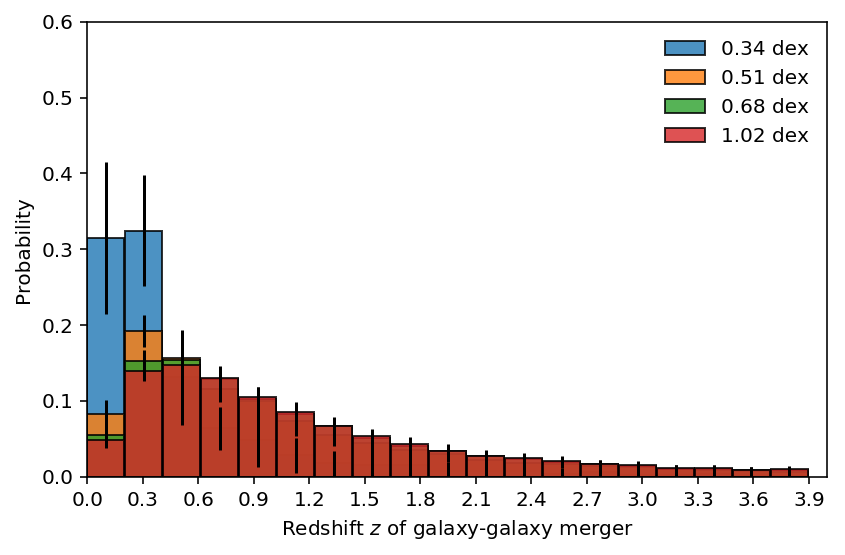

In [17]:
"""cmparing all mm13 bul redshifts"""

hist_bin = auto_bin(.2, .1, 4)
hist_bin = hist_bin[:-1]

mean34 = [0.3149550529066207, 0.324653871546865, 0.13079121174141534, 0.06368224837248429, 0.04801326535469485, 0.028130629889698337, 0.017579418311906913, 0.014756384061112581, 0.015726119240345705, 0.007393676259358697, 0.007496102102524289, 0.007418141825245317, 0.0035021143724881564, 0.005831504010828841, 0.002207256112814522, 0.0025967113070896586, 0.0028217614544858802, 0.0011193568336425464, 0.0013251742963783686]
mean51 = [0.0829137415200691, 0.1920680114695127, 0.15675101603821162, 0.11527199719983681, 0.09909080768122301, 0.07309130945739478, 0.05538714955933606, 0.04427951277802058, 0.03515132635592319, 0.03004754804420048, 0.021722014986489152, 0.017940724418914845, 0.016868740677916955, 0.013506588267426178, 0.012429437377632442, 0.009878112697443608, 0.009321011243847828, 0.007807256682832233, 0.0064030221656768945]
mean68 = [0.05526196760870032, 0.15204417181504631, 0.15320073937178355, 0.1281706952674537, 0.10191282908873628, 0.08278083462371745, 0.0667643956981891, 0.05033082918116238, 0.0398951259432505, 0.033290239762087205, 0.027031133766770746, 0.022575923667380326, 0.01923540968427588, 0.016382832813450973, 0.013525487900705726, 0.010276527337467957, 0.009887097357665188, 0.008869259213317257, 0.008564499898839473]
mean102 = [0.048075525348265, 0.13960396012281515, 0.14678694468249248, 0.13069313697204316, 0.10549525225491592, 0.08579501290163336, 0.0667191194600924, 0.05355570262282763, 0.04306835925956132, 0.03423877332131664, 0.027468388948579746, 0.024025840586115392, 0.02087250093109506, 0.01707725727836963, 0.015230414628069469, 0.01145891426599802, 0.010866779284176991, 0.009086998025313573, 0.009814508730110407]


tStd34 = [0.10003263011044515, 0.07277750288626265, 0.06283883449144546, 0.028239934855672003, 0.03555922104434354, 0.022876028058675443, 0.016479774597673906, 0.01922542733479521, 0.01820679851833122, 0.011624576175628922, 0.011867053051112833, 0.010550364351127476, 0.008237096984283156, 0.01259098082159533, 0.006320405506144109, 0.006077648301223525, 0.007097788101049877, 0.0060545733735566125, 0.004321523487607549]
tStd51 = [0.017518066946077968, 0.020689574588627954, 0.022175723199103516, 0.017304352186615798, 0.019218393236301888, 0.01962124169109991, 0.015311018450804788, 0.012265179669672832, 0.011174040030070213, 0.011161059333976644, 0.007503967487911003, 0.007100361514470545, 0.005959817798604721, 0.007485690080525848, 0.0068172714399224125, 0.005496783817250337, 0.0060890472730725665, 0.004854996407982044, 0.004959091148901752]
tStd68 = [0.010982542589159082, 0.014571071646458135, 0.016135330975039133, 0.01455350624292909, 0.011860976935080876, 0.012146642794012445, 0.01194670596921464, 0.009131640548171395, 0.008534880548498781, 0.008195918346741535, 0.007830948641713435, 0.005778800402884428, 0.005309705093777055, 0.005729917613797137, 0.004979280561302134, 0.004546385303686195, 0.004055311889482213, 0.004423964898491354, 0.0036988862950859134]
tStd102 = [0.009687562754957245, 0.014094875823699305, 0.014851897128704513, 0.014855338060055042, 0.013139286920295378, 0.012831710803754694, 0.009567489420432316, 0.00967831537926964, 0.008788764682503988, 0.008331130286916134, 0.0059325436728705815, 0.006550271828639867, 0.006758244986102711, 0.00540747608628007, 0.005501221273061105, 0.00354062388923513, 0.003991212481265959, 0.00346076462754391, 0.004307450035375364]


fig, ax = plt.subplots()

ax.bar(hist_bin, mean34, yerr=tStd34,edgecolor = 'black', width = 0.2, alpha = 0.8, label = "0.34 dex")
ax.bar(hist_bin, mean51, yerr=tStd51,edgecolor = 'black', width = 0.2, alpha = 0.8, label = "0.51 dex")
ax.bar(hist_bin, mean68, yerr=tStd68,edgecolor = 'black', width = 0.2, alpha = 0.8, label = "0.68 dex")
ax.bar(hist_bin, mean102, yerr=tStd102,edgecolor = 'black', width = 0.2, alpha = 0.8, label = "1.02 dex")


plt.xlim(0,4)
plt.ylim(0,.6)


majorLocator = MultipleLocator(.3)

ax.xaxis.set_major_locator(majorLocator) 
plt.ylabel("Probability")
plt.xlabel("Redshift $z$ of galaxy-galaxy merger")
plt.tight_layout()
plt.legend(frameon=False)
plt.savefig("../plots/mm13_scatters_redshifts.pdf")
